# Credit Risk Prediction - VIX Home Credit Indonesia Final Assignment

## Tinjauan Permasalahan

**Konteks** <br>
Home Credit Indonesia saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Dengan begitu, pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman tetap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Adapun kasus tersebut merupakan permasalahan yang harus dipecahkan oleh peserta VIX HCI melalui pembuatan model prediksi. Sebagai catatan, peserta VIX HCI perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression.

**Sumber Data** <br>
Pihak Home Credit Indonesia menyediakan satu paket dataset yang terdiri atas beberapa tabel yakni:
- application_train
- application_test
- bureau
- bureau_balance
- credit_card_balance
- installments_payments
- POS_CASH_balance
- previous_application  

**Tujuan** <br>
Memprediksi apakah seorang klien akan gagal membayar pinjaman atau tidak, berdasarkan atribut yang diberikan.

**Langkah Kerja** <br>
- Mengimpor library Python yang diperlukan
- Preparasi dataset yang akan digunakan (data cleansing dan preprocessing)
- Melakukan Analisis Data Eksploratoris
- Mengembangkan permodelan prediksi skor kredit

## Pemilihan Tabel (Dataset)

Menurut panduan yang Tim HCI sertakan, tabel application_train dan application_test merupakan tabel utama dalam pelaksanaan proyek ini. Oleh karena itu, saya menggunakan kedua tabel tersebut. Kemudian, berhubung tujuan akhir dari proyek ini adalah menciptakan sebuah model Machine Learning yang mampu memprediksi risiko/kemungkinan gagal bayar yang dilakukan oleh para klien HCI, maka saya juga akan menggunakan tabel lain untuk memperkuatnya.
Sebagaimana dilansir oleh situs https://www.listendata.com/2019/08/credit-risk-modelling.html , upaya prediksi gagal bayar dari seorang peminjam dapat mengacu kepada tiga tipe sumber data yakni: 1) Data demografis; 2) Data hubungan dengan nasabah yang sudah ada; dan 3) Variabel yang dikeluarkan oleh biro kredit. Bila mengacu kepada kriteria sumber data tersebut, maka penggunaan tabel application_train maupun application_test sudah memenuhi kriteria sumber data pertama, yakni data demografis. Oleh karena itu, saya dapat memilih data pendukung baik yang masuk kategori data hubungan nasabah ataupun data dari biro kredit. Untuk pengerjaan proyek ini, saya memutuskan menggunakan data pendukung yakni data hubungan dengan nasabah yang terkandung dalam dataset previous_application.

# Mengimpor Library Python

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib


from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows',150) # to display all rows of df series
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific notations such as 4.225108e+11 to 422510842796.00

# Tahap Preparasi Data

Berhubung pada pengerjaan proyek ini saya menggunakan dua tipe dataset, maka saya mencoba memisahkan proses berdasarkan masing-masing kategori dataset yang saya pakai, yakni Dataset Utama dan Dataset Pendukung.

## Dataset Utama (application_train.csv and application_test.csv)

### Eksplorasi Dataset

#### Mengimpor dan membaca dataset

In [2]:
application_train = pd.read_csv("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/home-credit-default-risk/application_train.csv")
application_train.head(4)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   
2      135000.0000   Unaccompanied          Working   
3      297000.0000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   
2                      0.0100      -19046           -225         -4260.0000   
3                      0.0080      -19005          -3039         -9833.0000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531      26.0000           1               1                1   
3            -2437          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   
2                 1           1           0        Laborers           1.0000   
3                 1           0           0        Laborers           2.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2  

In [3]:
application_test = pd.read_csv("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/home-credit-default-risk/application_test.csv")
application_test.head(4)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0       135000.0000  568800.0000   20560.5000      450000.0000   
1             0        99000.0000  222768.0000   17370.0000      180000.0000   
2             0       202500.0000  663264.0000   69777.0000      630000.0000   
3             2       315000.0000 1575000.0000   49018.5000     1575000.0000   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                      0.0188   
1            Married  House / apartment                      0.0358   
2            Married  House / apartment                      0.0191   
3            Married  House / apartment                      0.0264   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329         -5170.0000             -812          NaN   
1      -18064          -4469         -9118.0000            -1623          NaN   
2      -20038          -4458         -2175.0000            -3503       5.0000   
3      -13976          -1866         -2000.0000            -4208          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN           2.0000                     2   
1           0  Low-skill Laborers           2.0000                     2   
2           0             Drivers           2.0000                     2   
3           0         Sales staff           4.0000                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   

        ORGANIZATION_TYPE  

Berhubung dataset application_test dan application_training sejatinya berasal dari satu sumber dataset yang sama, maka untuk mempermudah proses ke depan, saya mencoba menggabungkan kedua dataset tersebut.

In [4]:
application_merge = pd.concat([application_test.assign(ind="test"), application_train.assign(ind="train")])

Catatan: penambahan argumen berupa "ind='test'" dan "ind='train'" adalah sebagai separator dan penanda untuk masing-masing dataset yang nanti akan bergabung. Adapun penambahan argumen ini untuk mempermudah saya saat nanti akan mengekstrak kedua dataset tersebut.

#### Informasi dataset

In [5]:
# Memeriksa informasi dari dataset gabungan terkait
application_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to TARGET
dtypes: float64(66), int64(40), object(17)
memory usage: 337.0+ MB


#### Statistik deskriptif dataset

In [43]:
# Memeriksa statistik deskriptif dari variabel/feature numerikal dalam dataset gabungan terkait
application_merge.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  DAYS_EMPLOYED  \
count 356255.0000   356255.0000       356255.0000  356255.0000    356255.0000   
mean  278128.0000        0.4143       170116.0599  587767.4138     68240.7928   
std   102842.1044        0.7204       223506.8190  398623.6937    139858.3460   
min   100001.0000        0.0000        25650.0000   45000.0000         0.0000   
25%   189064.5000        0.0000       112500.0000  270000.0000       949.0000   
50%   278128.0000        0.0000       153000.0000  500211.0000      2243.0000   
75%   367191.5000        1.0000       202500.0000  797557.5000      5773.0000   
max   456255.0000       20.0000    117000000.0000 4050000.0000    365243.0000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  REGION_RATING_CLIENT      TARGET  \
count        356255.0000      356255.0000           356255.0000 307511.0000   
mean           4983.5935        3002.0712                2.0505      0.0807   
std            3526.9690        1517.9017                0.5109      0.2724   
min               0.0000           0.0000                1.0000      0.0000   
25%            1995.0000        1717.0000                2.0000      0.0000   
50%            4502.0000        3252.0000                2.0000      0.0000   
75%            7477.0000        4318.0000                2.0000      0.0000   
max           24672.0000        7197.0000                3.0000      1.0000   

              AGE  
count 356255.0000  
mean      43.4484  
std       11.9410  
min       20.0000  
25%       34.0000  
50%       43.0000  
75%       53.0000  
max       69.0000

In [7]:
# Memeriksa statistik deskriptif dari variabel/feature kategorikal dalam dataset gabungan terkait
application_merge.select_dtypes('object').describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              356255      356255       356255          356255   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               326537      235126       235235          246970   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           354052           356255                         356255   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            288253           183307                         252379   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              356255             356255          244259   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               228715             316513           63841   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      356255                  356255             113163   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        63652                   78832              85954   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE     ind  
count           178339             176021              188291  356255  
unique               3                  7                   2       2  
top     block of flats              Panel                  No   train  
freq            175162              77309              185607  307511

#### Dimensi data

In [8]:
print ('The combination of application_train and application_test dataset has', str(application_merge.shape[0]),
       'rows', 'and', str(application_merge.shape[1]), 'columns.')
print ('Gabungan dari dataset application_train dan application_test memiliki', str(application_merge.shape[0]),
       'baris', 'dan', str(application_merge.shape[1]), 'kolom.')

The combination of application_train and application_test dataset has 356255 rows and 123 columns.
Gabungan dari dataset application_train dan application_test memiliki 356255 baris dan 123 kolom.


#### Memeriksa nilai hilang/nulls

In [9]:
# number of missing values
main_null_values = application_merge.isna().sum()

# Round the percentage result
main_pct_null_values = round((application_merge.isna().sum()/application_merge.shape[0]*100), 2)

# Create a dataframe for the total amount and percentage of missing values
main_df_null_values = pd.DataFrame(data=main_null_values, columns=['Total']).reset_index()
main_df_null_values.rename(columns={'index':'Feature'}, inplace=True)

# Assign pertencage to dataframe
main_df_null_values['Percentage'] = main_pct_null_values.values

Mengingat jumlah kolom dari dataframe/dataset gabungan (application_merge) ada lebih dari 100, maka saya hanya berfokus pada kolom dengan nilai hilang (missing values) lebih dari 40%.

In [10]:
# Filter for missing data more than 40%
main_df_null_values_40pct = main_df_null_values[main_df_null_values['Percentage'] > 40].sort_values(by='Percentage', ascending=False)
main_df_null_values_40pct

Feature   Total  Percentage
47                COMMONAREA_AVG  248360     69.7100
75               COMMONAREA_MEDI  248360     69.7100
61               COMMONAREA_MODE  248360     69.7100
83      NONLIVINGAPARTMENTS_MEDI  246861     69.2900
69      NONLIVINGAPARTMENTS_MODE  246861     69.2900
55       NONLIVINGAPARTMENTS_AVG  246861     69.2900
85            FONDKAPREMONT_MODE  243092     68.2400
81         LIVINGAPARTMENTS_MEDI  242979     68.2000
53          LIVINGAPARTMENTS_AVG  242979     68.2000
67         LIVINGAPARTMENTS_MODE  242979     68.2000
65                FLOORSMIN_MODE  241108     67.6800
79                FLOORSMIN_MEDI  241108     67.6800
51                 FLOORSMIN_AVG  241108     67.6800
60              YEARS_BUILD_MODE  236306     66.3300
46               YEARS_BUILD_AVG  236306     66.3300
74              YEARS_BUILD_MEDI  236306     66.3300
20                   OWN_CAR_AGE  235241     66.0300
66                 LANDAREA_MODE  210844     59.1800
80                 LANDAREA_MEDI  210844     59.1800
52                  LANDAREA_AVG  210844     59.1800
58             BASEMENTAREA_MODE  207584     58.2700
72             BASEMENTAREA_MEDI  207584     58.2700
44              BASEMENTAREA_AVG  207584     58.2700
70            NONLIVINGAREA_MODE  195766     54.9500
56             NONLIVINGAREA_AVG  195766     54.9500
84            NONLIVINGAREA_MEDI  195766     54.9500
40                  EXT_SOURCE_1  193910     54.4300
48                 ELEVATORS_AVG  189080     53.0700
76                ELEVATORS_MEDI  189080     53.0700
62                ELEVATORS_MODE  189080     53.0700
88            WALLSMATERIAL_MODE  180234     50.5900
71               APARTMENTS_MEDI  179948     50.5100
43                APARTMENTS_AVG  179948     50.5100
57               APARTMENTS_MODE  179948     50.5100
49                 ENTRANCES_AVG  178407     50.0800
77                ENTRANCES_MEDI  178407     50.0800
63                ENTRANCES_MODE  178407     50.0800
82               LIVINGAREA_MEDI  177902     49.9400
68               LIVINGAREA_MODE  177902     49.9400
54                LIVINGAREA_AVG  177902     49.9400
86                HOUSETYPE_MODE  177916     49.9400
50                 FLOORSMAX_AVG  176341     49.5000
78                FLOORSMAX_MEDI  176341     49.5000
64                FLOORSMAX_MODE  176341     49.5000
45   YEARS_BEGINEXPLUATATION_AVG  172863     48.5200
59  YEARS_BEGINEXPLUATATION_MODE  172863     48.5200
73  YEARS_BEGINEXPLUATATION_MEDI  172863     48.5200
87                TOTALAREA_MODE  171055     48.0100
89           EMERGENCYSTATE_MODE  167964     47.1500

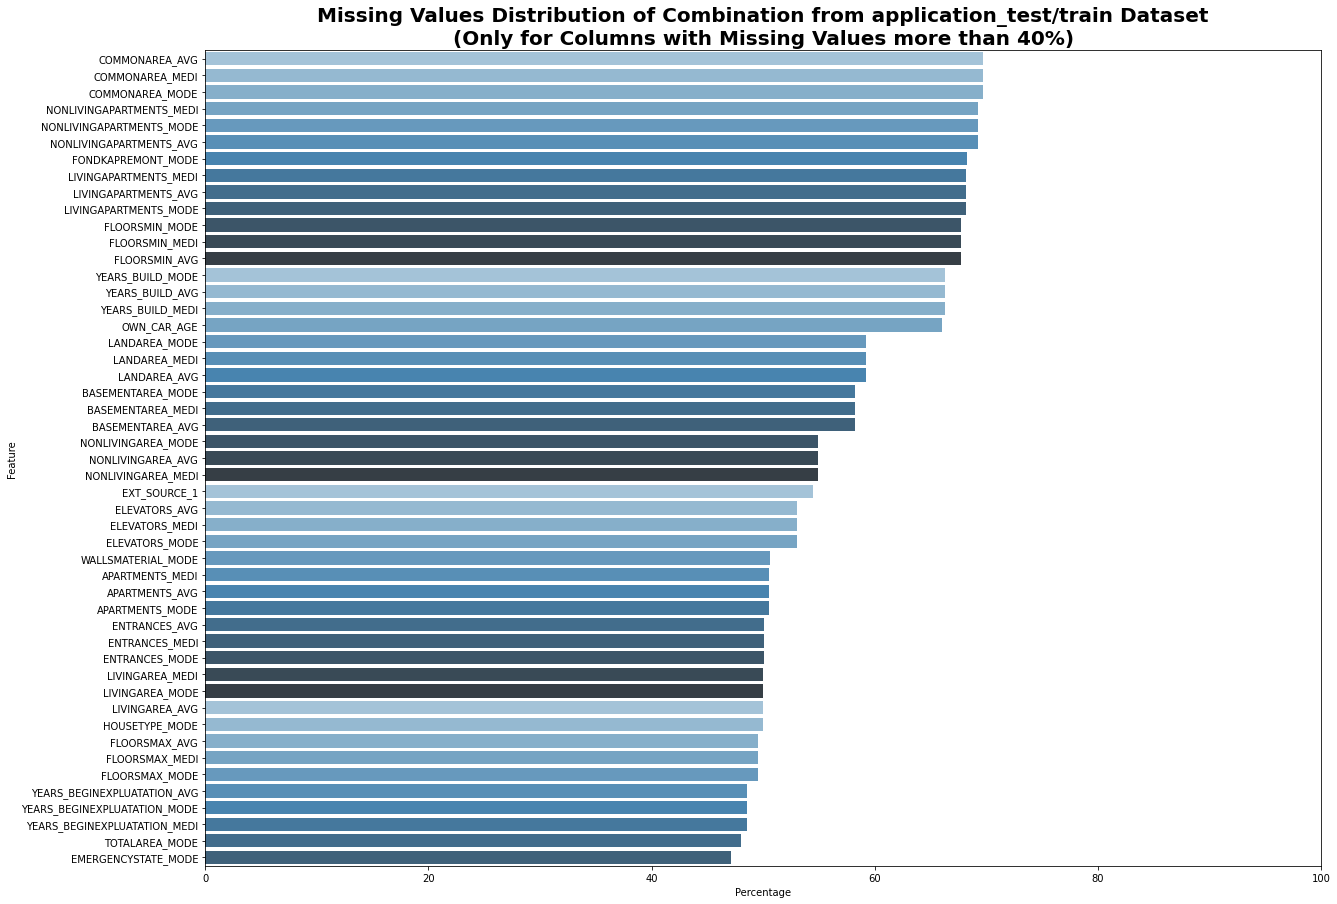

In [51]:
# Plotting number of missing data
fig, ax = plt.subplots(figsize=(20,15))

g = sns.barplot(y = 'Feature',x='Percentage',data=main_df_null_values_40pct,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

y = np.arange(len(main_df_null_values_40pct['Feature']))
x = main_df_null_values_40pct['Percentage']


ax.set_title('Missing Values Distribution of Combination from application_test/train Dataset\n(Only for Columns with Missing Values more than 40%)', color='black', fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.set_xlim(0,100)
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/app_df_missing_val_dist.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

#### Memeriksa data duplikat

In [15]:
# Check duplicated data
application_merge[application_merge.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, ...]
Index: []

### Data Cleansing dan Preprocessing

Versi Indonesia:

Pada tahap ini, saya melakukan serangkaian aktivitas mulai dari menghapus kolom dengan missing values, mengganti missing value dengan metode imputasi, menghapus kolom/feature yang kurang relevan untuk analisis nanti, mengatasi data dengan format/tipe data yang tidak semestinya, hingga menciptakan feature/kolom baru berdasarkan data yang sudah ada (bila perlu).

English version:

On this stage, we do a series of activies including dropping/imputing column with missing values, dropping irrelevant column, handling inconsistent data, converting the data type of each feature to the proper format/type, as well as creating new feature based on the existing one.

#### Menghapus kolom dengan persentase data hilang (missing values) lebih dari 40%

In [16]:
NA_cols_drop_main = ['COMMONAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 
                     'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 
                     'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 
                     'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 
                     'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 
                     'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'ENTRANCES_MEDI', 
                     'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_AVG',
                     'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
                     'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']

application_merge.drop(columns=NA_cols_drop_main, inplace=True) 

In [17]:
application_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   NAME_CONTRACT_TYPE           356255 non-null  object 
 2   CODE_GENDER                  356255 non-null  object 
 3   FLAG_OWN_CAR                 356255 non-null  object 
 4   FLAG_OWN_REALTY              356255 non-null  object 
 5   CNT_CHILDREN                 356255 non-null  int64  
 6   AMT_INCOME_TOTAL             356255 non-null  float64
 7   AMT_CREDIT                   356255 non-null  float64
 8   AMT_ANNUITY                  356219 non-null  float64
 9   AMT_GOODS_PRICE              355977 non-null  float64
 10  NAME_TYPE_SUITE              354052 non-null  object 
 11  NAME_INCOME_TYPE             356255 non-null  object 
 12  NAME_EDUCATION_TYPE          356255 non-null  object 
 13 

#### Menghapus kolom/feature dengan data kurang relevan

Versi Indonesia:

Pada kasus ini, feature yang relevan merupakan kolom yang mengandung data demografis dari klien/peminjam. Ini berarti bahwa hanya kolom pada rentang indeks 0 hingga 29. Adapun kolom 'ind' dan 'TARGET' terkecualikan.

English version:

In this case the relevant features are columns which contain demographic data (meaning only columns in range of number 0 until 29) and 'ind' and 'TARGET' columns.

In [18]:
application_merge.drop(application_merge.loc[:, 'WEEKDAY_APPR_PROCESS_START':'AMT_REQ_CREDIT_BUREAU_YEAR'].columns, inplace=True, axis=1)

Versi Indonesia:

Ternyata saya masih menemukan beberapa kolom yang kurang relevan. Kolom-kolom ini adalah 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', dan 'FLAG_EMAIL'. Kolom-kolom tersebut menjadi kurang relevan karena kolom tersebut hanya menyimpan informasi sampingan, yakni menunjukkan bahwa klien/peminjam juga menginput nomor kontak pribadi saat pengajuan kredit pinjaman. Selain itu, saya juga menemukan kolom 'NAME_TYPE_SUITE' sebagai kolom yang kurang relevan karena kolom ini hanyalah menyimpan informasi seputar siapa pendamping klien saat ia mengajukan pinjaman. Terakhir, ada pula kolom 'REGION_POPULATION_RELATIVE' yang menurut saya kurang relevan karena kolom ini hanya menginformasikan angka kepadatan populasi dari wilayah tempat tinggal klien.

English version:

Once again, there are still few irrelevant features that we need to drop.In this case, the irrelevant features are columns FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL.
The reason why those columns are irrelevant because those columns only give information that client also input their personal contact during application process. Also, there is 'NAME_TYPE_SUITE' column that only tell us about who accompanied the client when they apply for loan and 'REGION_POPULATION_RELATIVE' column that has function to inform the population density of the region the client live.

In [19]:
irrelevant_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 
                  'NAME_TYPE_SUITE', 'REGION_POPULATION_RELATIVE']
application_merge.drop(irrelevant_col, axis=1, inplace=True)

In [20]:
application_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   356255 non-null  int64  
 1   NAME_CONTRACT_TYPE           356255 non-null  object 
 2   CODE_GENDER                  356255 non-null  object 
 3   FLAG_OWN_CAR                 356255 non-null  object 
 4   FLAG_OWN_REALTY              356255 non-null  object 
 5   CNT_CHILDREN                 356255 non-null  int64  
 6   AMT_INCOME_TOTAL             356255 non-null  float64
 7   AMT_CREDIT                   356255 non-null  float64
 8   AMT_ANNUITY                  356219 non-null  float64
 9   AMT_GOODS_PRICE              355977 non-null  float64
 10  NAME_INCOME_TYPE             356255 non-null  object 
 11  NAME_EDUCATION_TYPE          356255 non-null  object 
 12  NAME_FAMILY_STATUS           356255 non-null  object 
 13 

#### Menghapus feature dengan angka multikoliniearitas tinggi (lebih dari 0.7)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'SK_ID_CURR'),
  Text(0, 1.5, 'CNT_CHILDREN'),
  Text(0, 2.5, 'AMT_INCOME_TOTAL'),
  Text(0, 3.5, 'AMT_CREDIT'),
  Text(0, 4.5, 'AMT_ANNUITY'),
  Text(0, 5.5, 'AMT_GOODS_PRICE'),
  Text(0, 6.5, 'DAYS_BIRTH'),
  Text(0, 7.5, 'DAYS_EMPLOYED'),
  Text(0, 8.5, 'DAYS_REGISTRATION'),
  Text(0, 9.5, 'DAYS_ID_PUBLISH'),
  Text(0, 10.5, 'CNT_FAM_MEMBERS'),
  Text(0, 11.5, 'REGION_RATING_CLIENT'),
  Text(0, 12.5, 'REGION_RATING_CLIENT_W_CITY'),
  Text(0, 13.5, 'TARGET')])

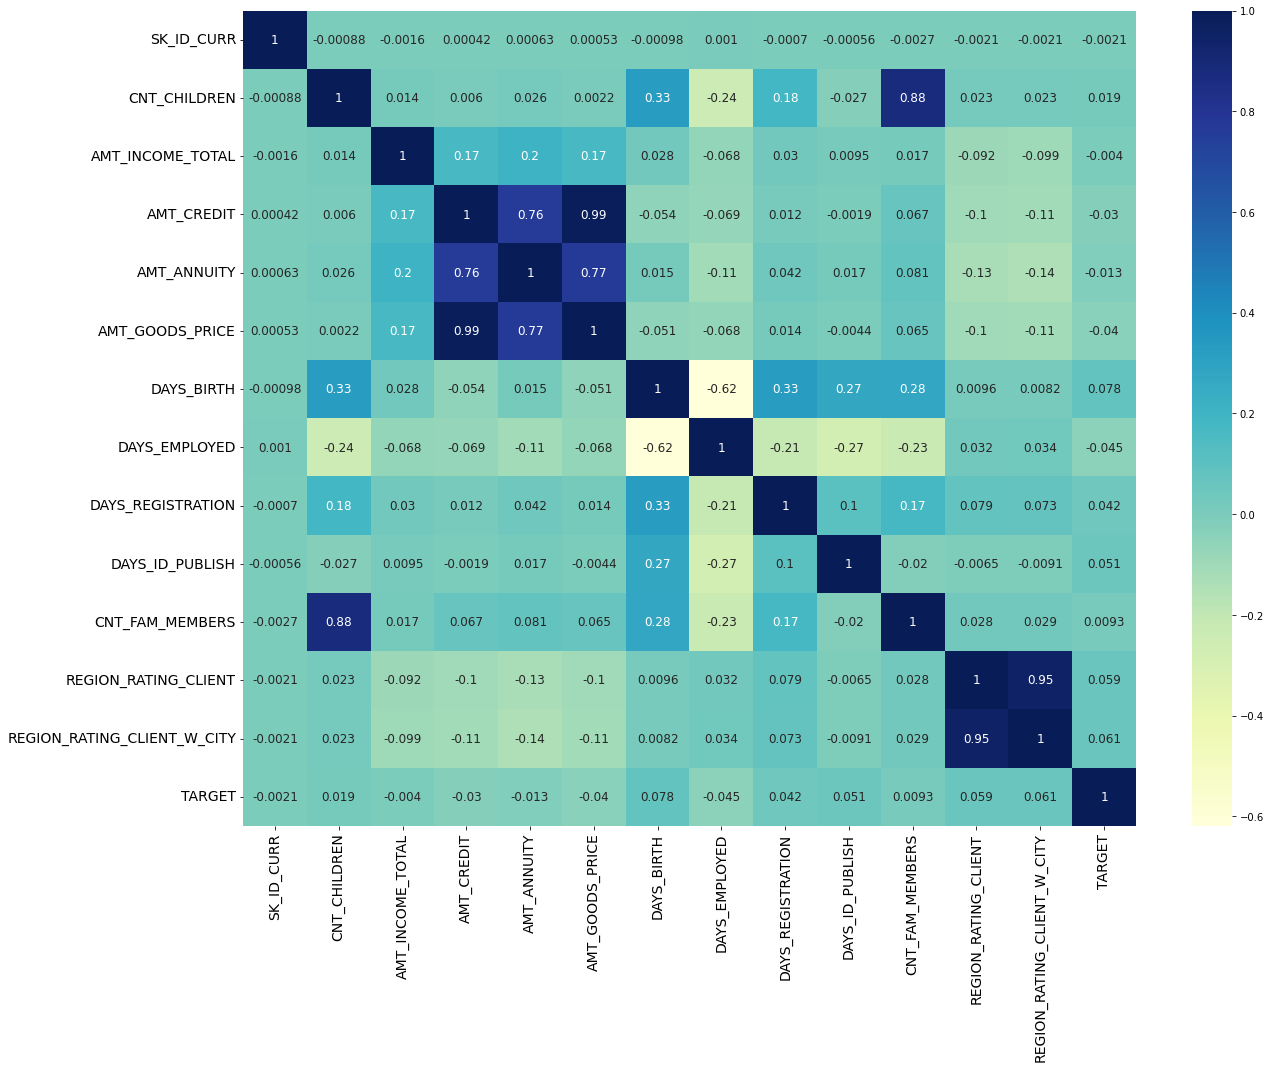

In [21]:
# correlation matrix showing correlation co-effiecients 
corr_matrix = application_merge.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [22]:
# droping multicollinear features
col_with_multi_main = ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY']
application_merge.drop(columns=col_with_multi_main, inplace=True)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'SK_ID_CURR'),
  Text(0, 1.5, 'CNT_CHILDREN'),
  Text(0, 2.5, 'AMT_INCOME_TOTAL'),
  Text(0, 3.5, 'AMT_CREDIT'),
  Text(0, 4.5, 'DAYS_BIRTH'),
  Text(0, 5.5, 'DAYS_EMPLOYED'),
  Text(0, 6.5, 'DAYS_REGISTRATION'),
  Text(0, 7.5, 'DAYS_ID_PUBLISH'),
  Text(0, 8.5, 'REGION_RATING_CLIENT'),
  Text(0, 9.5, 'TARGET')])

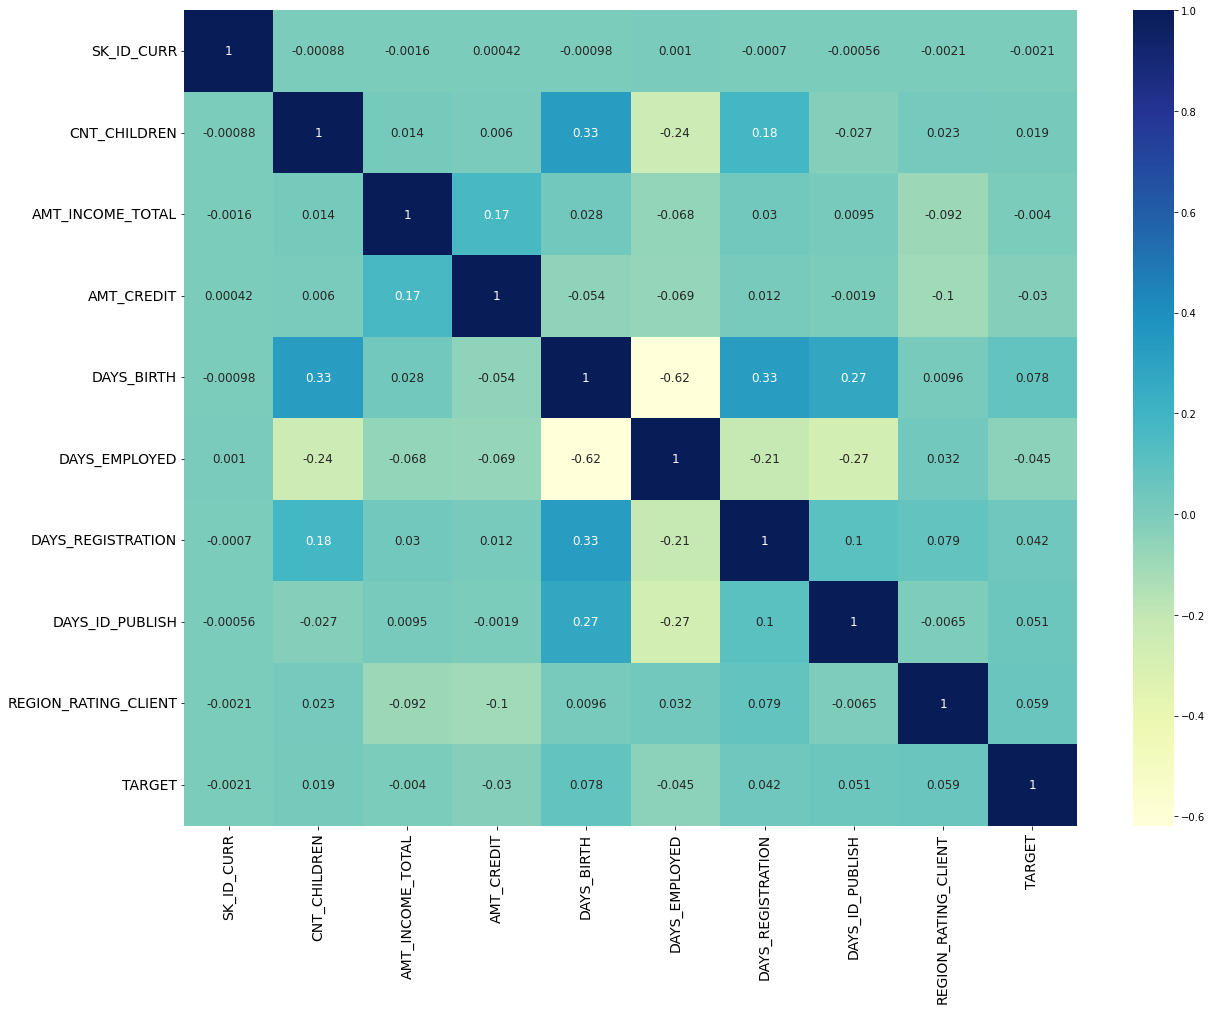

In [23]:
# once again checking the possibility of  multicollinear features 
corr_matrix = application_merge.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### Memeriksa kardinalitas data

Pada tahap ini saya memeriksa dataset untuk mencari tahu apakah terdapat data yang tidak konsisten pada setiap feature. Saya juga memeriksa jumlah nilai unik data pada setiap feature.

In [24]:
# get all categorical columns
col_cat = application_merge.select_dtypes('object').columns

# loops for categorical data
for i in col_cat:
    print(application_merge[i].value_counts())
    print()

Cash loans         326537
Revolving loans     29718
Name: NAME_CONTRACT_TYPE, dtype: int64

F      235126
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64

N    235235
Y    121020
Name: FLAG_OWN_CAR, dtype: int64

Y    246970
N    109285
Name: FLAG_OWN_REALTY, dtype: int64

Working                 183307
Commercial associate     83019
Pensioner                64635
State servant            25235
Unemployed                  23
Student                     20
Businessman                 11
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    252379
Higher education                  87379
Incomplete higher                 12001
Lower secondary                    4291
Academic degree                     205
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 228715
Single / not married     52480
Civil marriage           34036
Separated                22725
Widow                    18297
Unknown                      2
N

Versi Indonesia:

Kolom 'CODE_GENDER' mengandung nilai bernama 'XNA' yang berarti 'Not Available'. Meski menunjukkan ketiadaan data, kenyataannya nilai 'XNA' tidak terdeteksi saat saya memeriksa jumlah data yang hilang. Kondisi seperti itulah yang membuat pemeriksaan kardinalitas data menjadi penting. Dengan demikian agar analisis data saya nanti tidak terganggu, maka saya harus mengatasi keberadaan nilai 'XNA' tersebut yakni mula-mula dengan mencari persentasenya.

English version:

Column CODE_GENDER contains value named 'XNA' which means 'Not Available'. So we have to find the number of rows and columns.

In [22]:
print('CODE_GENDER: ',application_merge['CODE_GENDER'].unique())
print('No of values: ',application_merge[application_merge['CODE_GENDER']=='XNA'].shape[0])

XNA_count = application_merge[application_merge['CODE_GENDER']=='XNA'].shape[0]
per_XNA = round(XNA_count/len(application_merge.index)*100,3)

print('% of XNA Values:',  per_XNA)

print('maximum frequency data :', application_merge['CODE_GENDER'].describe().top)

CODE_GENDER:  ['F' 'M' 'XNA']
No of values:  4
% of XNA Values: 0.001
maximum frequency data : F


Saya sekarang tahu bahwa ternyata persentase nilai 'XNA' sangatlah rendah. Oleh karena itu, saya bisa mengubahnya dengan nilai yang muncul terbanyak pada kolom 'CODE_GENDER' yakni nilai 'F'.

In [25]:
application_merge['CODE_GENDER'].replace('XNA', 'F', inplace=True)

In [26]:
# Checking the value of 'CODE_GENDER' again.
application_merge['CODE_GENDER'].unique()

array(['F', 'M'], dtype=object)

#### Memeriksa keberadaan data yang ditulis dengan format tak semestinya atau dengan tipe salah

In [27]:
application_merge.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT NAME_INCOME_TYPE  \
0             0       135000.0000  568800.0000          Working   
1             0        99000.0000  222768.0000          Working   
2             0       202500.0000  663264.0000          Working   
3             2       315000.0000 1575000.0000          Working   
4             1       180000.0000  625500.0000          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   
2               Higher education            Married  House / apartment   
3  Secondary / secondary special            Married  House / apartment   
4  Secondary / secondary special            Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0      -19241          -2329         -5170.0000             -812   
1      -18064          -4469         -9118.0000            -1623   
2      -20038          -4458         -2175.0000            -3503   
3      -13976          -1866         -2000.0000            -4208   
4      -13040          -2191         -4000.0000            -4262   

      OCCUPATION_TYPE  REGION_RATING_CLIENT   ind  TARGET  
0                 NaN                     2  test     NaN  
1  Low-skill Laborers                     2  test     NaN  
2             Drivers                     2  test     NaN  
3         Sales staff                     2  test     NaN  
4                 NaN                     2  test     NaN

Versi Indonesia:

Saya menemukan beberapa kolom yang ditulis dengan format tak semestinya. Kolom DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH merupakan kolom yang mengandung informasi seputar jumlah hari tetapi data yang ada justru tertulis dalam format bilangan negatif. Oleh karena itu, saya harus mengubahnya ke format bilangan positif.

English version:

There are few columns containing values written in the improper format: DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH. All of those columns consisting data about day which should be written as positive value. Yet, those data were written as negative value so that we must convert them to positive value.

In [28]:
# Converting negative values in each column to the positive values

# DAYS_BIRTH column
application_merge['DAYS_BIRTH'] = application_merge['DAYS_BIRTH'].apply(abs)

# DAYS_EMPLOYED column
application_merge['DAYS_EMPLOYED'] = application_merge['DAYS_EMPLOYED'].apply(abs)

# DAYS_REGISTRATION column
application_merge['DAYS_REGISTRATION'] = application_merge['DAYS_REGISTRATION'].apply(abs)

# DAYS_ID_PUBLISH column
application_merge['DAYS_ID_PUBLISH'] = application_merge['DAYS_ID_PUBLISH'].apply(abs)

# Checking values of those modified columns
application_merge[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0       19241           2329          5170.0000              812
1       18064           4469          9118.0000             1623
2       20038           4458          2175.0000             3503
3       13976           1866          2000.0000             4208
4       13040           2191          4000.0000             4262

Selain itu, saya juga mendapati bahwa kolom 'REGION_RATING_CLIENT' sejatinya menyimpan data yang bersifat kategori (meski berupa angka). Namun pada saat pengecekan, kolom tersebut mengandung tipe data integer dan bukan string. Oleh karena itu, saya juga mengganti tipe data dari kolom terkait.

In [75]:
# Altering the data type contained in REGION_RATING_CLIENT column
application_merge['REGION_RATING_CLIENT'] = application_merge['REGION_RATING_CLIENT'].astype('object')

Kemudian, kolom DAYS_REGISTRATION yang berisikan jumlah hari justru bertipe data float, bukan integer. Oleh karena itu, saya turut mengubah tipe data dari kedua kolom tersebut ke integer.

In [81]:
# Altering the data type contained in DAYS_REGISTRATION column
application_merge['DAYS_REGISTRATION'] = application_merge['DAYS_REGISTRATION'].astype('int')

In [82]:
application_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   SK_ID_CURR            356255 non-null  int64   
 1   NAME_CONTRACT_TYPE    356255 non-null  object  
 2   CODE_GENDER           356255 non-null  object  
 3   FLAG_OWN_CAR          356255 non-null  object  
 4   FLAG_OWN_REALTY       356255 non-null  object  
 5   CNT_CHILDREN          356255 non-null  int64   
 6   AMT_INCOME_TOTAL      356255 non-null  float64 
 7   AMT_CREDIT            356255 non-null  float64 
 8   NAME_INCOME_TYPE      356255 non-null  object  
 9   NAME_EDUCATION_TYPE   356255 non-null  object  
 10  NAME_FAMILY_STATUS    356255 non-null  object  
 11  NAME_HOUSING_TYPE     356255 non-null  object  
 12  DAYS_EMPLOYED         356255 non-null  int64   
 13  DAYS_REGISTRATION     356255 non-null  int32   
 14  DAYS_ID_PUBLISH       356255 non-nul

#### Membuat kolom baru berdasarkan feature yang ada

Versi Indonesia:

Berhubung kolom 'DAYS_BIRTH' sejatinya merupakan kolom yang menginformasikan usia klien dalam satuan hari, maka saya bisa membuat satu kolom baru bernama 'AGE' yang nanti saya isikan dengan konversi jumlah hari ke tahun.

English version:

Since there is a column that represents applicant age (DAYS_BIRTH) we can convert that into years and then assigning the result to a new column named 'AGE'.

In [29]:
application_merge['AGE'] = application_merge['DAYS_BIRTH'].apply(lambda x: x//365)
application_merge.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT NAME_INCOME_TYPE  \
0             0       135000.0000  568800.0000          Working   
1             0        99000.0000  222768.0000          Working   
2             0       202500.0000  663264.0000          Working   
3             2       315000.0000 1575000.0000          Working   
4             1       180000.0000  625500.0000          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   
2               Higher education            Married  House / apartment   
3  Secondary / secondary special            Married  House / apartment   
4  Secondary / secondary special            Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       19241           2329          5170.0000              812   
1       18064           4469          9118.0000             1623   
2       20038           4458          2175.0000             3503   
3       13976           1866          2000.0000             4208   
4       13040           2191          4000.0000             4262   

      OCCUPATION_TYPE  REGION_RATING_CLIENT   ind  TARGET  AGE  
0                 NaN                     2  test     NaN   52  
1  Low-skill Laborers                     2  test     NaN   49  
2             Drivers                     2  test     NaN   54  
3         Sales staff                     2  test     NaN   38  
4                 NaN                     2  test     NaN   35

Versi Indonesia:

Sekarang dataset sudah memiliki kolom baru yakni 'AGE' yang secara khusus menyimpan informasi seputar usia klien dalam satuan tahun. Maka dari itu, saya sudah tidak membutuhkan kolom 'DAYS_BIRTH'.

English version:

Now we have 'AGE' column so we better drop the DAYS_BIRTH column as we won't need it anymore.

In [ ]:
application_merge.drop('DAYS_BIRTH', axis=1, inplace=True)
application_merge.head()

Untuk mempermudah proses analisis dan penggalian data ke depan, saya juga membuat beberapa kolom baru yang merupakan kategorisasi/segmentasi dari data numerikal yang bersifat kontinyu. Adapun kolom baru tersebut adalah 'AGE_SEGMENT', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE' yang masing-masing akan mengkategorisasi data dari kolom 'AGE', 'AMT_INCOME_TOTAL', dan 'AMT_CREDIT'.

In [32]:
# Making new column named 'AGE_SEGMENT' based on 'AGE' column

bins= [0, 20, 30, 40, 50, 60, 100]
labels = ["Late Ten", "Twenty", "Thirty", "Fourty", "Fifty", "Above_Sixty"]
application_merge['AGE_SEGMENT'] = pd.cut(application_merge['AGE'], bins=bins, labels=labels, right=False)
application_merge['AGE_SEGMENT'].value_counts(sort=False).to_frame()

AGE_SEGMENT
Late Ten               0
Twenty             51852
Thirty             95406
Fourty             89022
Fifty              78635
Above_Sixty        41340

In [33]:
# Making new column named 'AMT_INCOME_RANGE' based on 'AMT_INCOME_TOTAL' column
bins= [0,100000,200000,300000,400000,500000,10000000000]
labels = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']
application_merge['AMT_INCOME_RANGE'] = pd.cut(application_merge['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=False)
application_merge['AMT_INCOME_RANGE'].value_counts(sort=False).to_frame()

AMT_INCOME_RANGE
<100000                      71534
100000-200000               180692
200000-300000                76946
300000-400000                17434
400000-500000                 6441
500000 and above              3208

In [34]:
# Making new column named 'AMT_CREDIT_RANGE' based on 'AMT_CREDIT' column
bins= [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
labels = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000',
        '600000-700000','700000-800000','850000-900000','900000 and above']
application_merge['AMT_CREDIT_RANGE'] = pd.cut(application_merge['AMT_CREDIT'], bins=bins, labels=labels, right=False)
application_merge['AMT_CREDIT_RANGE'].value_counts(sort=False).to_frame()

AMT_CREDIT_RANGE
<100000                       7677
100000-200000                35529
200000-300000                64100
300000-400000                31990
400000-500000                38494
500000-600000                39996
600000-700000                27856
700000-800000                21918
850000-900000                17063
900000 and above             71632

#### Melakukan imputasi terhadap kolom lain yang masih memiliki missing values

In [35]:
# Checking the null values again
missing_value = application_merge.isnull().mean() 
missing_value[missing_value != 0].to_frame()

0
OCCUPATION_TYPE 0.3144
TARGET          0.1368

Karena kolom 'OCCUPATION_TYPE' merupakan feature kategorikal, maka proses imputasi dapat saya lakukan dengan mengganti missing values/NaN dengan nilai terbanyak yang muncul pada kolom terkait.

In [36]:
# We check the descriptive statistic of each columns to know the top value of each column that we can use in the imputation process.

top_occupation = application_merge['OCCUPATION_TYPE'].describe().top

print('The most frequent value of "OCCUPATION_TYPE" column is', top_occupation,'.') 

The most frequent value of "OCCUPATION_TYPE" column is Laborers .


In [37]:
# Do the imputation process by filling the respective column with its mode (most frequent value)

application_merge['OCCUPATION_TYPE'].fillna('Laborers', inplace=True)

In [38]:
# Checking the null values again
missing_value = application_merge.isnull().mean() 
missing_value[missing_value > 0.0].to_frame()

0
TARGET 0.1368

In [39]:
# Information of the final-modified dataset
application_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   SK_ID_CURR            356255 non-null  int64   
 1   NAME_CONTRACT_TYPE    356255 non-null  object  
 2   CODE_GENDER           356255 non-null  object  
 3   FLAG_OWN_CAR          356255 non-null  object  
 4   FLAG_OWN_REALTY       356255 non-null  object  
 5   CNT_CHILDREN          356255 non-null  int64   
 6   AMT_INCOME_TOTAL      356255 non-null  float64 
 7   AMT_CREDIT            356255 non-null  float64 
 8   NAME_INCOME_TYPE      356255 non-null  object  
 9   NAME_EDUCATION_TYPE   356255 non-null  object  
 10  NAME_FAMILY_STATUS    356255 non-null  object  
 11  NAME_HOUSING_TYPE     356255 non-null  object  
 12  DAYS_EMPLOYED         356255 non-null  int64   
 13  DAYS_REGISTRATION     356255 non-null  float64 
 14  DAYS_ID_PUBLISH       356255 non-nul

## Dataset Pendukung (previous_application.csv)

### Eksplorasi data

#### Mengimpor dan membaca dataset

In [41]:
prev_app = pd.read_csv("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/home-credit-default-risk/previous_application.csv")
prev_app.head(4)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   
2     2523466      122040         Cash loans   15060.7350      112500.0000   
3     2819243      176158         Cash loans   47041.3350      450000.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000            0.0000       17145.0000                   SATURDAY   
1 679671.0000               NaN      607500.0000                   THURSDAY   
2 136444.5000               NaN      112500.0000                    TUESDAY   
3 470790.0000               NaN      450000.0000                     MONDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1             0.0000                 0.1828   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                    0.8673                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0      12.0000           middle  POS mobile with interest         365243.0000   
1      36.0000       low_action          Cash X-Sell: low         365243.0000   
2      12.0000             high         Cash X-Sell: high         365243.0000   
3      12.0000           middle       Cash X-Sell: middle         365243.0000   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0        -42.0000                   300.0000       -42.0000          -37.0000   
1       -134.0000                   916.0000    365243.0000       365243.0000   
2       -271.0000                    59.0000    365243.0000       365243.0000   
3       -482.0000                  -152.0000      -182.0000         -177.0000   

   NFLAG_INSURED_ON_APPROVAL  
0                     0.0000  
1                     1.0000  
2                     1.0000  
3                     1.0000

#### Informasi dataset

In [42]:
# Checking dataframe information
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Statistik deskriptif dataset

In [44]:
# Memeriksa statistik deskriptif dari variabel/feature numerikal dalam dataset gabungan terkait
prev_app.describe()

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION   AMT_CREDIT  \
count 1670214.0000 1670214.0000 1297979.0000     1670214.0000 1670213.0000   
mean  1923089.1353  278357.1741   15955.1207      175233.8604  196114.0212   
std    532597.9587  102814.8238   14782.1373      292779.7624  318574.6165   
min   1000001.0000  100001.0000       0.0000           0.0000       0.0000   
25%   1461857.2500  189329.0000    6321.7800       18720.0000   24160.5000   
50%   1923110.5000  278714.5000   11250.0000       71046.0000   80541.0000   
75%   2384279.7500  367514.0000   20658.4200      180360.0000  216418.5000   
max   2845382.0000  456255.0000  418058.1450     6905160.0000 6905160.0000   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count       774370.0000     1284699.0000             1670214.0000   
mean          6697.4021      227847.2793                  12.4842   
std          20921.4954      315396.5579                   3.3340   
min             -0.9000           0.0000                   0.0000   
25%              0.0000       50841.0000                  10.0000   
50%           1638.0000      112320.0000                  12.0000   
75%           7740.0000      234000.0000                  15.0000   
max        3060045.0000     6905160.0000                  23.0000   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
count            1670214.0000        774370.0000              5951.0000   
mean                   0.9965             0.0796                 0.1884   
std                    0.0593             0.1078                 0.0877   
min                    0.0000            -0.0000                 0.0348   
25%                    1.0000             0.0000                 0.1607   
50%                    1.0000             0.0516                 0.1891   
75%                    1.0000             0.1089                 0.1933   
max                    1.0000             1.0000                 1.0000   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                 5951.0000   1670214.0000      1670214.0000 1297984.0000   
mean                     0.7735      -880.6797          313.9511      16.0541   
std                      0.1009       779.0997         7127.4435      14.5673   
min                      0.3732     -2922.0000           -1.0000       0.0000   
25%                      0.7156     -1300.0000           -1.0000       6.0000   
50%                      0.8351      -581.0000            3.0000      12.0000   
75%                      0.8525      -280.0000           82.0000      24.0000   
max                      1.0000        -1.0000      4000000.0000      84.0000   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count         997149.0000     997149.0000                997149.0000   
mean          342209.8550      13826.2693                 33767.7741   
std            88916.1158      72444.8697                106857.0348   
min            -2922.0000      -2892.0000                 -2801.0000   
25%           365243.0000      -1628.0000                 -1242.0000   
50%           365243.0000       -831.0000                  -361.0000   
75%           365243.0000       -411.0000                   129.0000   
max           365243.0000     365243.0000                365243.0000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count    997149.0000       997149.0000                997149.0000  
mean      76582.4031        81992.3438                     0.3326  
std      149647.4151       153303.5167                     0.4711  
min       -2889.0000        -2874.0000                     0.0000  
25%       -1314.0000        -1270.0000                     0.0000  
50%        -537.0000         -499.0000                     0.0000  
75%         -74.0000          -44.0000                     1.0000  
max      365243.0000       365243.0000                     1.0000

In [45]:
# Memeriksa statistik deskriptif dari variabel/feature kategorikal dalam dataset gabungan terkait
prev_app.select_dtypes('object').describe()

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
count           849809          1670214             1670214        1670214   
unique               7                4                  28              5   
top      Unaccompanied         Repeater                 XNA            POS   
freq            508970          1231261              950809         691011   

       NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
count            1670214                  1670214              1670214   
unique                 3                        8                   11   
top                  XNA  Credit and cash offices                  XNA   
freq             1063666                   719968               855720   

       NAME_YIELD_GROUP PRODUCT_COMBINATION  
count           1670214             1669868  
unique                5                  17  
top                 XNA                Cash  
freq             517215              285990

#### Dimensi dataset

In [46]:
print ('The previous_application dataset has', str(prev_app.shape[0]),
       'rows', 'and', str(prev_app.shape[1]), 'columns.')
print ('Dataset previous_application memiliki', str(prev_app.shape[0]),
       'baris', 'dan', str(prev_app.shape[1]), 'kolom.')

The previous_application dataset has 1670214 rows and 37 columns.
Dataset previous_application memiliki 1670214 baris dan 37 kolom.


#### Memeriksa nilai hilang/nulls

In [47]:
# number of missing values
sup_null_values = prev_app.isna().sum()

# Round the percentage result
sup_pct_null_values = round((prev_app.isna().sum()/prev_app.shape[0]*100), 2)

# Create a dataframe for the total amount and percentage of missing values
sup_df_null_values = pd.DataFrame(data=sup_null_values, columns=['Total']).reset_index()
sup_df_null_values.rename(columns={'index':'Feature'}, inplace=True)

# Assign pertencage to dataframe
sup_df_null_values['Percentage'] = sup_pct_null_values.values

sup_df_null_values = sup_df_null_values.sort_values(by='Percentage', ascending=False)

In [48]:
sup_df_null_values[sup_df_null_values['Percentage'] > 0]

Feature    Total  Percentage
14   RATE_INTEREST_PRIVILEGED  1664263     99.6400
13      RATE_INTEREST_PRIMARY  1664263     99.6400
12          RATE_DOWN_PAYMENT   895844     53.6400
6            AMT_DOWN_PAYMENT   895844     53.6400
20            NAME_TYPE_SUITE   820405     49.1200
36  NFLAG_INSURED_ON_APPROVAL   673065     40.3000
31         DAYS_FIRST_DRAWING   673065     40.3000
32             DAYS_FIRST_DUE   673065     40.3000
33  DAYS_LAST_DUE_1ST_VERSION   673065     40.3000
34              DAYS_LAST_DUE   673065     40.3000
35           DAYS_TERMINATION   673065     40.3000
7             AMT_GOODS_PRICE   385515     23.0800
3                 AMT_ANNUITY   372235     22.2900
28                CNT_PAYMENT   372230     22.2900
30        PRODUCT_COMBINATION      346      0.0200

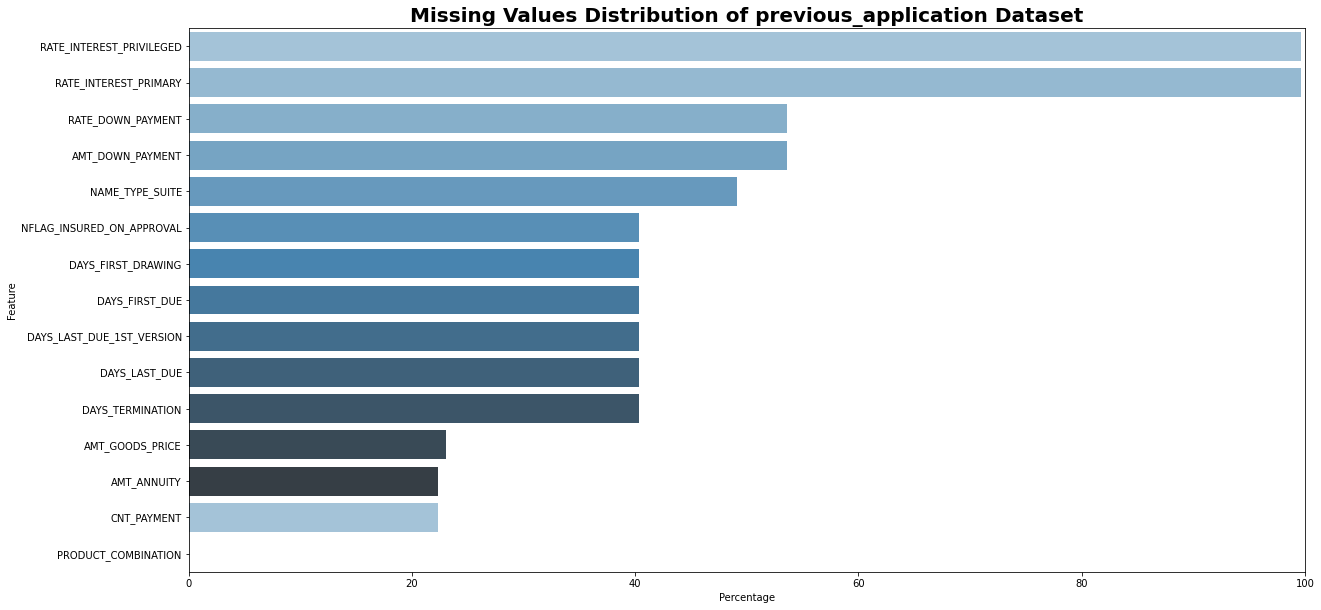

In [52]:
# Plotting number of missing data
fig, ax = plt.subplots(figsize=(20,10))

g = sns.barplot(y = 'Feature',x='Percentage',data=sup_df_null_values[sup_df_null_values['Percentage'] > 0],ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

y = np.arange(len(sup_df_null_values['Feature']))
x = sup_df_null_values['Percentage']


ax.set_title('Missing Values Distribution of previous_application Dataset', color='black', fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
ax.set_xlim(0,100)
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/prev_app_missing_val_dist.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

#### Memeriksa data duplikat

In [53]:
# Check duplicated data
prev_app[prev_app.duplicated()]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL]
Index: []

### Data Cleansing dan Preprocessing

Versi Indonesia:

Pada tahap ini, saya melakukan serangkaian aktivitas mulai dari menghapus kolom dengan missing values, mengganti missing value dengan metode imputasi, menghapus kolom/feature yang kurang relevan untuk analisis nanti, mengatasi data dengan format/tipe data yang tidak semestinya, hingga menciptakan feature/kolom baru berdasarkan data yang sudah ada (bila perlu).

English version:

On this stage, we do a series of activies including dropping/imputing column with missing values, dropping irrelevant column, handling inconsistent data, converting the data type of each feature to the proper format/type, as well as creating new feature based on the existing one.

#### Menghapus kolom dengan persentase data hilang (missing values) lebih dari 40%

In [54]:
NA_cols_drop_sup = ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 
                    'NFLAG_INSURED_ON_APPROVAL', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 
                    'DAYS_TERMINATION']

prev_app.drop(columns=NA_cols_drop_sup, inplace=True)

In [55]:
# Checking the dataframe column after removal of columns with missing value more than 40%

prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

#### Menghapus kolom/feature dengan data kurang relevan

Versi Indonesia:

Pada kasus ini, feature yang relevan merupakan kolom yang mengandung informasi utama seputar pengajuan pinjaman terdahulu seperti kolom SK_ID_PREV dan SK_ID_CURR karena berfungsi sebagai identitas klien. Kemudian ada pula kolom NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS yang mana dengan kolom tersebut, saya sudah cukup mampu untuk mengetahui konteks keseluruhan dari pinjaman terdahulu. Selain itu, ada pula kolom menarik yakni 'CHANNEL_TYPE' yang mengandung informasi terkait dari kanal mana Home Credit memperoleh kliennya.

English version:

In this case, relevant features are columns that contain main information about the previous application like the SK_ID_PREV and SK_ID_CURR as the main identifier column and NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS. Because only from these column, we could see big picture of the loans that were applied. Also, there is an interesting column named 'CHANNEL_TYPE' which consists information from which channel the company acquired the clients/borrowers.   

In [56]:
irrelevant_cols_sup = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 
                       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 
                       'NAME_PRODUCT_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

prev_app.drop(irrelevant_cols_sup, axis=1, inplace=True)

In [57]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   CHANNEL_TYPE            1670214 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 127.4+ MB


#### Menghapus feature dengan angka multikoliniearitas tinggi (lebih dari 0.7)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'SK_ID_PREV'),
  Text(0, 1.5, 'SK_ID_CURR'),
  Text(0, 2.5, 'AMT_ANNUITY'),
  Text(0, 3.5, 'AMT_APPLICATION'),
  Text(0, 4.5, 'AMT_CREDIT'),
  Text(0, 5.5, 'AMT_GOODS_PRICE')])

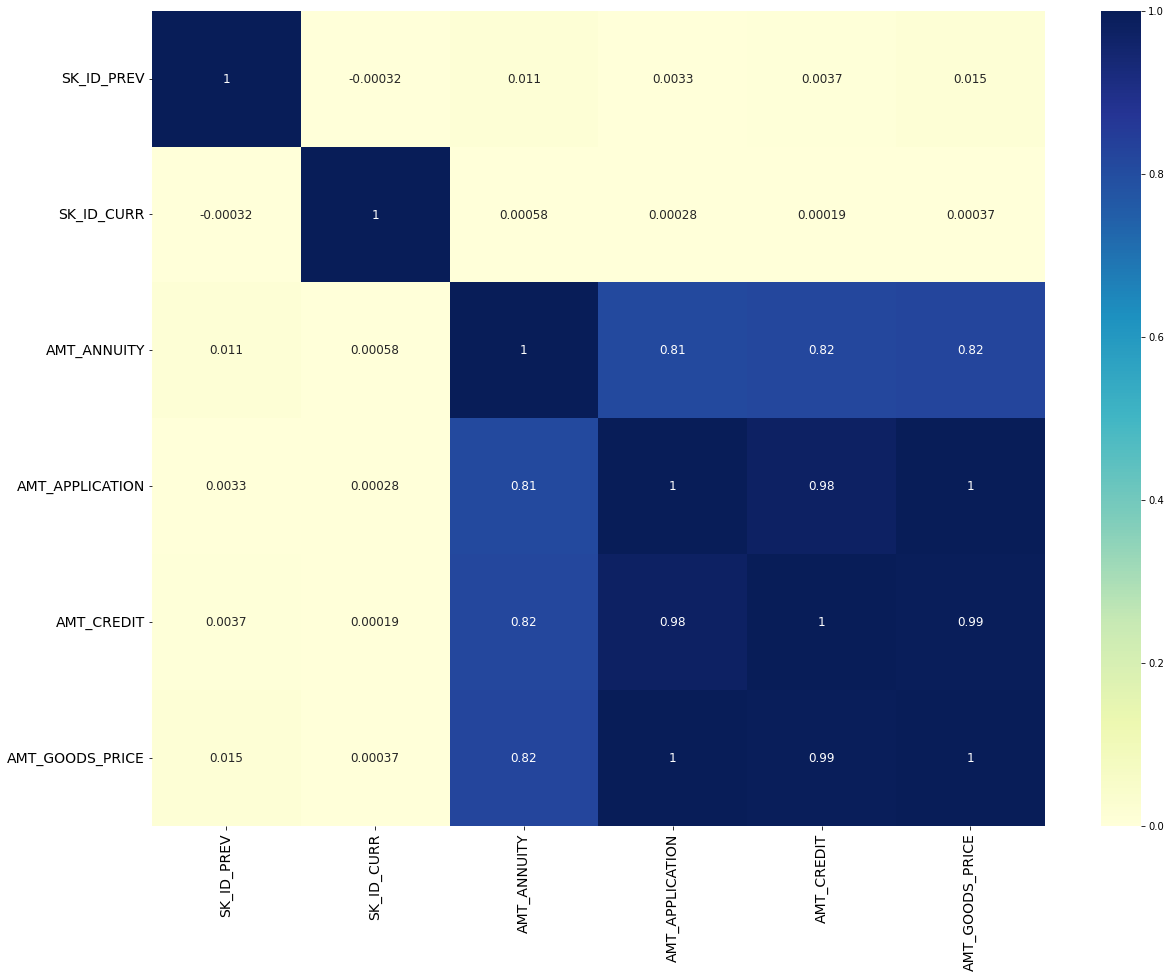

In [58]:
# correlation matrix showing correlation co-effiecients 
corr_matrix = prev_app.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [59]:
col_with_multi_sup = ['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_APPLICATION']
prev_app.drop(columns=col_with_multi_sup, inplace=True)

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'SK_ID_PREV'),
  Text(0, 1.5, 'SK_ID_CURR'),
  Text(0, 2.5, 'AMT_CREDIT')])

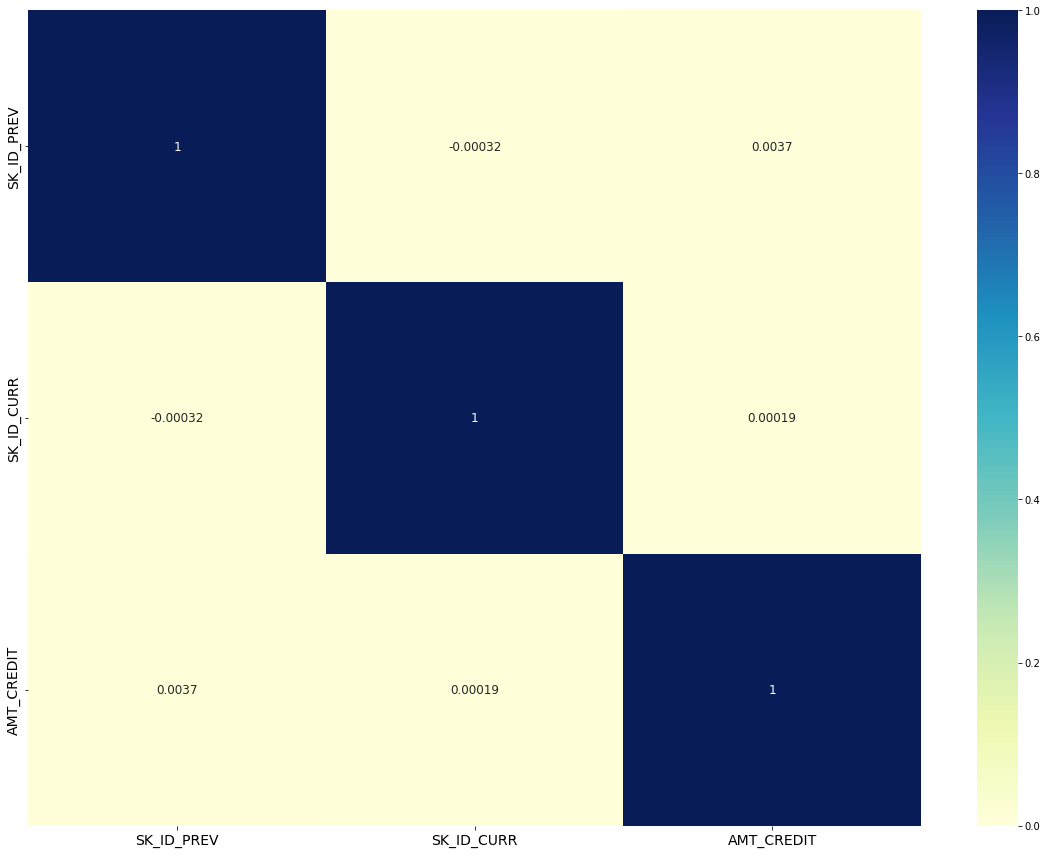

In [60]:
# once again checking the possibility of  multicollinear features 
corr_matrix = prev_app.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [61]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_CREDIT              1670213 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 5   NAME_CONTRACT_STATUS    1670214 non-null  object 
 6   CHANNEL_TYPE            1670214 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 89.2+ MB


#### Memeriksa kardinalitas data

Pada tahap ini saya memeriksa dataset untuk mencari tahu apakah terdapat data yang tidak konsisten pada setiap feature. Saya juga memeriksa jumlah nilai unik data pada setiap feature.

In [63]:
# get all categorical columns
col_cat = prev_app.select_dtypes('object').columns

# loops for categorical data
for i in col_cat:
    print(prev_app[i].value_counts())
    print()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   

Versi Indonesia:

Saya menemukan adanya nilai 'XNA' lagi di kolom 'NAME_CONTRACT_TYPE' dan 'XNA' dan 'XAP' di kolom 'NAME_CASH_LOAN_PURPOSE'. Sebagaimana kasus pada dataset sebelumnya, nilai 'XNA' (begitu pula 'XAP') merujuk pada missing value. Jadi, saya akan menghitung terlebih dahulu persentase nilai-nilai tersebut pada kolom terkait guna menentukan langkah selanjutnya.

English version:

We found 'XNA' value in 'NAME_CONTRACT_TYPE' column and 'XNA' and 'XAP' value in 'NAME_CASH_LOAN_PURPOSE'. As we already know, both of these values are referring to null/missing value. So, we better count these values of each column to decide what's the next step.

In [64]:
# Checking the percentage of 'XNA' value in NAME_CONTRACT_TYPE column

pct_XNA_contract = round(len(prev_app[prev_app['NAME_CONTRACT_TYPE'] == 'XNA']) / prev_app.shape[0]*100, 4)

print('The percentage of "XNA" value in "NAME_CONTRACT_TYPE" is',pct_XNA_contract,'%')

The percentage of "XNA" value in "NAME_CONTRACT_TYPE" is 0.0207 %


In [67]:
# Checking the percentage of 'XNA' and 'XAP' value in NAME_CASH_LOAN_PURPOSE column

pct_XNA_cash = round(len(prev_app[prev_app['NAME_CASH_LOAN_PURPOSE'] == 'XNA']) / prev_app.shape[0]*100, 4)
pct_XAP_cash = round(len(prev_app[prev_app['NAME_CASH_LOAN_PURPOSE'] == 'XAP']) / prev_app.shape[0]*100, 4)

print('The percentage of "XNA" value in "NAME_CASH_LOAN_PURPOSE" is',pct_XNA_cash,'%')
print('The percentage of "XAP" value in "NAME_CASH_LOAN_PURPOSE" is',pct_XAP_cash,'%')

The percentage of "XNA" value in "NAME_CASH_LOAN_PURPOSE" is 40.5887 %
The percentage of "XAP" value in "NAME_CASH_LOAN_PURPOSE" is 55.2421 %


Versi Indonesia:

Berdasarkan perhitungan, saya mendapati bahwa jumlah nilai 'XAP'/'XNA' di kolom 'NAME_CASH_LOAN_PURPOSE' hampir menyentuh 100% dari total data. Dengan demikian, saya tidak akan menghapus seluruh baris yang mengandung nilai tersebut. Selain itu, kedua nilai tersebut mendominasi kolom terkait dan bila saya melakukan imputasi berupa penggantian nilai terhadap kedua data tersebut, maka saya khawatir hal tersebut akan sangat mengganggu validitas data. Oleh karena itu, saya hanya memutuskan untuk melakukan imputasi terhadap nilai 'XNA' pada kolom 'NAME_CONTRACT_TYPE' mengingat persentasenya yang sangat kecil.
Saya mengganti nilai 'XNA' dengan nilai terbanyak pada kolom terkait yakni 'Cash loans'.

English version:

Based on that calculation we found that the total amount of 'XAP'/'XNA' value in 'NAME_CASH_LOAN_PURPOSE' column is almost 100% of the data so it is not wise to drop the row containing these values. The only thing we can do is imputing the 'XNA' value in 'NAME_CONTRACT_TYPE' column with its most frequent value that is 'Cash loans'.

In [68]:
# Implementing the imputation method to replace 'XNA' value in NAME_CONTRACT_TYPE column

prev_app['NAME_CONTRACT_TYPE'].replace('XNA', 'Cash loans', inplace=True)

In [69]:
# get all categorical columns
col_cat = prev_app.select_dtypes('object').columns

# loops for categorical data
for i in col_cat:
    print(prev_app[i].value_counts())
    print()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water s

#### Memeriksa keberadaan data yang ditulis dengan format tak semestinya atau dengan tipe salah

In [58]:
prev_app.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_CREDIT  \
0     2030495      271877     Consumer loans  17145.0000   
1     2802425      108129         Cash loans 679671.0000   
2     2523466      122040         Cash loans 136444.5000   
3     2819243      176158         Cash loans 470790.0000   
4     1784265      202054         Cash loans 404055.0000   
5     1383531      199383         Cash loans 340573.5000   
6     2315218      175704         Cash loans      0.0000   
7     1656711      296299         Cash loans      0.0000   
8     2367563      342292         Cash loans      0.0000   
9     2579447      334349         Cash loans      0.0000   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS             CHANNEL_TYPE  
0                    XAP             Approved             Country-wide  
1                    XNA             Approved           Contact center  
2                    XNA             Approved  Credit and cash offices  
3                    XNA             Approved  Credit and cash offices  
4                Repairs              Refused  Credit and cash offices  
5      Everyday expenses             Approved  Credit and cash offices  
6                    XNA             Canceled  Credit and cash offices  
7                    XNA             Canceled  Credit and cash offices  
8                    XNA             Canceled  Credit and cash offices  
9                    XNA             Canceled  Credit and cash offices

In [83]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_CREDIT              1670213 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 5   NAME_CONTRACT_STATUS    1670214 non-null  object 
 6   CHANNEL_TYPE            1670214 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 89.2+ MB


Kolom 'SK_ID_PREV' dan 'SK_ID_CURR' sejatinya merupakan data kategorikal karena mencirikan suatu objek (klien). Oleh karena itu, saya turut mengubah tipe data menjadi object.

In [84]:
# Altering the data type contained in 'SK_ID_PREV' column
prev_app['SK_ID_PREV'] = prev_app['SK_ID_PREV'].astype('object')

In [85]:
# Altering the data type contained in 'SK_ID_CURR' column
prev_app['SK_ID_CURR'] = prev_app['SK_ID_CURR'].astype('object')

In [86]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  object 
 1   SK_ID_CURR              1670214 non-null  object 
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_CREDIT              1670213 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 5   NAME_CONTRACT_STATUS    1670214 non-null  object 
 6   CHANNEL_TYPE            1670214 non-null  object 
dtypes: float64(1), object(6)
memory usage: 89.2+ MB


#### Membuat kolom baru berdasarkan feature yang ada

Untuk mempermudah proses analisis dan penggalian data ke depan, saya juga membuat kolom baru yang merupakan kategorisasi/segmentasi dari data numerikal yang bersifat kontinyu. Adapun kolom baru tersebut adalah 'AMT_CREDIT_RANGE' yang mengkategorisasi data dari kolom 'AMT_CREDIT'.

In [87]:
# Making new column named 'AMT_CREDIT_RANGE' based on 'AMT_CREDIT' column
bins= [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
labels = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000',
        '600000-700000','700000-800000','850000-900000','900000 and above']
prev_app['AMT_CREDIT_RANGE'] = pd.cut(prev_app['AMT_CREDIT'], bins=bins, labels=labels, right=False)
prev_app['AMT_CREDIT_RANGE'].value_counts(sort=False).to_frame()

AMT_CREDIT_RANGE
<100000                     936775
100000-200000               295054
200000-300000               137655
300000-400000                57369
400000-500000                61640
500000-600000                38526
600000-700000                22140
700000-800000                26407
850000-900000                13718
900000 and above             80929

In [88]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  object  
 1   SK_ID_CURR              1670214 non-null  object  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object  
 3   AMT_CREDIT              1670213 non-null  float64 
 4   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object  
 5   NAME_CONTRACT_STATUS    1670214 non-null  object  
 6   CHANNEL_TYPE            1670214 non-null  object  
 7   AMT_CREDIT_RANGE        1670213 non-null  category
dtypes: category(1), float64(1), object(6)
memory usage: 90.8+ MB


#### Melakukan imputasi terhadap kolom lain yang masih memiliki missing values

In [89]:
# Checking the null values again
missing_value_sup = prev_app.isnull().sum() 
missing_value_sup[missing_value_sup != 0]

AMT_CREDIT          1
AMT_CREDIT_RANGE    1
dtype: int64

Versi Indonesia:

Saya mendapati bahwa hanya ada dua kolom dengan 1 baris missing value, yakni AMT_CREDIT dan AMT_CREDIT_RANGE. Oleh karena kedua kolom tersebut saling berhubungan, maka saya cukup menghapus baris dari salah satunya.

English version:

We found that 'AMT_CREDIT' column only has 1 empty row so it is okay to drop it.

In [90]:
prev_app.dropna(subset='AMT_CREDIT', inplace=True)

In [91]:
# Checking the null values again
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670213 entries, 0 to 1670213
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670213 non-null  object  
 1   SK_ID_CURR              1670213 non-null  object  
 2   NAME_CONTRACT_TYPE      1670213 non-null  object  
 3   AMT_CREDIT              1670213 non-null  float64 
 4   NAME_CASH_LOAN_PURPOSE  1670213 non-null  object  
 5   NAME_CONTRACT_STATUS    1670213 non-null  object  
 6   CHANNEL_TYPE            1670213 non-null  object  
 7   AMT_CREDIT_RANGE        1670213 non-null  category
dtypes: category(1), float64(1), object(6)
memory usage: 103.5+ MB


## Menggabungkan Kedua Dataset (Utama dan Pendukung) yang sudah Dimodifikasi

Versi Indonesia:

Sekarang, saya mencoba menggabungkan dataset utama dan dataset pendukung yang masing-masingnya sudah saya modifikasi melalui proses data cleansing dan preprocessing. Ini saya lakukan agar saat tahap Analisis Data Eksploratoris nanti, proses penggalian temuan menarik dari data bisa mendalam.

English version:

Now, we merge the modified application_test, application_train, and previous_application dataset in order to be used in EDA process later.

In [92]:
df_comb = pd.merge(left=application_merge,right=prev_app,how='inner',on='SK_ID_CURR',suffixes='_x')
df_comb.shape

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11944\4110431170.py:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df_comb = pd.merge(left=application_merge,right=prev_app,how='inner',on='SK_ID_CURR',suffixes='_x')


(1670213, 30)

Catatan: penambahan argumen suffixes='_x' adalah untuk melabeli nama-nama kolom di dataset previous_application yang memiliki kesamaan dengan kolom pada dataset utama.

In [93]:
df_comb.head(10)

SK_ID_CURR NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0     100001          Cash loans           F            N               Y   
1     100005          Cash loans           M            N               Y   
2     100005          Cash loans           M            N               Y   
3     100013          Cash loans           M            Y               Y   
4     100013          Cash loans           M            Y               Y   
5     100013          Cash loans           M            Y               Y   
6     100013          Cash loans           M            Y               Y   
7     100028          Cash loans           F            N               Y   
8     100028          Cash loans           F            N               Y   
9     100028          Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_ NAME_INCOME_TYPE  \
0             0       135000.0000  568800.0000          Working   
1             0        99000.0000  222768.0000          Working   
2             0        99000.0000  222768.0000          Working   
3             0       202500.0000  663264.0000          Working   
4             0       202500.0000  663264.0000          Working   
5             0       202500.0000  663264.0000          Working   
6             0       202500.0000  663264.0000          Working   
7             2       315000.0000 1575000.0000          Working   
8             2       315000.0000 1575000.0000          Working   
9             2       315000.0000 1575000.0000          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   
2  Secondary / secondary special            Married  House / apartment   
3               Higher education            Married  House / apartment   
4               Higher education            Married  House / apartment   
5               Higher education            Married  House / apartment   
6               Higher education            Married  House / apartment   
7  Secondary / secondary special            Married  House / apartment   
8  Secondary / secondary special            Married  House / apartment   
9  Secondary / secondary special            Married  House / apartment   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     OCCUPATION_TYPE  \
0           2329               5170              812            Laborers   
1           4469               9118             1623  Low-skill Laborers   
2           4469               9118             1623  Low-skill Laborers   
3           4458               2175             3503             Drivers   
4           4458               2175             3503             Drivers   
5           4458               2175             3503             Drivers   
6           4458               2175             3503             Drivers   
7           1866               2000             4208         Sales staff   
8           1866               2000             4208         Sales staff   
9           1866               2000             4208         Sales staff   

  REGION_RATING_CLIENT   ind  TARGET  AGE AGE_SEGMENT AMT_INCOME_RANGE  \
0                    2  test     NaN   52       Fifty    100000-200000   
1                    2  test     NaN   49      Fourty          <100000   
2                    2  test     NaN   49      Fourty          <100000   
3                    2  test     NaN   54       Fifty    200000-300000   
4                    2  test     NaN   54       Fifty    200000-300000   
5                    2  test     NaN   54       Fifty    200000-300000   
6                    2  test     NaN   54       Fifty    200000-300000   
7                    2  test     NaN   38      Thirty    300000-400000   
8                    2  test     NaN   38      Thirty    300000-400000   
9                    2  

In [94]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670213 entries, 0 to 1670212
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_CURR              1670213 non-null  object  
 1   NAME_CONTRACT_TYPE_     1670213 non-null  object  
 2   CODE_GENDER             1670213 non-null  object  
 3   FLAG_OWN_CAR            1670213 non-null  object  
 4   FLAG_OWN_REALTY         1670213 non-null  object  
 5   CNT_CHILDREN            1670213 non-null  int64   
 6   AMT_INCOME_TOTAL        1670213 non-null  float64 
 7   AMT_CREDIT_             1670213 non-null  float64 
 8   NAME_INCOME_TYPE        1670213 non-null  object  
 9   NAME_EDUCATION_TYPE     1670213 non-null  object  
 10  NAME_FAMILY_STATUS      1670213 non-null  object  
 11  NAME_HOUSING_TYPE       1670213 non-null  object  
 12  DAYS_EMPLOYED           1670213 non-null  int64   
 13  DAYS_REGISTRATION       1670213 non-null  

In [95]:
# Renaming the column names after merging from combined df

df_comb = df_comb.rename({'NAME_CONTRACT_TYPE_':'NAME_CONTRACT_TYPE', 'AMT_CREDIT_':'AMT_CREDIT',
                          'AMT_CREDIT_RANGE_':'AMT_CREDIT_RANGE','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV', 
                          'AMT_CREDITx':'AMT_CREDIT_PREV', 'AMT_CREDIT_RANGEx':'AMT_CREDIT_RANGE_PREV'}, axis=1)

In [96]:
df_comb.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0     100001         Cash loans           F            N               Y   
1     100005         Cash loans           M            N               Y   
2     100005         Cash loans           M            N               Y   
3     100013         Cash loans           M            Y               Y   
4     100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT NAME_INCOME_TYPE  \
0             0       135000.0000 568800.0000          Working   
1             0        99000.0000 222768.0000          Working   
2             0        99000.0000 222768.0000          Working   
3             0       202500.0000 663264.0000          Working   
4             0       202500.0000 663264.0000          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   
2  Secondary / secondary special            Married  House / apartment   
3               Higher education            Married  House / apartment   
4               Higher education            Married  House / apartment   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     OCCUPATION_TYPE  \
0           2329               5170              812            Laborers   
1           4469               9118             1623  Low-skill Laborers   
2           4469               9118             1623  Low-skill Laborers   
3           4458               2175             3503             Drivers   
4           4458               2175             3503             Drivers   

  REGION_RATING_CLIENT   ind  TARGET  AGE AGE_SEGMENT AMT_INCOME_RANGE  \
0                    2  test     NaN   52       Fifty    100000-200000   
1                    2  test     NaN   49      Fourty          <100000   
2                    2  test     NaN   49      Fourty          <100000   
3                    2  test     NaN   54       Fifty    200000-300000   
4                    2  test     NaN   54       Fifty    200000-300000   

  AMT_CREDIT_RANGE SK_ID_PREV NAME_CONTRACT_TYPE_PREV  AMT_CREDIT_PREV  \
0    500000-600000    1369693          Consumer loans       23787.0000   
1    200000-300000    1857999              Cash loans           0.0000   
2    200000-300000    2495675          Consumer loans       40153.5000   
3    600000-700000    1865796          Consumer loans       47934.0000   
4    600000-700000    1222069              Cash loans           0.0000   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS             CHANNEL_TYPE  \
0                    XAP             Approved             Country-wide   
1                    XNA             Canceled  Credit and cash offices   
2                    XAP             Approved             Country-wide   
3                    XAP             Approved                    Stone   
4                    XNA             Canceled  Credit and cash offices   

  AMT_CREDIT_RANGE_PREV  
0               <100000  
1               <100000  
2               <100000  
3               <100000  
4               <100000

## Mengekstrak Kembali Dataset application_test/train yang sebelumnya sudah Dimodifikasi

Versi Indonesia:

Sekarang, saya mencoba mengekstrak masing-masing dari dataset utama tersebut untuk nanti saya pergunakan saat tahap EDA maupun penyusunan model prediksi. Terlebih saat EDA nanti, saya hanya membutuhkan dataset application_train mengingat dataset tersebut sudah memiliki TARGET yang akan sangat berguna bagi saya saat meninjau data lebih dalam.

English version:

Now, we create new-modified application_train/test dataset by separating the application_train/test that each already contained additional column from previous_application dataset.

In [97]:
app_mod_test, app_mod_train = df_comb[df_comb["ind"].eq("test")], df_comb[df_comb["ind"].eq("train")]

In [98]:
app_mod_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256513 entries, 0 to 256512
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   SK_ID_CURR               256513 non-null  object  
 1   NAME_CONTRACT_TYPE       256513 non-null  object  
 2   CODE_GENDER              256513 non-null  object  
 3   FLAG_OWN_CAR             256513 non-null  object  
 4   FLAG_OWN_REALTY          256513 non-null  object  
 5   CNT_CHILDREN             256513 non-null  int64   
 6   AMT_INCOME_TOTAL         256513 non-null  float64 
 7   AMT_CREDIT               256513 non-null  float64 
 8   NAME_INCOME_TYPE         256513 non-null  object  
 9   NAME_EDUCATION_TYPE      256513 non-null  object  
 10  NAME_FAMILY_STATUS       256513 non-null  object  
 11  NAME_HOUSING_TYPE        256513 non-null  object  
 12  DAYS_EMPLOYED            256513 non-null  int64   
 13  DAYS_REGISTRATION        256513 non-null  in

In [99]:
app_mod_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413700 entries, 256513 to 1670212
Data columns (total 30 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   SK_ID_CURR               1413700 non-null  object  
 1   NAME_CONTRACT_TYPE       1413700 non-null  object  
 2   CODE_GENDER              1413700 non-null  object  
 3   FLAG_OWN_CAR             1413700 non-null  object  
 4   FLAG_OWN_REALTY          1413700 non-null  object  
 5   CNT_CHILDREN             1413700 non-null  int64   
 6   AMT_INCOME_TOTAL         1413700 non-null  float64 
 7   AMT_CREDIT               1413700 non-null  float64 
 8   NAME_INCOME_TYPE         1413700 non-null  object  
 9   NAME_EDUCATION_TYPE      1413700 non-null  object  
 10  NAME_FAMILY_STATUS       1413700 non-null  object  
 11  NAME_HOUSING_TYPE        1413700 non-null  object  
 12  DAYS_EMPLOYED            1413700 non-null  int64   
 13  DAYS_REGISTRATION     

Versi Indonesia:

Untuk berjaga-jaga, saya memutuskan untuk mengekspor masing-masing dataset baru tersebut langsung ke format CSV dengan direktori penyimpanan di local drive sendiri.

English version:

As part of backup plan, we export and save the app_mod_train and app_mod_test dataset to CSV format.

In [100]:
app_mod_train = app_mod_train.to_csv("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/home-credit-default-risk/app_mod_train.csv")

In [101]:
app_mod_test = app_mod_test.to_csv("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/home-credit-default-risk/app_mod_test.csv")

# Analisis Data Eksploratoris (Exploratory Data Analysis)

## Eksplorasi Dataset

#### Mengimpor dan membaca dataset

Versi Indonesia:

Untuk tahap ini, saya menggunakan dataset application_train yang sudah saya modifikasi sebelumnya (baik membersihkan data inti maupun menambahkan kolom dari dataset previous_application). Dataset app_mod_train saya gunakan karena hanya dataset inilah yang sudah memiliki kolom TARGET yang kelak dapat membantu saya melakukan eksplorasi mendalam saat EDA.

English version:

For this phase, we use the modified application_train dataset (app_mod_train) because it already has TARGET column since beginning.

In [102]:
df_EDA = pd.read_csv("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/home-credit-default-risk/app_mod_train.csv", index_col=0)

In [103]:
df_EDA.head(4)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
256513      100002         Cash loans           M            N   
256514      100003         Cash loans           F            N   
256515      100003         Cash loans           F            N   
256516      100003         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
256513               Y             0       202500.0000  406597.5000   
256514               N             0       270000.0000 1293502.5000   
256515               N             0       270000.0000 1293502.5000   
256516               N             0       270000.0000 1293502.5000   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
256513          Working  Secondary / secondary special  Single / not married   
256514    State servant               Higher education               Married   
256515    State servant               Higher education               Married   
256516    State servant               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
256513  House / apartment            637               3648             2120   
256514  House / apartment           1188               1186              291   
256515  House / apartment           1188               1186              291   
256516  House / apartment           1188               1186              291   

       OCCUPATION_TYPE  REGION_RATING_CLIENT    ind  TARGET  AGE AGE_SEGMENT  \
256513        Laborers                     2  train  1.0000   25      Twenty   
256514      Core staff                     1  train  0.0000   45      Fourty   
256515      Core staff                     1  train  0.0000   45      Fourty   
256516      Core staff                     1  train  0.0000   45      Fourty   

       AMT_INCOME_RANGE  AMT_CREDIT_RANGE  SK_ID_PREV NAME_CONTRACT_TYPE_PREV  \
256513    200000-300000     400000-500000     1038818          Consumer loans   
256514    200000-300000  900000 and above     1810518              Cash loans   
256515    200000-300000  900000 and above     2636178          Consumer loans   
256516    200000-300000  900000 and above     2396755          Consumer loans   

        AMT_CREDIT_PREV NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
256513      179055.0000                    XAP             Approved   
256514     1035882.0000                    XNA             Approved   
256515      348637.5000                    XAP             Approved   
256516       68053.5000                    XAP             Approved   

                   CHANNEL_TYPE AMT_CREDIT_RANGE_PREV  
256513                    Stone         100000-200000  
256514  Credit and cash offices      900000 and above  
256515                    Stone         300000-400000  
256516             Country-wide               <100000

#### Informasi dataset

In [104]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413700 entries, 256513 to 1670212
Data columns (total 30 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   SK_ID_CURR               1413700 non-null  int64  
 1   NAME_CONTRACT_TYPE       1413700 non-null  object 
 2   CODE_GENDER              1413700 non-null  object 
 3   FLAG_OWN_CAR             1413700 non-null  object 
 4   FLAG_OWN_REALTY          1413700 non-null  object 
 5   CNT_CHILDREN             1413700 non-null  int64  
 6   AMT_INCOME_TOTAL         1413700 non-null  float64
 7   AMT_CREDIT               1413700 non-null  float64
 8   NAME_INCOME_TYPE         1413700 non-null  object 
 9   NAME_EDUCATION_TYPE      1413700 non-null  object 
 10  NAME_FAMILY_STATUS       1413700 non-null  object 
 11  NAME_HOUSING_TYPE        1413700 non-null  object 
 12  DAYS_EMPLOYED            1413700 non-null  int64  
 13  DAYS_REGISTRATION        1413700 non-

Saya mendapati adanya kolom 'ind' sehingga saya perlu menghapus kolom tersebut karena sudah tidak akan saya gunakan. Selain itu, data pada kolom TARGET seharusnya bertipe integer bukan float. Dengan demikian saya juga akan mengubah tipe data kolom TARGET.

In [105]:
df_EDA.drop('ind', axis=1, inplace=True)

In [106]:
# Altering the data type contained in TARGET column
df_EDA['TARGET'] = df_EDA['TARGET'].astype('int')

In [107]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413700 entries, 256513 to 1670212
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   SK_ID_CURR               1413700 non-null  int64  
 1   NAME_CONTRACT_TYPE       1413700 non-null  object 
 2   CODE_GENDER              1413700 non-null  object 
 3   FLAG_OWN_CAR             1413700 non-null  object 
 4   FLAG_OWN_REALTY          1413700 non-null  object 
 5   CNT_CHILDREN             1413700 non-null  int64  
 6   AMT_INCOME_TOTAL         1413700 non-null  float64
 7   AMT_CREDIT               1413700 non-null  float64
 8   NAME_INCOME_TYPE         1413700 non-null  object 
 9   NAME_EDUCATION_TYPE      1413700 non-null  object 
 10  NAME_FAMILY_STATUS       1413700 non-null  object 
 11  NAME_HOUSING_TYPE        1413700 non-null  object 
 12  DAYS_EMPLOYED            1413700 non-null  int64  
 13  DAYS_REGISTRATION        1413700 non-

#### Statistik deskriptif dataset

In [108]:
# Memeriksa statistik deskriptif dari variabel/feature numerikal dalam dataset gabungan terkait
df_EDA.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
count 1413700.0000  1413700.0000      1413700.0000 1413700.0000   
mean   278481.1744        0.4049       173316.1027  587553.7085   
std    102811.7364        0.7173       198573.4299  384917.4652   
min    100002.0000        0.0000        25650.0000   45000.0000   
25%    189364.0000        0.0000       112500.0000  270000.0000   
50%    278991.5000        0.0000       157500.0000  508495.5000   
75%    367556.0000        1.0000       207000.0000  807984.0000   
max    456255.0000       19.0000    117000000.0000 4050000.0000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count   1413700.0000       1413700.0000     1413700.0000   
mean      72663.2679          5003.2358        3034.5642   
std      143337.2005          3551.0505        1507.3764   
min           0.0000             0.0000           0.0000   
25%        1042.0000          2001.0000        1783.0000   
50%        2401.0000          4508.0000        3330.0000   
75%        6313.0000          7510.0000        4319.0000   
max      365243.0000         24672.0000        7197.0000   

       REGION_RATING_CLIENT       TARGET          AGE   SK_ID_PREV  \
count          1413700.0000 1413700.0000 1413700.0000 1413700.0000   
mean                 2.0596       0.0866      44.2138 1922744.1313   
std                  0.4958       0.2812      11.9022  532715.4710   
min                  1.0000       0.0000      20.0000 1000001.0000   
25%                  2.0000       0.0000      34.0000 1461345.5000   
50%                  2.0000       0.0000      43.0000 1922697.5000   
75%                  2.0000       0.0000      54.0000 2384012.2500   
max                  3.0000       1.0000      69.0000 2845381.0000   

       AMT_CREDIT_PREV  
count     1413700.0000  
mean       196354.0861  
std        319481.2507  
min             0.0000  
25%         24880.5000  
50%         80595.0000  
75%        215640.0000  
max       4509688.5000

In [109]:
# Memeriksa statistik deskriptif dari variabel/feature kategorikal dalam dataset gabungan terkait
df_EDA.select_dtypes('object').describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count             1413700     1413700      1413700         1413700   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq              1307114      955193       937175         1024091   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count           1413700                        1413700            1413700   
unique                7                              5                  5   
top             Working  Secondary / secondary special            Married   
freq             724089                        1037901             910909   

        NAME_HOUSING_TYPE OCCUPATION_TYPE AGE_SEGMENT AMT_INCOME_RANGE  \
count             1413700         1413700     1413700          1413700   
unique                  6              18           5                6   
top     House / apartment        Laborers      Thirty    100000-200000   
freq              1264951          708878      371158           722731   

        AMT_CREDIT_RANGE NAME_CONTRACT_TYPE_PREV NAME_CASH_LOAN_PURPOSE  \
count            1413700                 1413700                1413700   
unique                10                       3                     25   
top     900000 and above              Cash loans                    XAP   
freq              286533                  627077                 786936   

       NAME_CONTRACT_STATUS             CHANNEL_TYPE AMT_CREDIT_RANGE_PREV  
count               1413700                  1413700               1413700  
unique                    4                        8                    10  
top                Approved  Credit and cash offices               <100000  
freq                 886098                   600342                793273

#### Dimensi dataset

In [110]:
### Data Dimension

print ('The dataset used in EDA phase has', str(df_EDA.shape[0]),
       'rows', 'and', str(df_EDA.shape[1]), 'columns.')
print ('Dataset yang dipakai pada tahap EDA ini memiliki', str(df_EDA.shape[0]),
       'baris', 'dan', str(df_EDA.shape[1]), 'kolom.')


The dataset used in EDA phase has 1413700 rows and 29 columns.
Dataset yang dipakai pada tahap EDA ini memiliki 1413700 baris dan 29 kolom.


#### Memeriksa nilai hilang/nulls

In [111]:
df_EDA.isnull().sum()

SK_ID_CURR                 0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_EMPLOYED              0
DAYS_REGISTRATION          0
DAYS_ID_PUBLISH            0
OCCUPATION_TYPE            0
REGION_RATING_CLIENT       0
TARGET                     0
AGE                        0
AGE_SEGMENT                0
AMT_INCOME_RANGE           0
AMT_CREDIT_RANGE           0
SK_ID_PREV                 0
NAME_CONTRACT_TYPE_PREV    0
AMT_CREDIT_PREV            0
NAME_CASH_LOAN_PURPOSE     0
NAME_CONTRACT_STATUS       0
CHANNEL_TYPE               0
AMT_CREDIT_RANGE_PREV      0
dtype: int64

#### Memeriksa data duplikat

In [112]:
df_EDA[df_EDA.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OCCUPATION_TYPE, REGION_RATING_CLIENT, TARGET, AGE, AGE_SEGMENT, AMT_INCOME_RANGE, AMT_CREDIT_RANGE, SK_ID_PREV, NAME_CONTRACT_TYPE_PREV, AMT_CREDIT_PREV, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, CHANNEL_TYPE, AMT_CREDIT_RANGE_PREV]
Index: []

## Menyajikan Temuan

### Persentase peminjam gagal membayar (defaulter) dan berhasil membayar (non-defaulter)

Versi Indonesia:

Saya membagi dataset ini ke dua dataset berbasis nilai kolom TARGET. Kolom TARGET bernilai 1 berarti peminjam gagal membayar/mengalami kesulitan pembayaran dan TARGET bernilai 0 berarti peminjam dalam kondisi di luar ketentuan TARGET bernilai 1.

English version:

Dividing the dataset into two dataset each based on value of TARGET. TARGET=1 means client with payment difficulties and TARGET=0 means all conditions other than included in TARGET=1

In [113]:
target0_df=df_EDA.loc[df_EDA["TARGET"]==0]
target1_df=df_EDA.loc[df_EDA["TARGET"]==1]

In [114]:
# insights from number of target values

percentage_defaulters= round(100*len(target1_df)/(len(target0_df)+len(target1_df)),2)

percentage_nondefaulters=round(100*len(target0_df)/(len(target0_df)+len(target1_df)),2)

print('Count of target0_df:', len(target0_df))
print('Count of target1_df:', len(target1_df))


print('Percentage of clients who paid their loan are: ', percentage_nondefaulters, '%' )
print('Percentage of clients who did not paid their loan are: ', percentage_defaulters, '%' )

Count of target0_df: 1291341
Count of target1_df: 122359
Percentage of clients who paid their loan are:  91.34 %
Percentage of clients who did not paid their loan are:  8.66 %


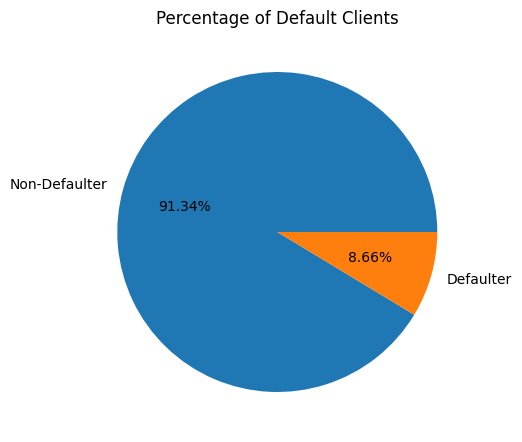

In [117]:
fig = plt.figure(figsize=(4,4), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Non-Defaulter','Defaulter']
dif_in_payment = df_EDA.TARGET.value_counts()
ax.pie(dif_in_payment, labels=labels, autopct='%1.2f%%')
plt.title('Percentage of Default Clients') 
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/pct_def_client_pie.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

### Analisis terhadap variabel kategorikal

#### Analisis univariat

Daftar variabel/feature kategorikal yang digunakan pada tahap analisis ini:
- 'NAME_CONTRACT_TYPE'
- 'CODE_GENDER'
- 'NAME_INCOME_TYPE'
- 'NAME_FAMILY_STATUS'
- 'AGE_SEGMENT'
- 'AMT_INCOME_RANGE'
- 'AMT_CREDIT_RANGE'
- 'FLAG_OWN_CAR'
- 'NAME_CASH_LOAN_PURPOSE'
- 'NAME_CONTRACT_STATUS'
- 'REGION_RATING_CLIENT'

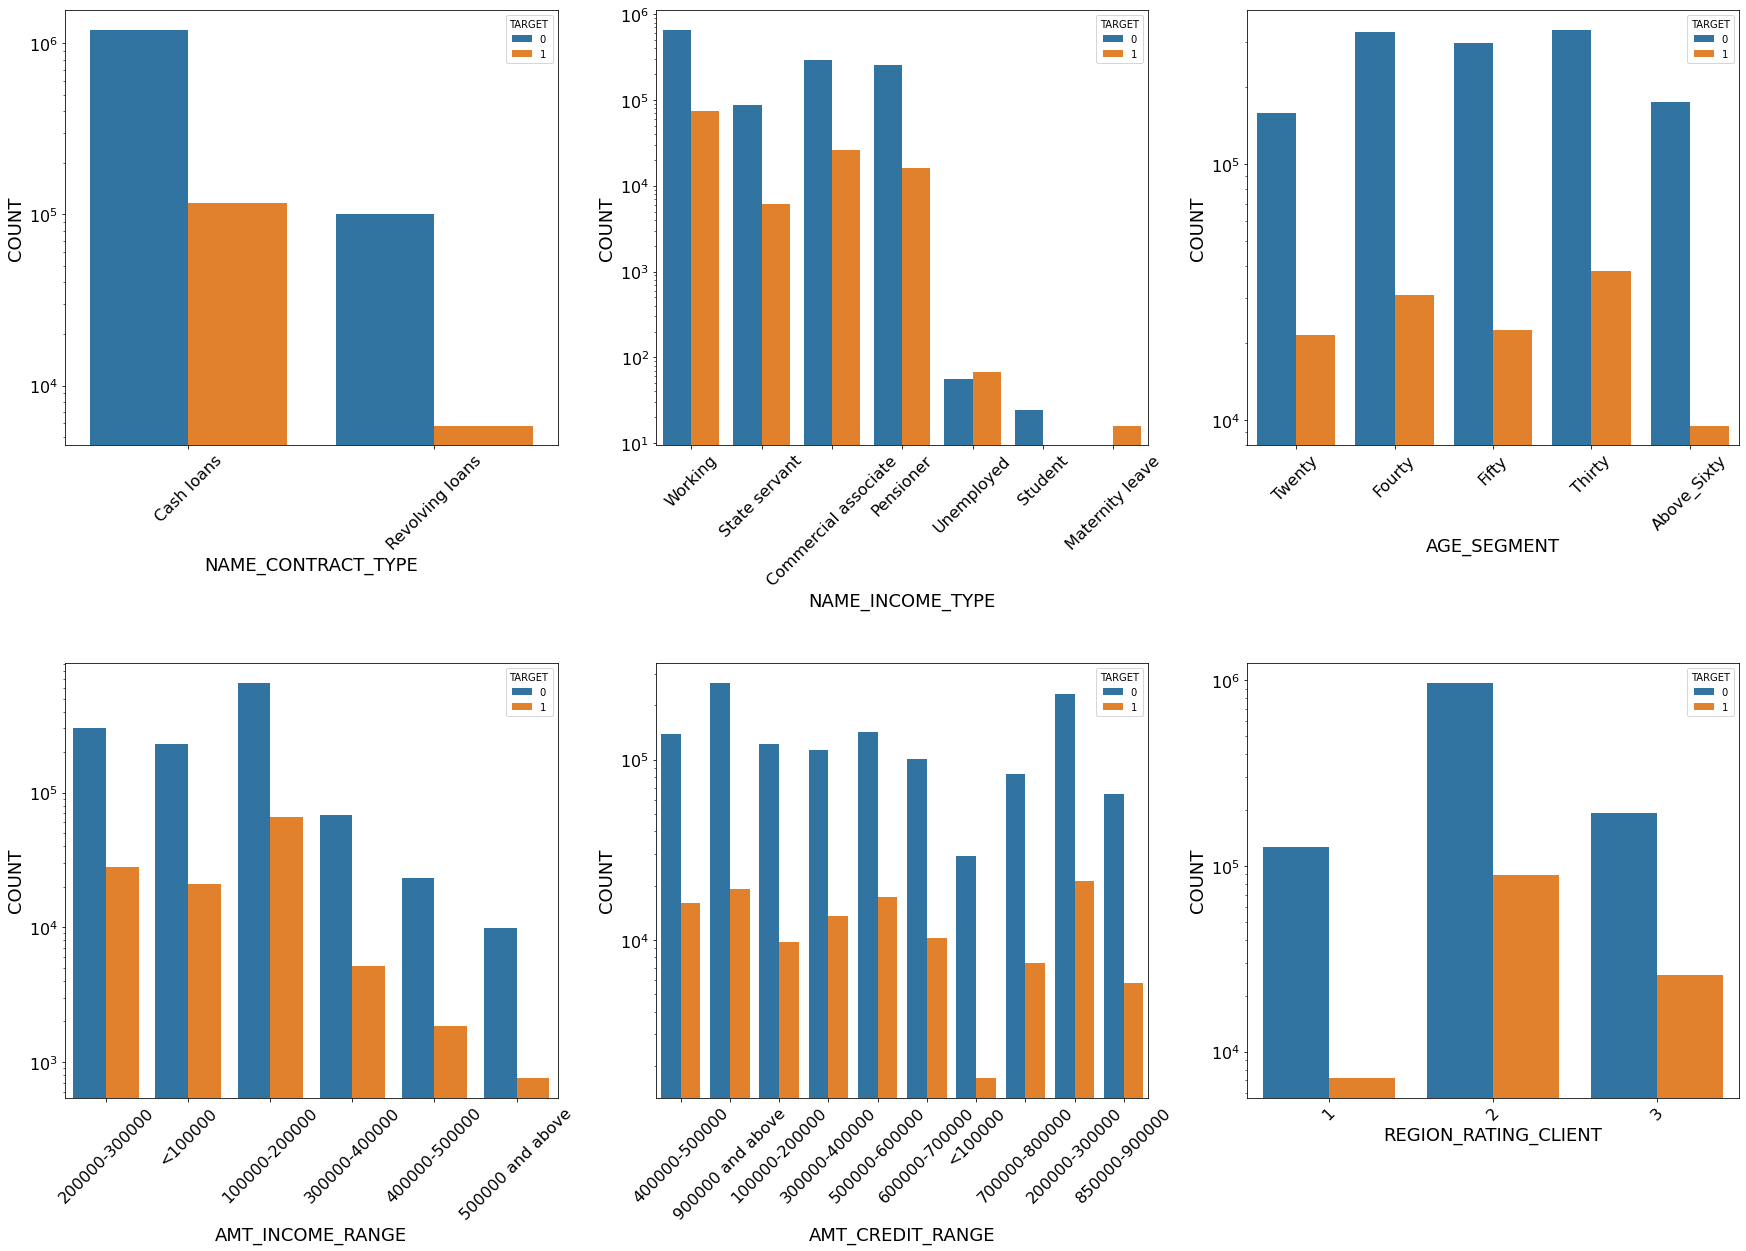

In [130]:
# Categorical Univariate Analysis in logarithmic scale

features = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'AGE_SEGMENT', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
            'REGION_RATING_CLIENT']

plt.figure(figsize = (30, 20))

for i in enumerate(features):
    plt.subplot(2, 3, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df_EDA)
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 45, fontsize=16)
    plt.xlabel(i[1], fontsize=18)
    plt.yticks(fontsize=16)
    plt.ylabel('COUNT', fontsize=18)
    plt.legend(title='TARGET', bbox_to_anchor=(1, 1), loc='upper right')
    plt.yscale('log')

    
# plt.title("Univariate Analysis in Logarithmic Scale\n(For Features: NAME_CONTRACT_TYPE, NAME_INCOME_TYPE, AGE_SEGMENT, AMT_INCOME_RANGE, AMT_CREDIT_RANGE, REGION_RATING_CLIENT)")
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Categorical Univariate Analysis in logarithmic scale.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

Insight:
- 'AMT_INCOME_RANGE' feature:
    - Clients with income rate 100000-200000 are having the highest number of loan but also having highest number of defaulters.
    - Clients with income rate above 500000 are having lowest number of defaulters.
    - Clients with income rate below 100000 and 200000-300000 are having percentage number of defaulters almost equally.

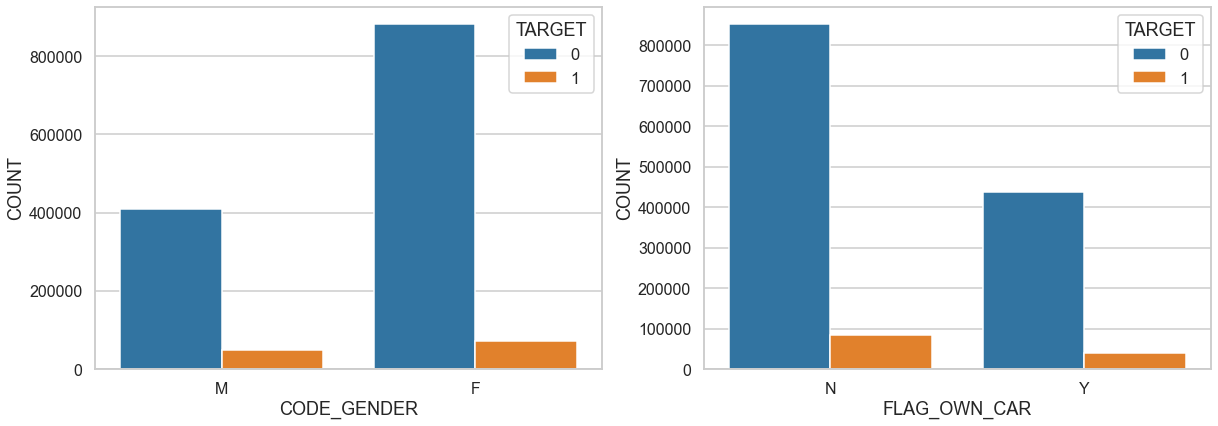

In [139]:
# Categorical Univariate Analysis in value scale

features = ['CODE_GENDER', 'FLAG_OWN_CAR']
plt.figure(figsize = (20, 20))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df_EDA)
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 0, fontsize=16)
    plt.xlabel(i[1], fontsize=18)
    plt.yticks(fontsize=16)
    plt.ylabel('COUNT', fontsize=18)
    plt.legend(title='TARGET', bbox_to_anchor=(1, 1), loc='upper right')
    
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Categorical Univariate Analysis in value scale.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

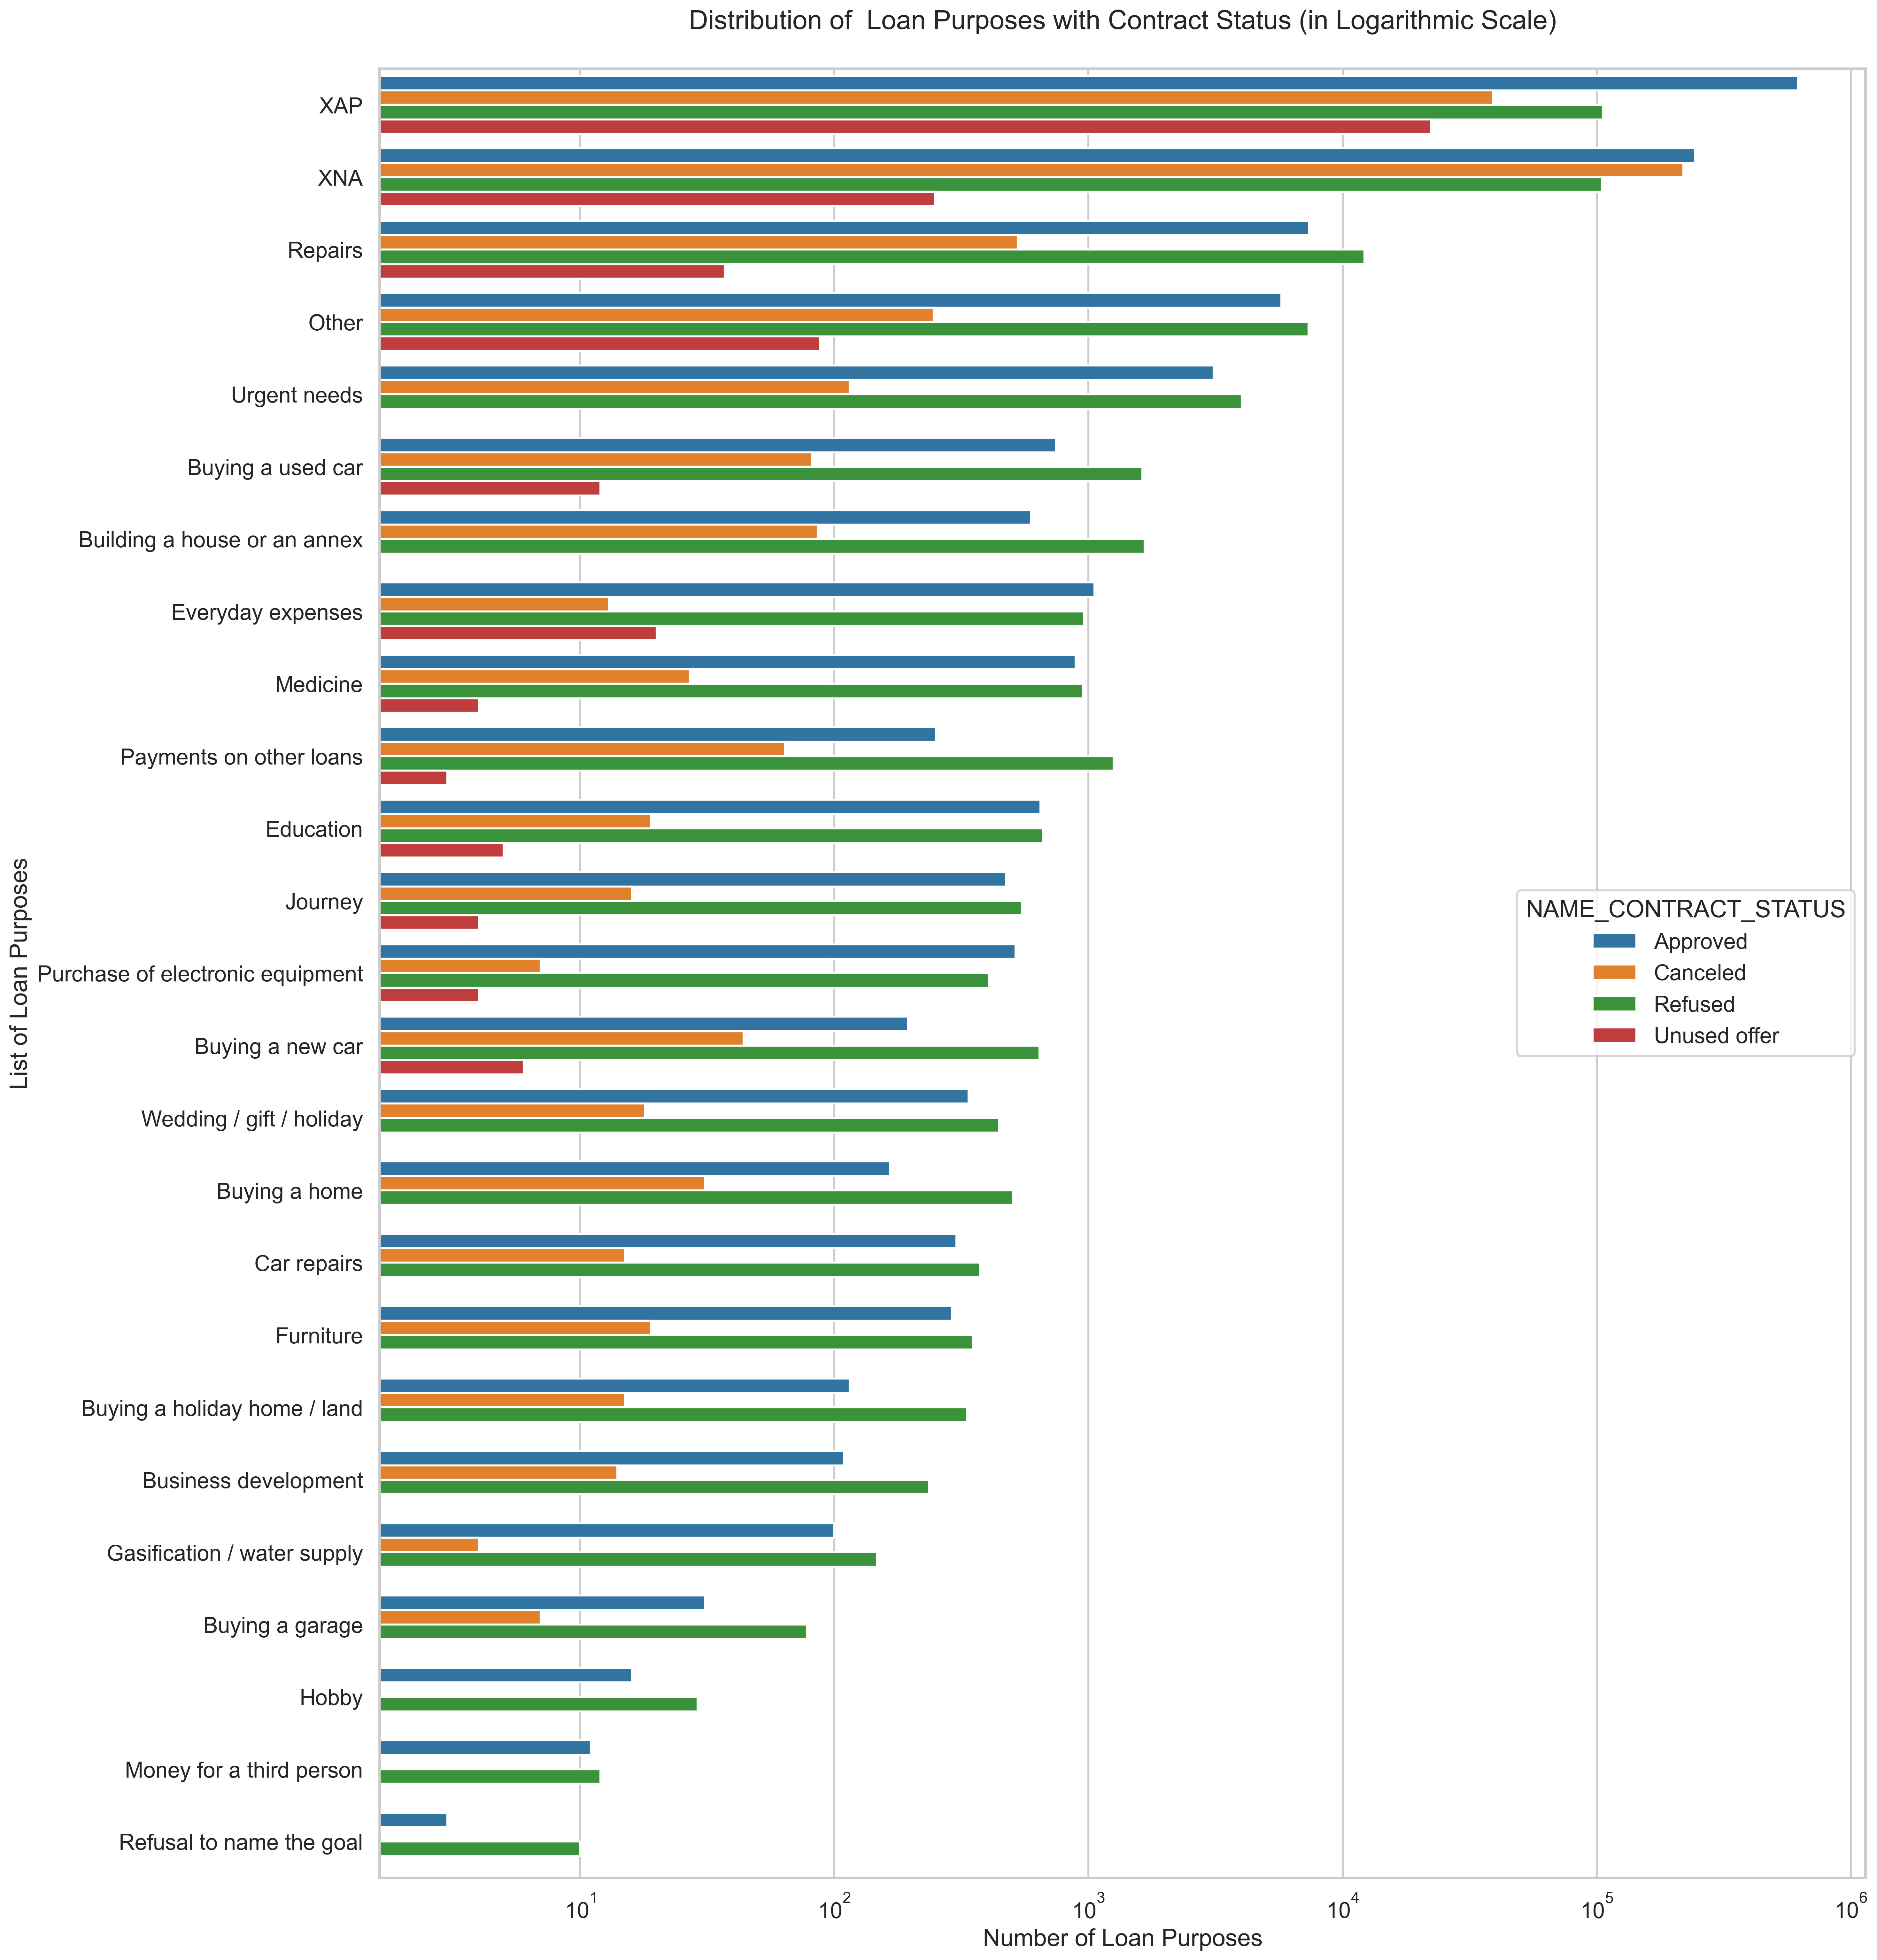

In [143]:
# Distribution of loan purpose with contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,25),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=0)
plt.title('Distribution of  Loan Purposes with Contract Status (in Logarithmic Scale)', fontsize=20)
ax = sns.countplot(data = df_EDA, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_EDA['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 
plt.xlabel('Number of Loan Purposes', fontsize=18)
plt.xscale('log')
plt.ylabel('List of Loan Purposes', fontsize=18)
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Distribution of loan purpose with contract status in logarithmic scale.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

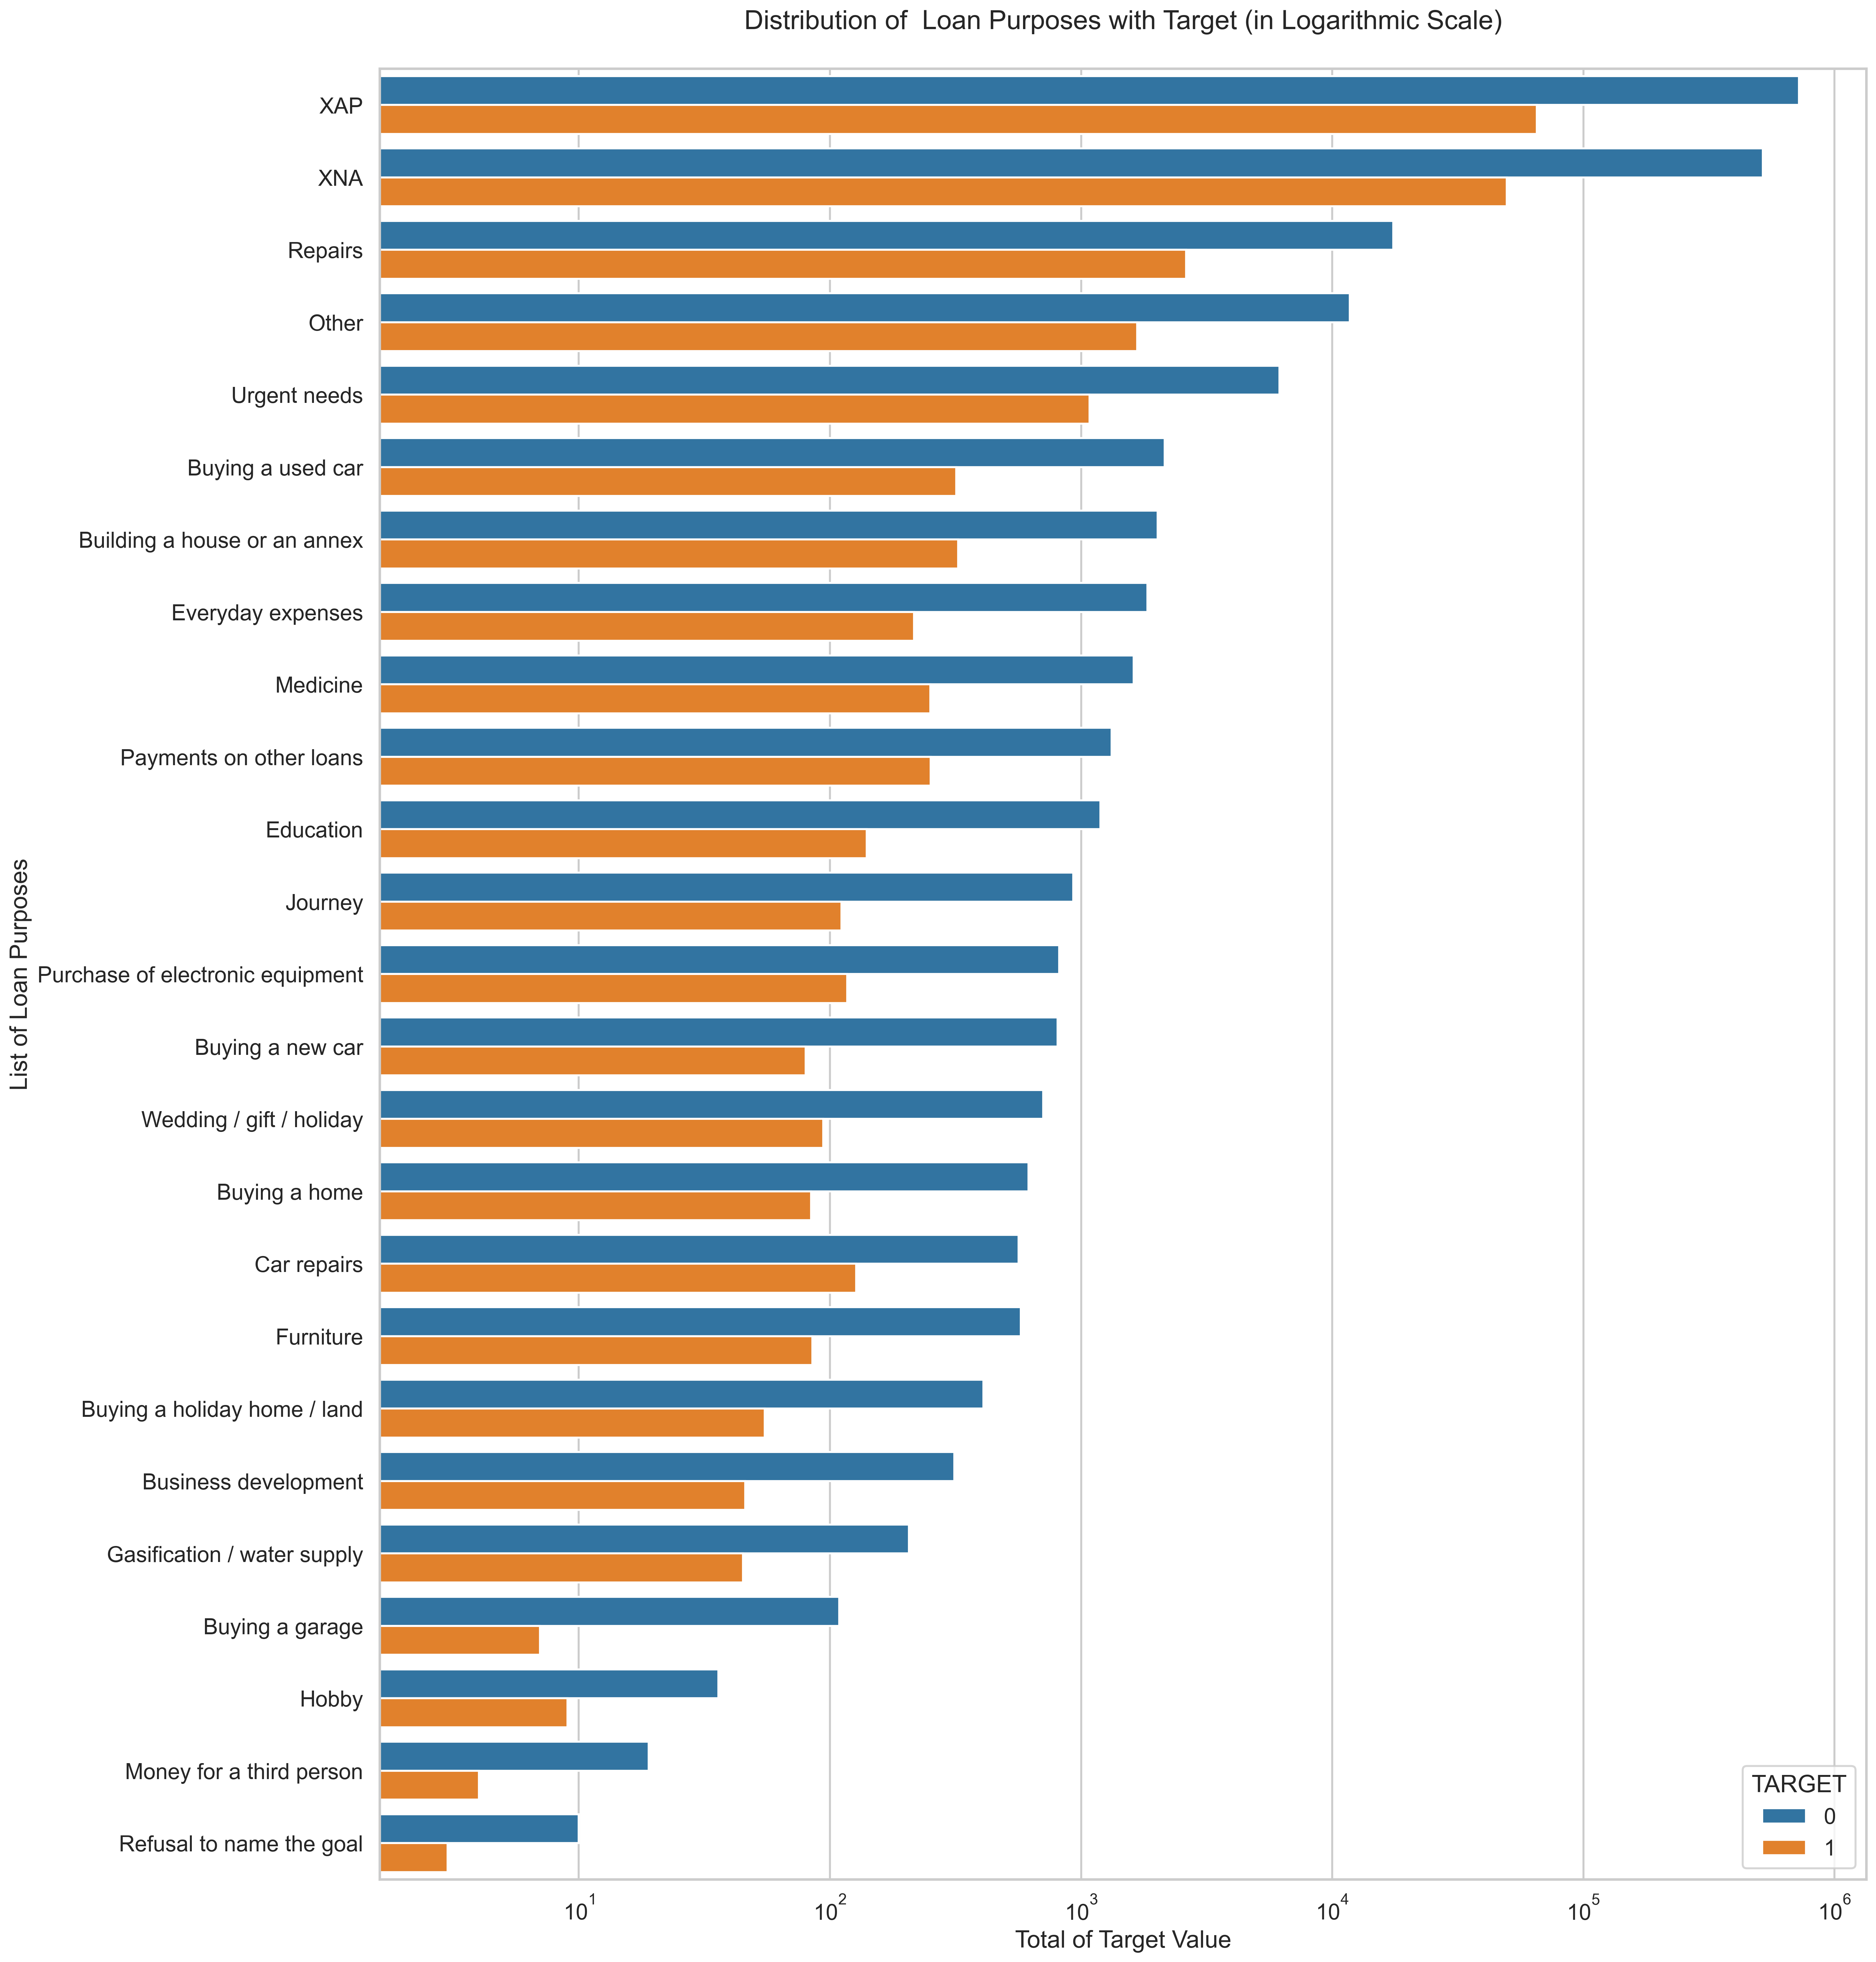

In [144]:
# Distribution of loan purpose with TARGET in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,25),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=0)
plt.xscale('log')
plt.title('Distribution of  Loan Purposes with Target (in Logarithmic Scale)', fontsize=20)
ax = sns.countplot(data = df_EDA, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_EDA['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 
plt.xlabel('Total of Target Value', fontsize=18)
plt.xscale('log')
plt.ylabel('List of Loan Purposes', fontsize=18)
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Distribution of  Loan Purposes with Target.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

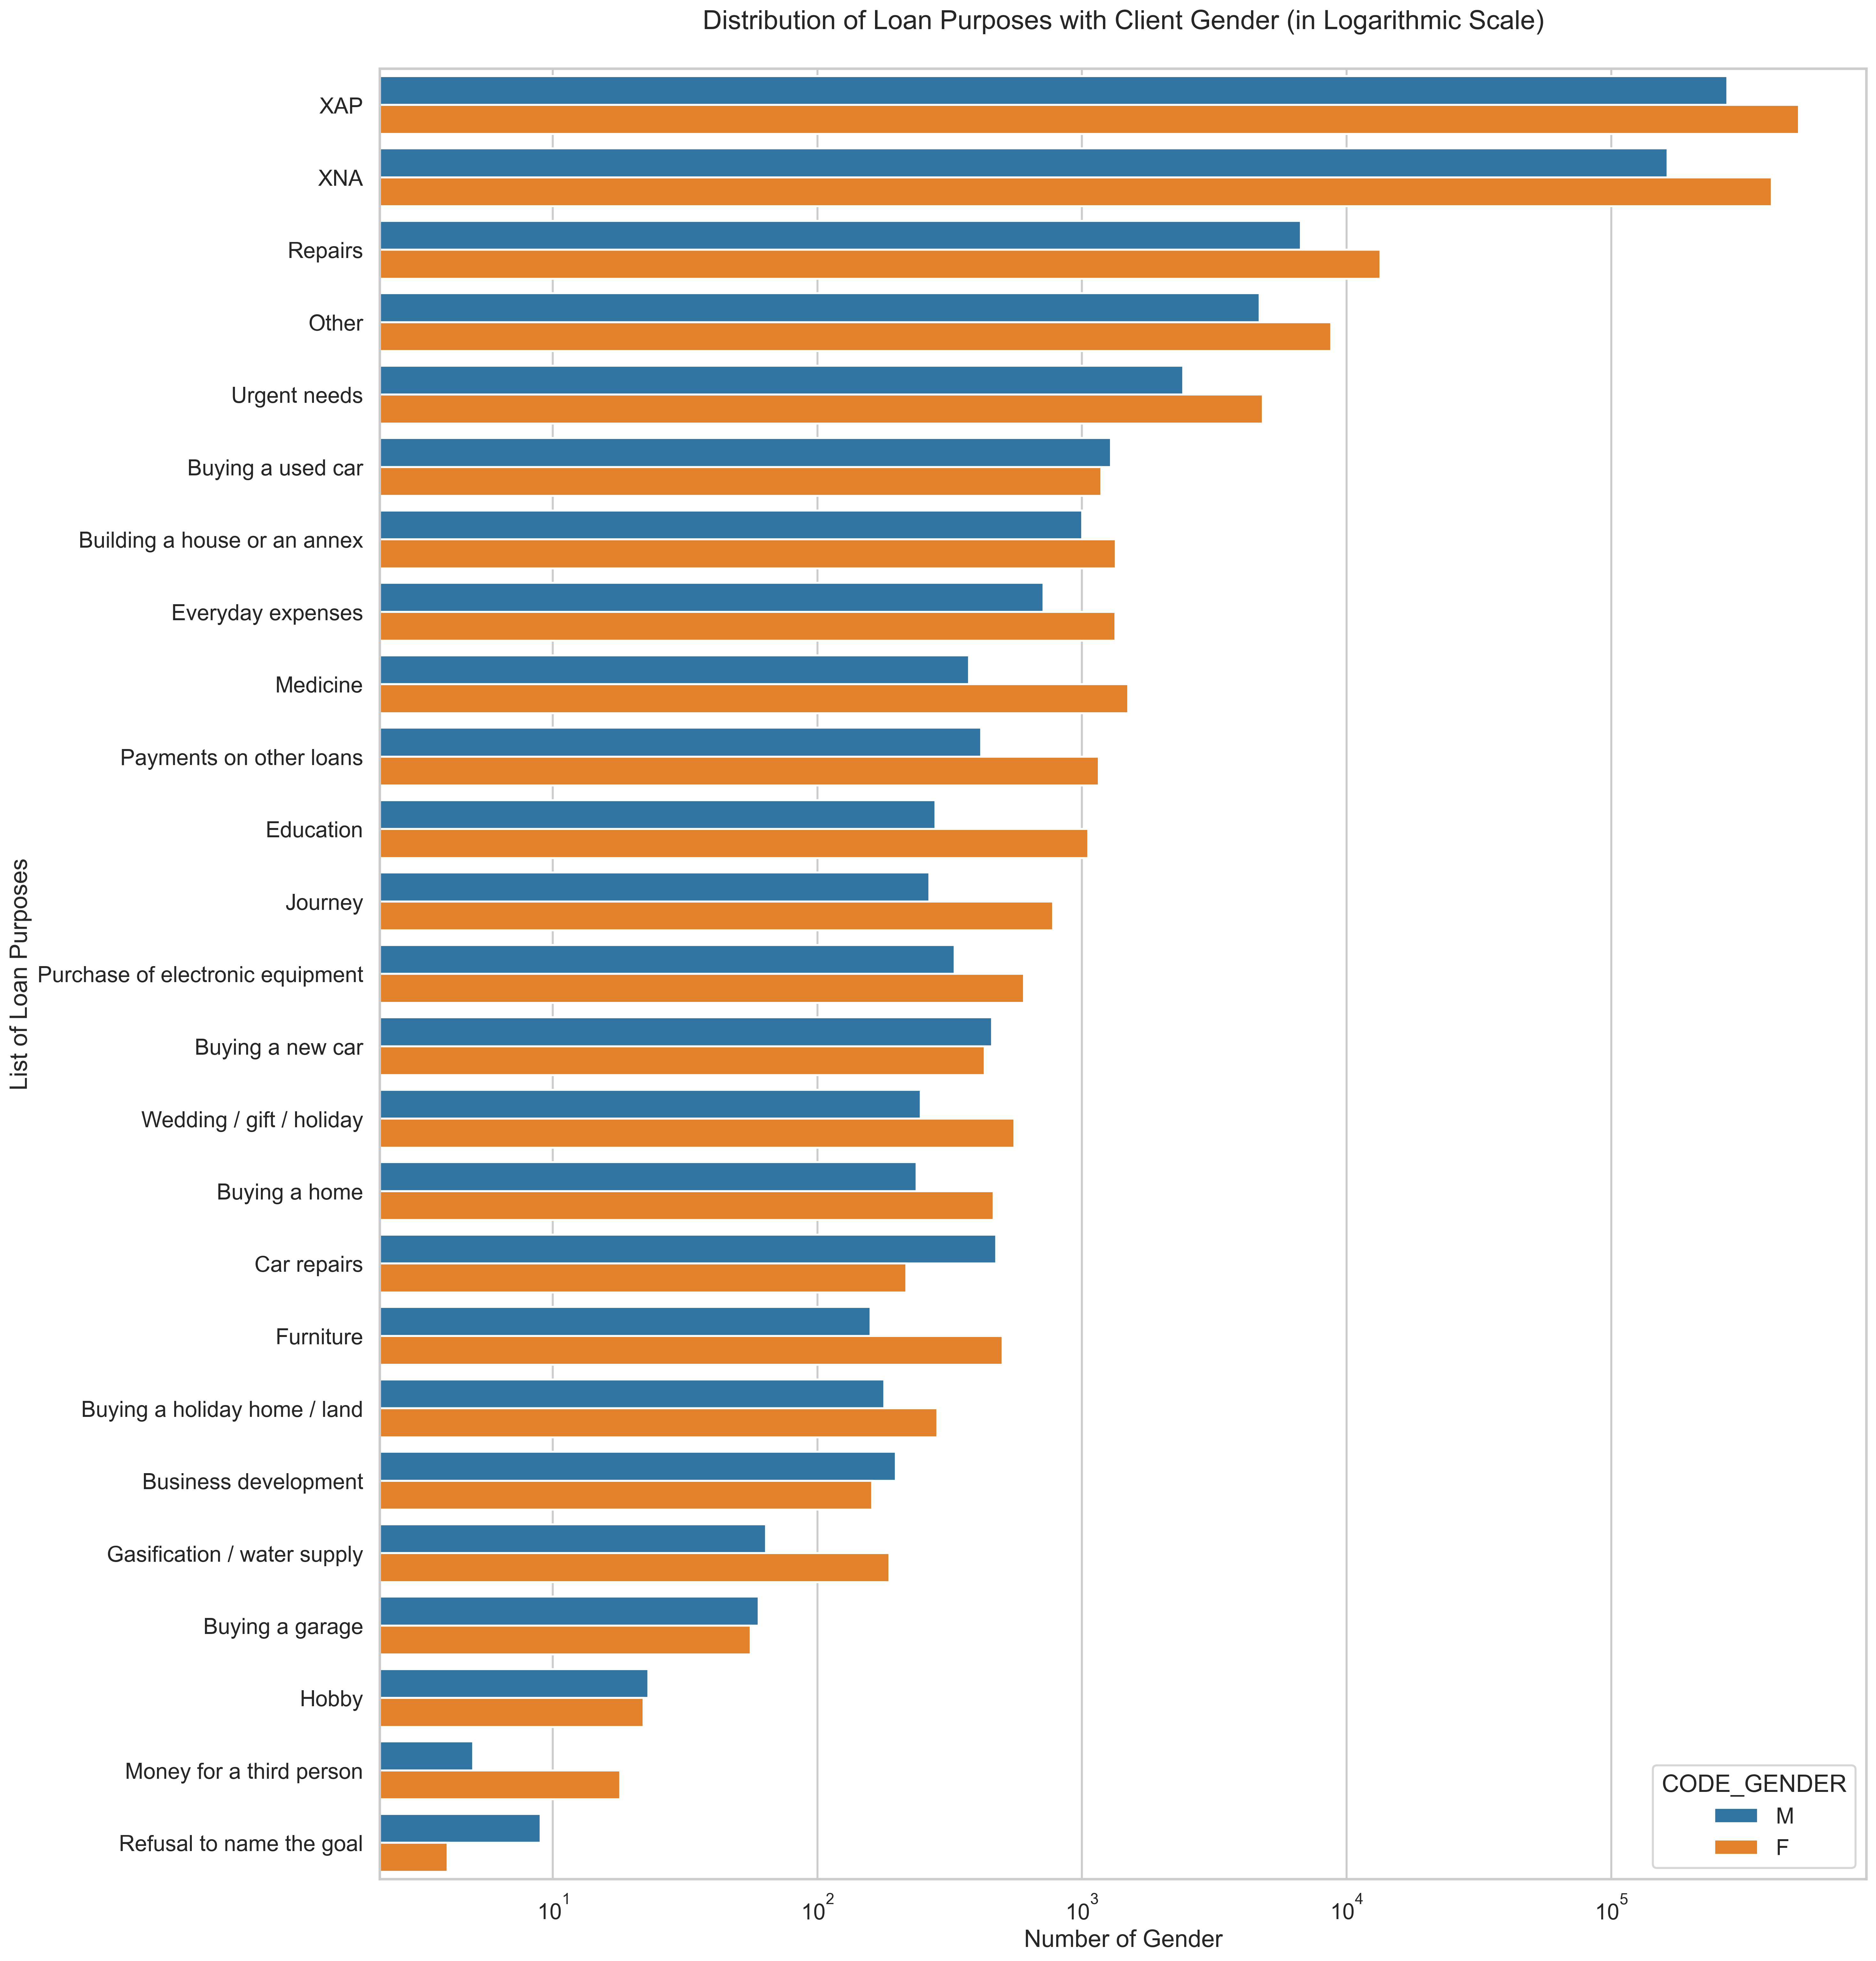

In [145]:
# Distribution of loan purpose with gender in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,25),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=0)
plt.xscale('log')
plt.title('Distribution of Loan Purposes with Client Gender (in Logarithmic Scale)', fontsize=20)
ax = sns.countplot(data = df_EDA, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_EDA['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'CODE_GENDER') 

plt.xlabel('Number of Gender', fontsize=18)
plt.xscale('log')
plt.ylabel('List of Loan Purposes', fontsize=18)
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Distribution of Loan Purposes with Client Gender.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

### Analisis terhadap variabel numerikal

#### Analisis univariat

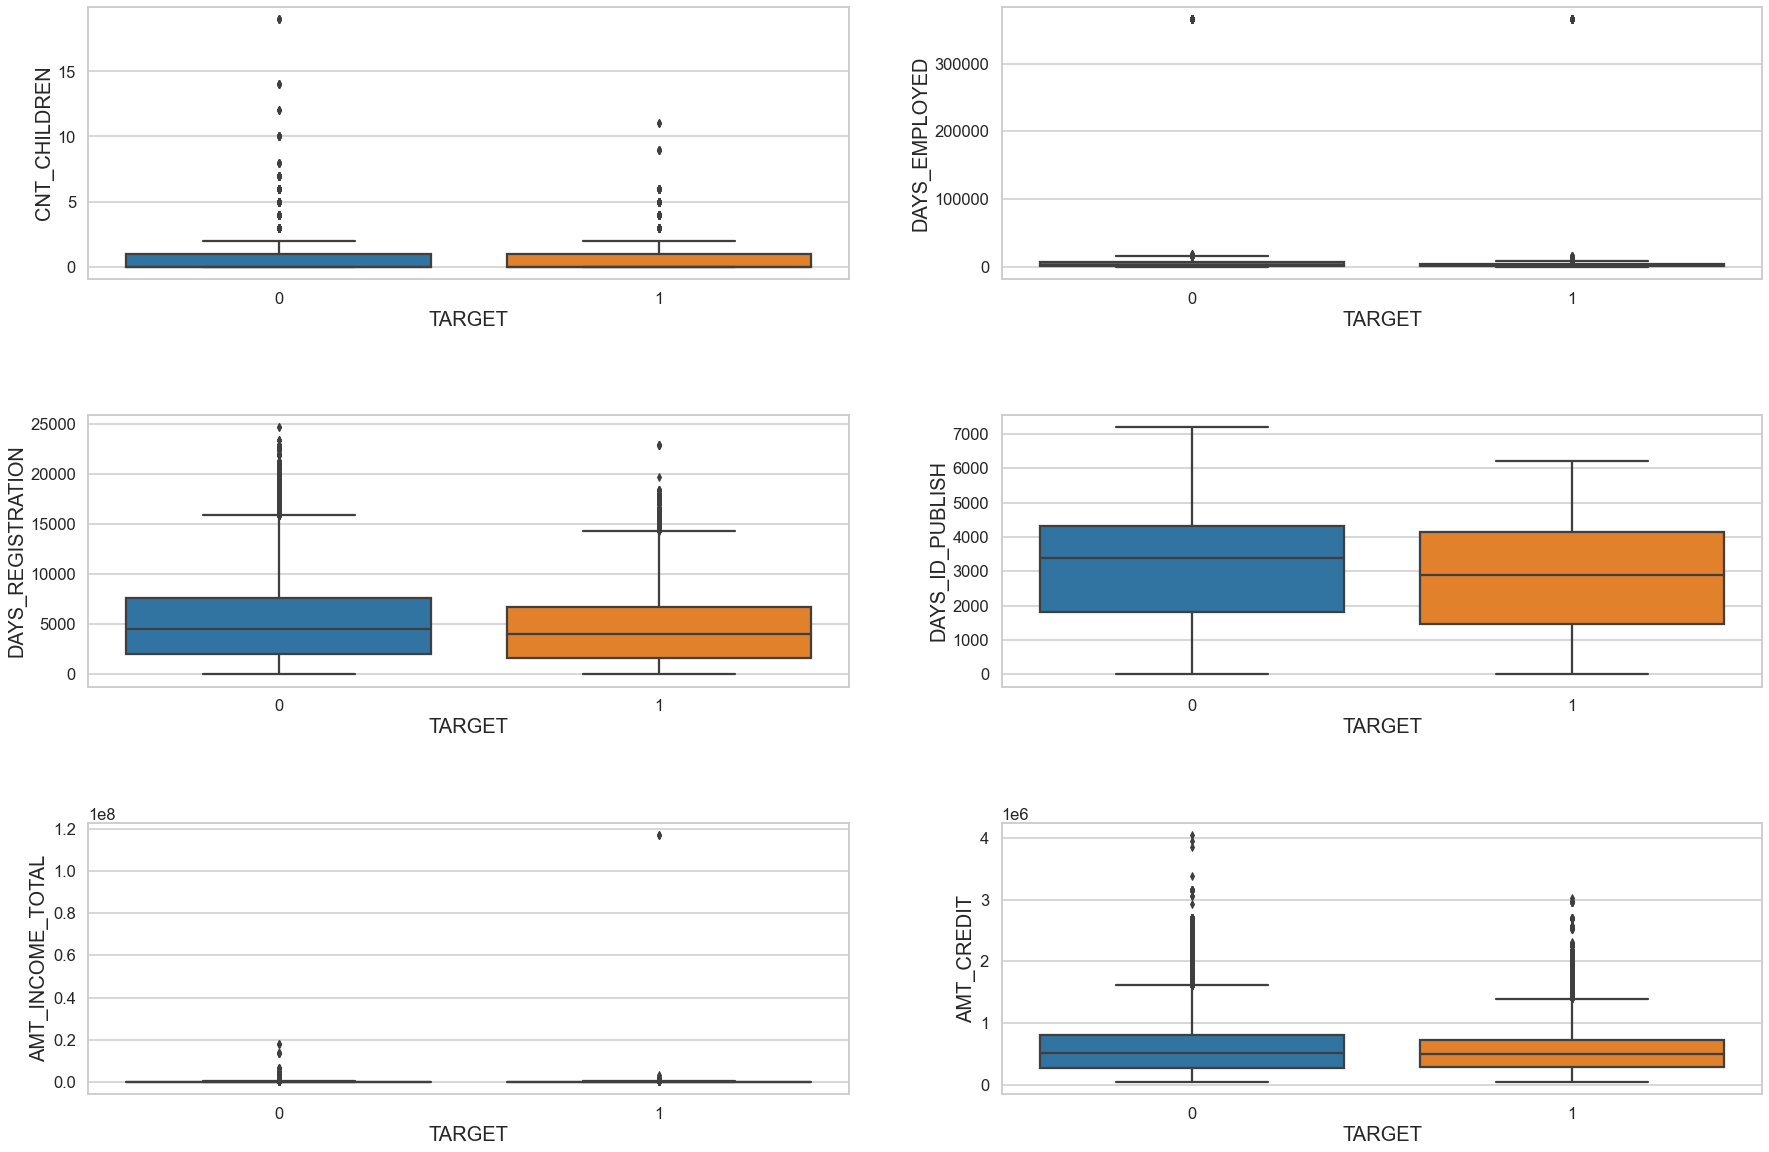

In [146]:
# Univariate Analysis for continuous variable

num_features = ['CNT_CHILDREN', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
plt.figure(figsize = (30, 20))
for i in enumerate(num_features):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = i[1], data = df_EDA)

plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Univariate Analysis for continuous variable.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

#### Analisis bivariat

Pada analisis bivariat terhadap feature numerikal, saya melakukannya dalam 3 bagian:
- Bagian pertama adalah khusus untuk dataset dengan TARGET=0
- Bagian kedua adalah khusus untuk dataset dengan TARGET=1
- Bagian ketiga adalah untuk dataset normal (semua nilai TARGET ada)

##### Analisis bivariat untuk dataset dengan nilai TARGET=0

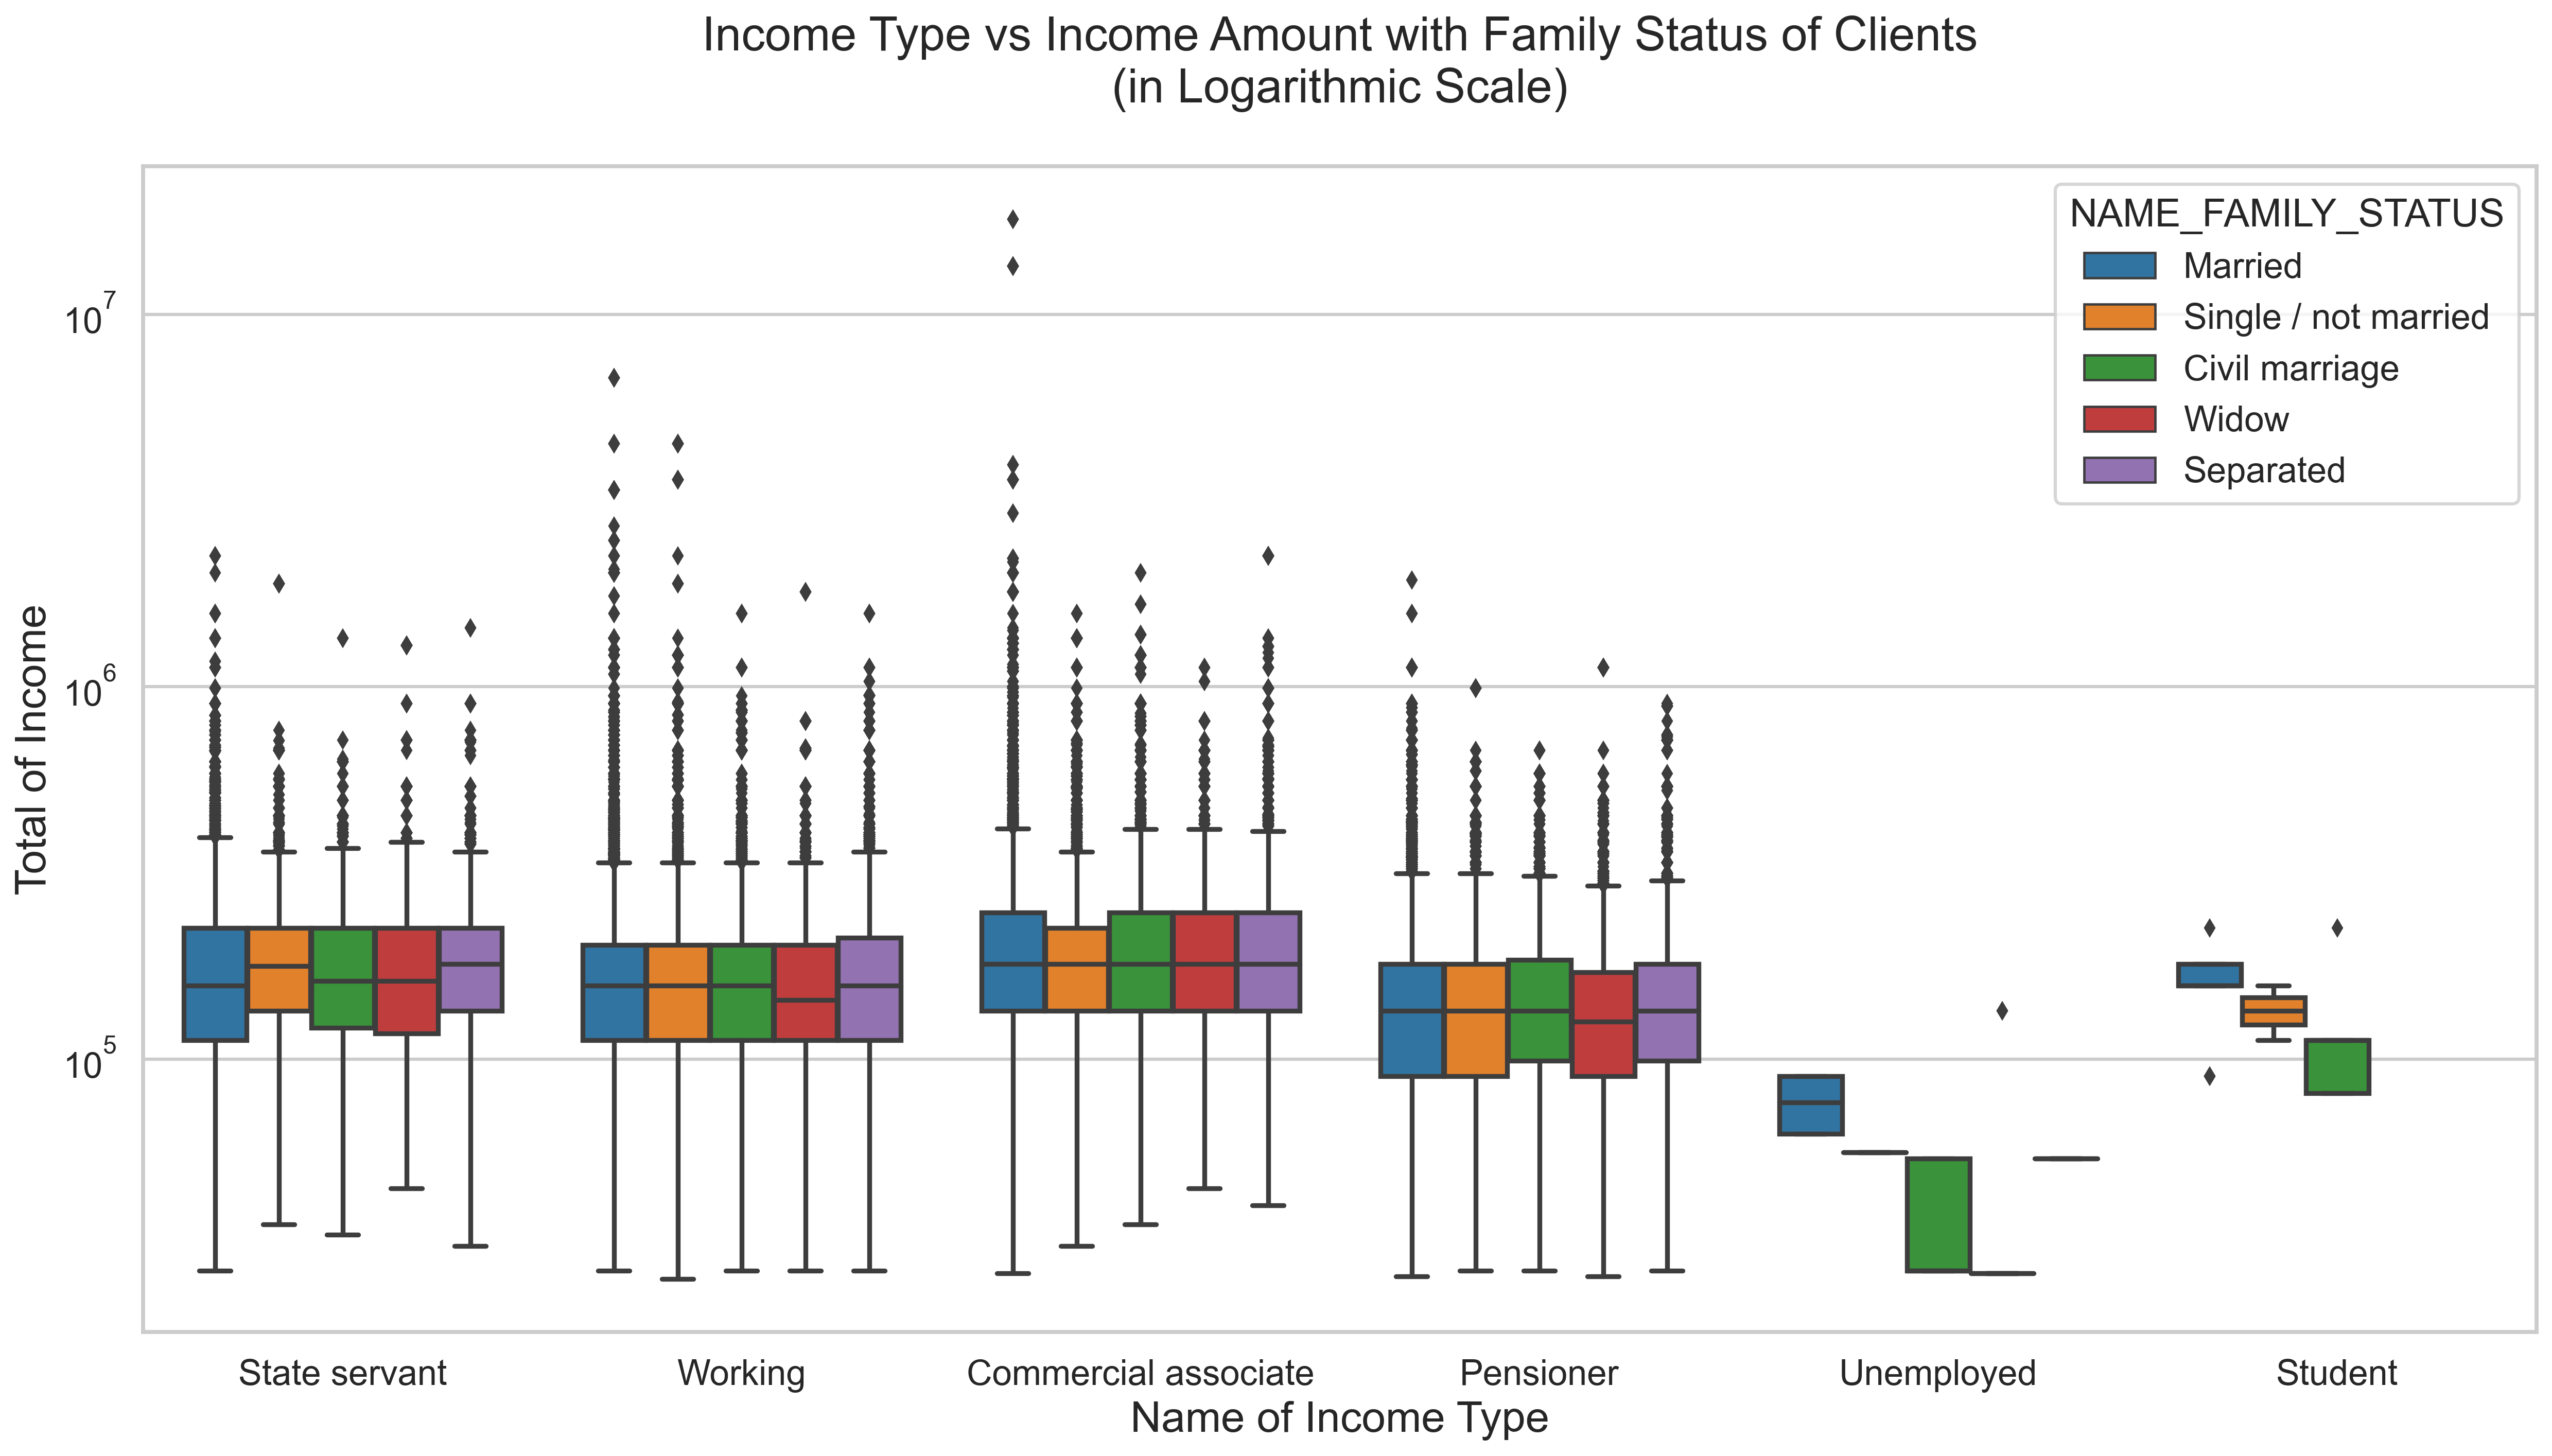

In [155]:
# Box plotting for income type vs income amount with family status in logarithmic scale

plt.figure(figsize=(20,10),dpi = 300)
plt.xticks(rotation=0)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_INCOME_TYPE', hue='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',orient='v')
plt.title('Income Type vs Income Amount with Family Status of Clients\n(in Logarithmic Scale)')
plt.xlabel('Name of Income Type')
plt.ylabel('Total of Income')
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/T0_Income Type vs Income Amount.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

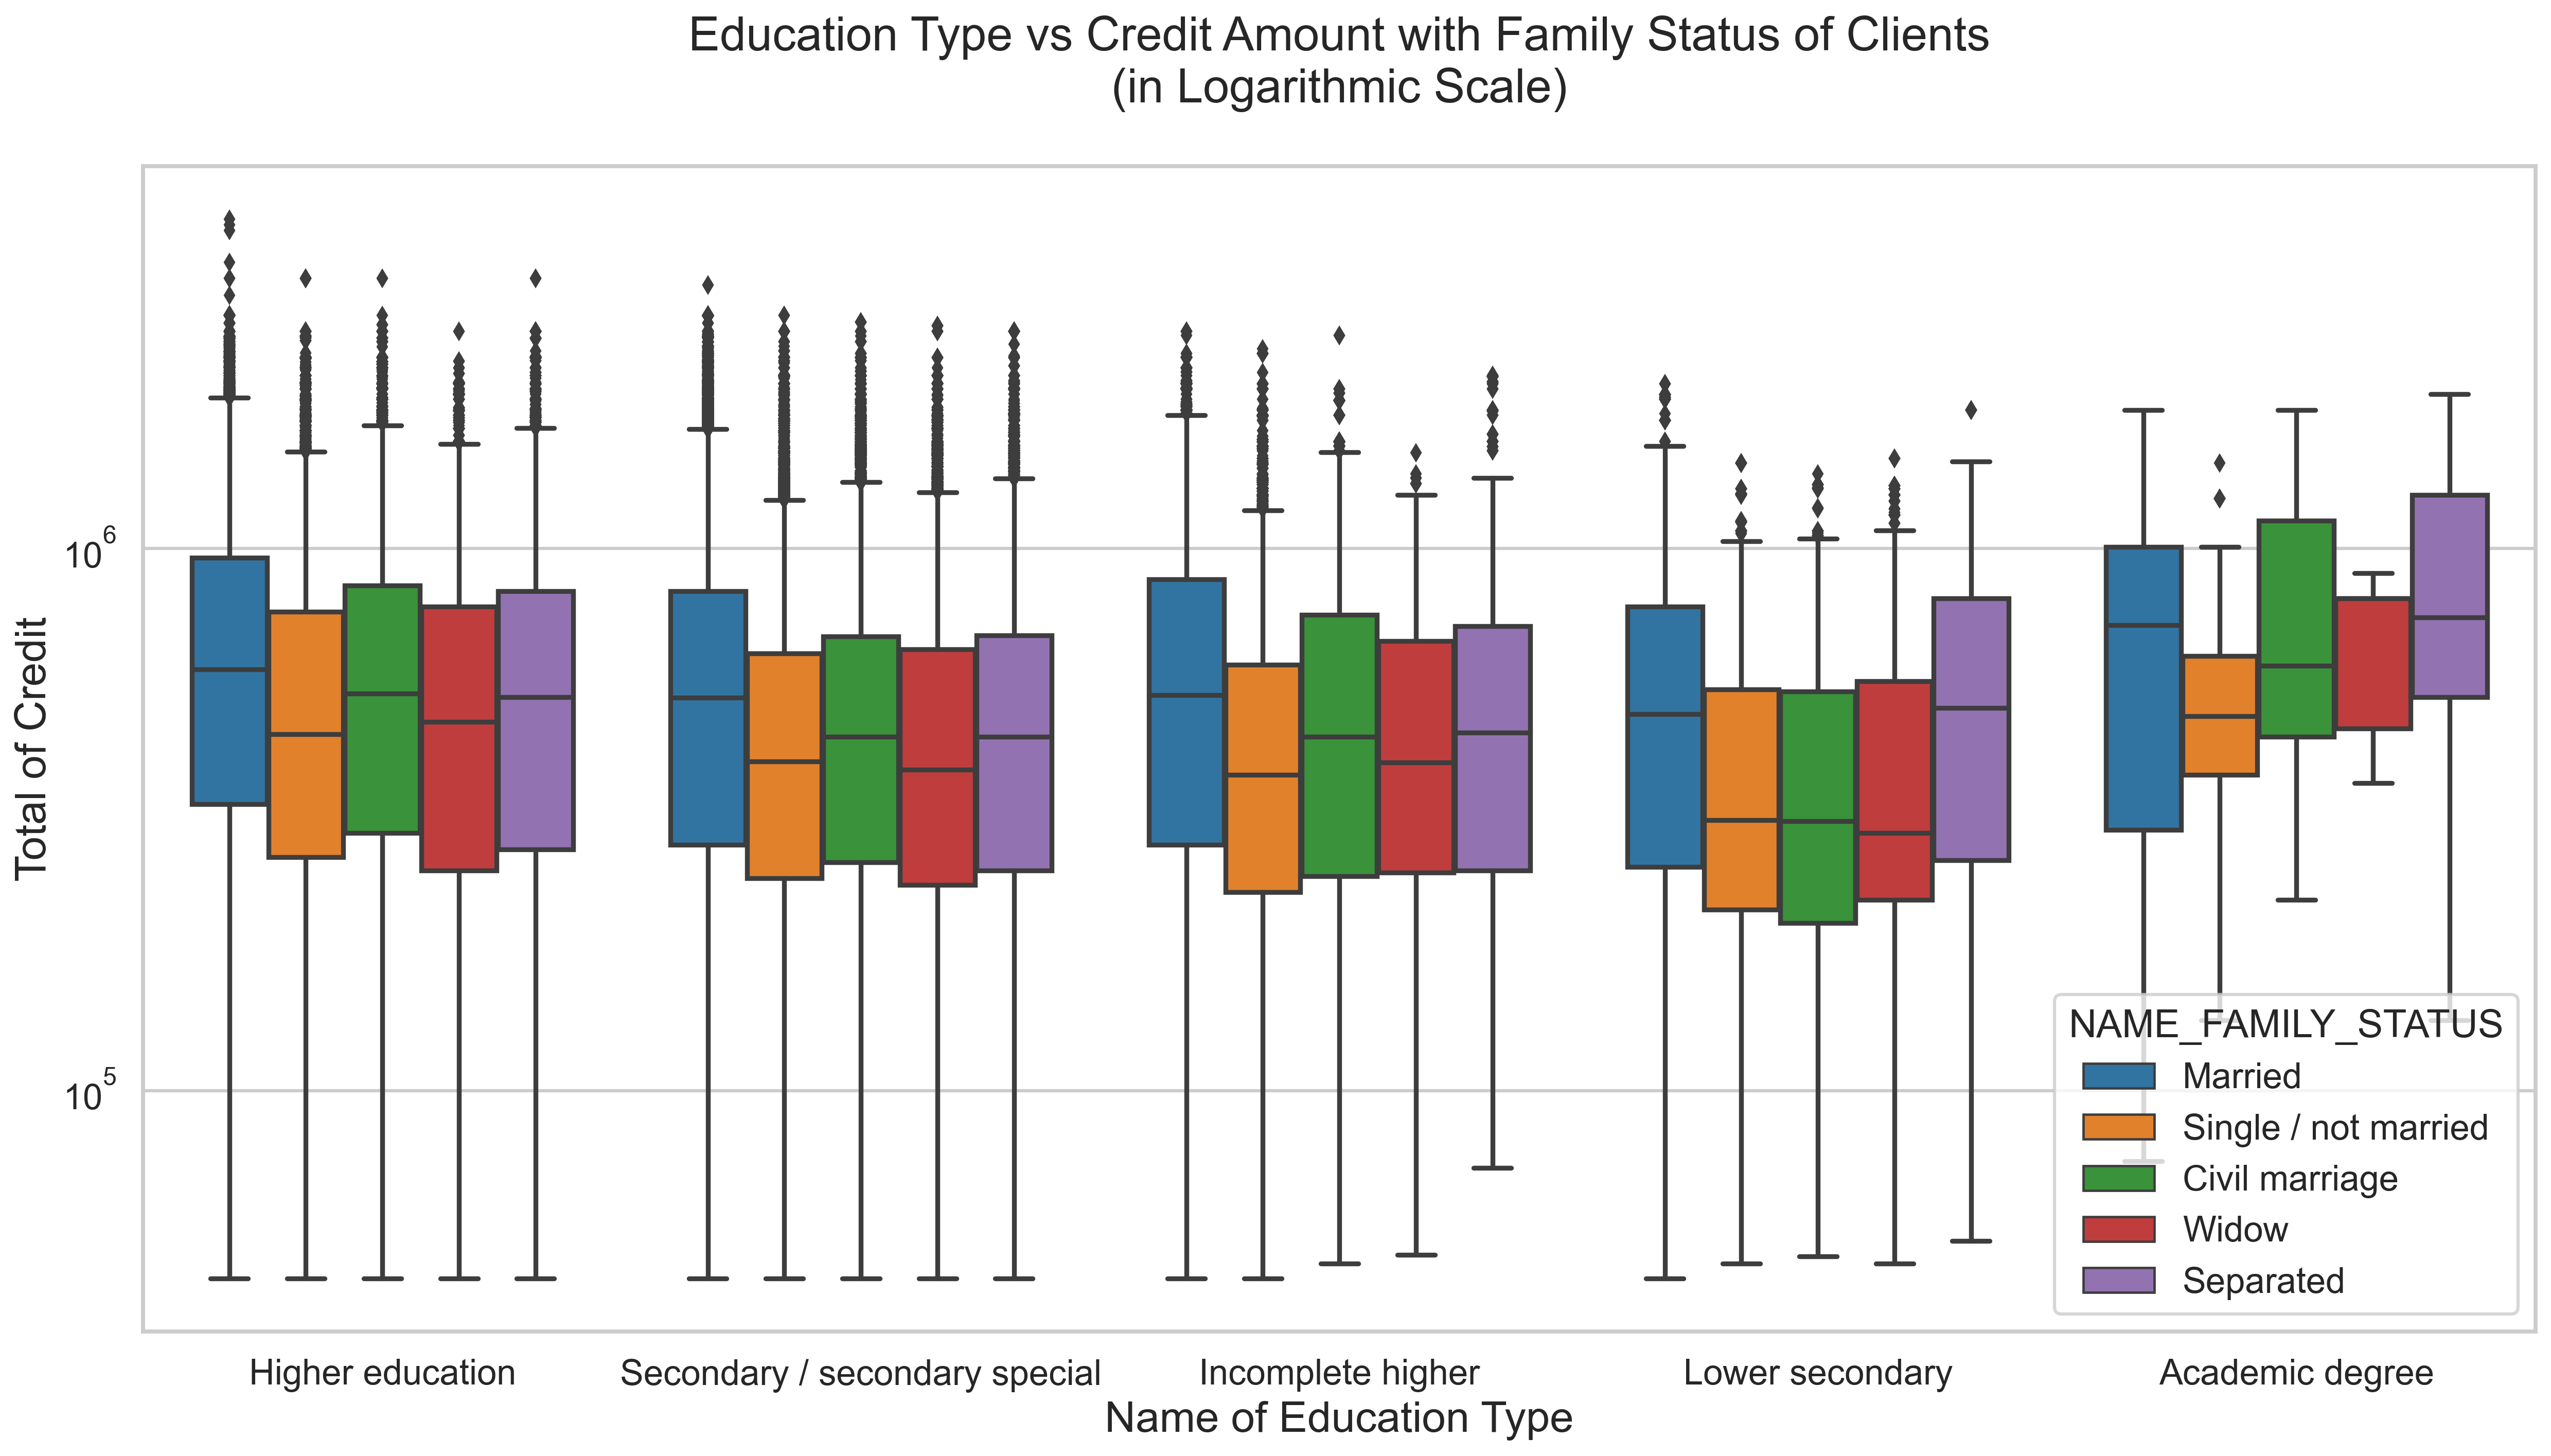

In [156]:
# Box plotting for education type vs credit amount with family status in logarithmic scale

plt.figure(figsize=(20,10),dpi = 300)
plt.xticks(rotation=0)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE', hue='NAME_FAMILY_STATUS',y='AMT_CREDIT',orient='v')
plt.title('Education Type vs Credit Amount with Family Status of Clients\n(in Logarithmic Scale)')
plt.xlabel('Name of Education Type')
plt.ylabel('Total of Credit')
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/T0_Education Type vs Credit Amount.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')

plt.show()

##### Analisis bivariat untuk dataset dengan nilai TARGET=1

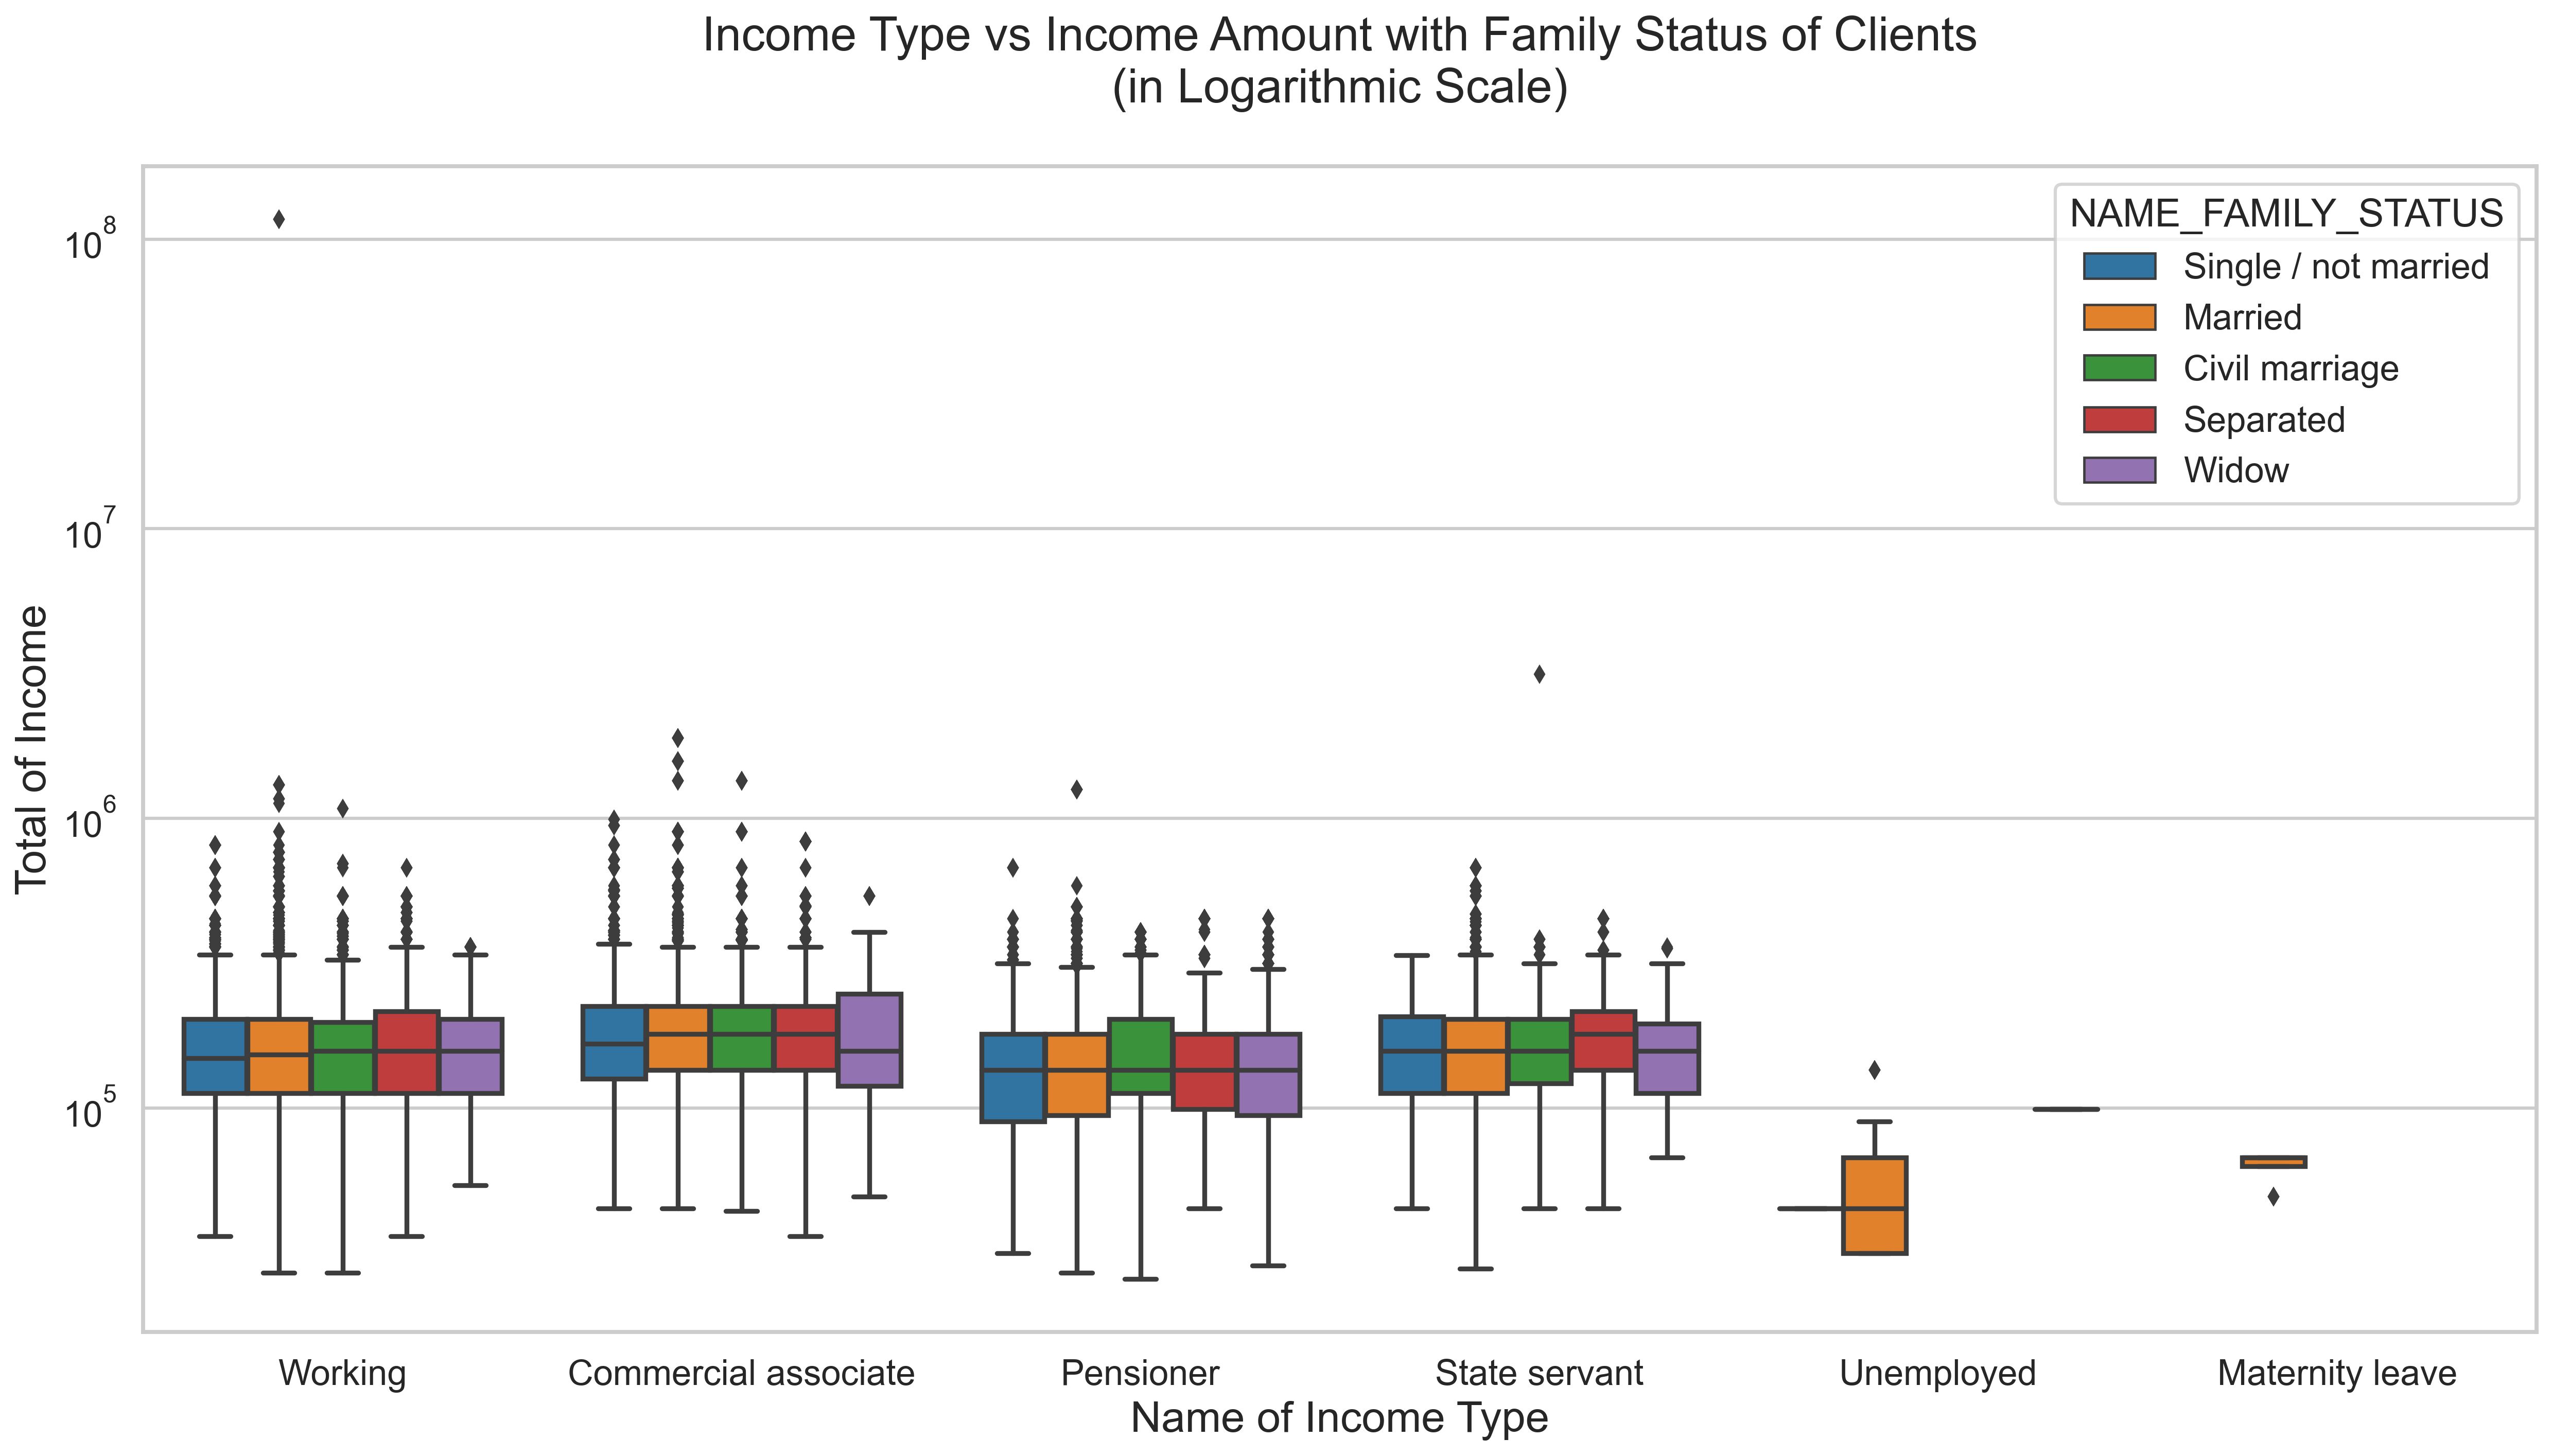

In [157]:
# Box plotting for income type vs income amount with family status in logarithmic scale

plt.figure(figsize=(20,10),dpi = 300)
plt.xticks(rotation=0)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_INCOME_TYPE', hue='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',orient='v')
plt.title('Income Type vs Income Amount with Family Status of Clients\n(in Logarithmic Scale)')
plt.xlabel('Name of Income Type')
plt.ylabel('Total of Income')
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/T1_Income Type vs Income Amount.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

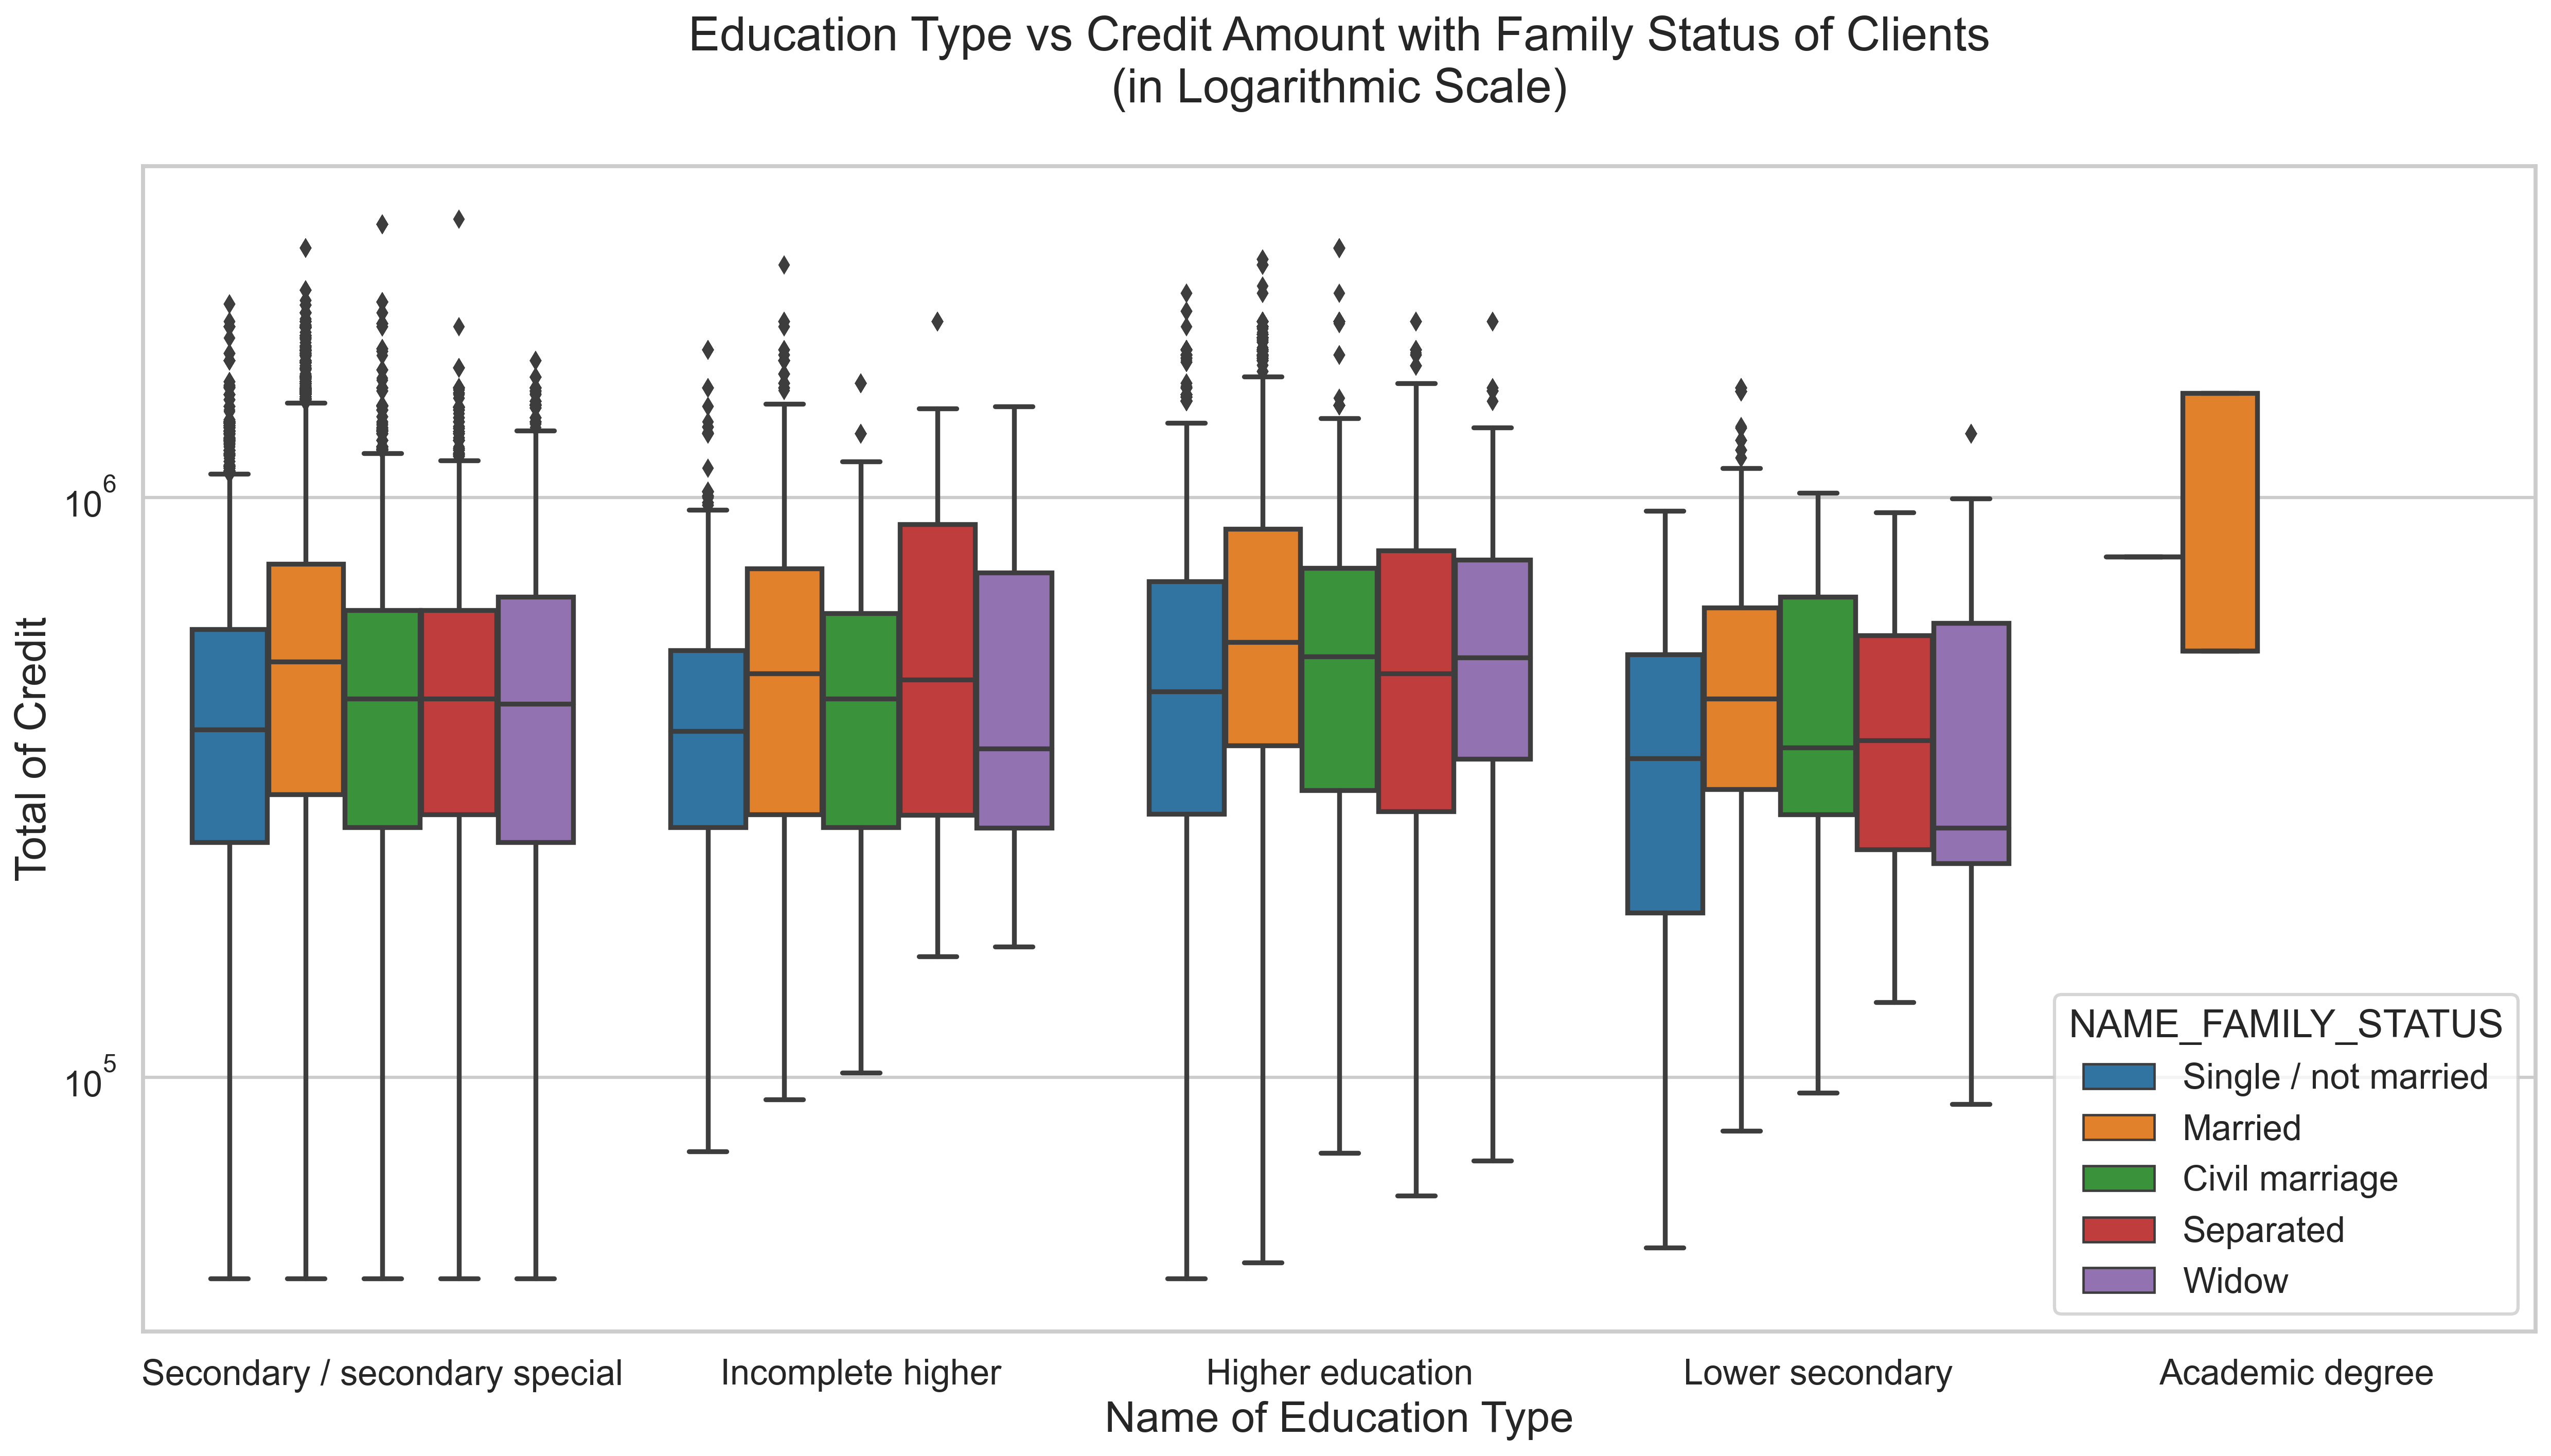

In [158]:
# Box plotting for education type vs credit amount with family status in logarithmic scale

plt.figure(figsize=(20,10),dpi = 300)
plt.xticks(rotation=0)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE', hue='NAME_FAMILY_STATUS',y='AMT_CREDIT',orient='v')
plt.title('Education Type vs Credit Amount with Family Status of Clients\n(in Logarithmic Scale)')
plt.xlabel('Name of Education Type')
plt.ylabel('Total of Credit')
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/T1_Education Type vs Credit Amount.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')

plt.show()

##### Analisis bivariat untuk dataset dengan kedua nilai TARGET

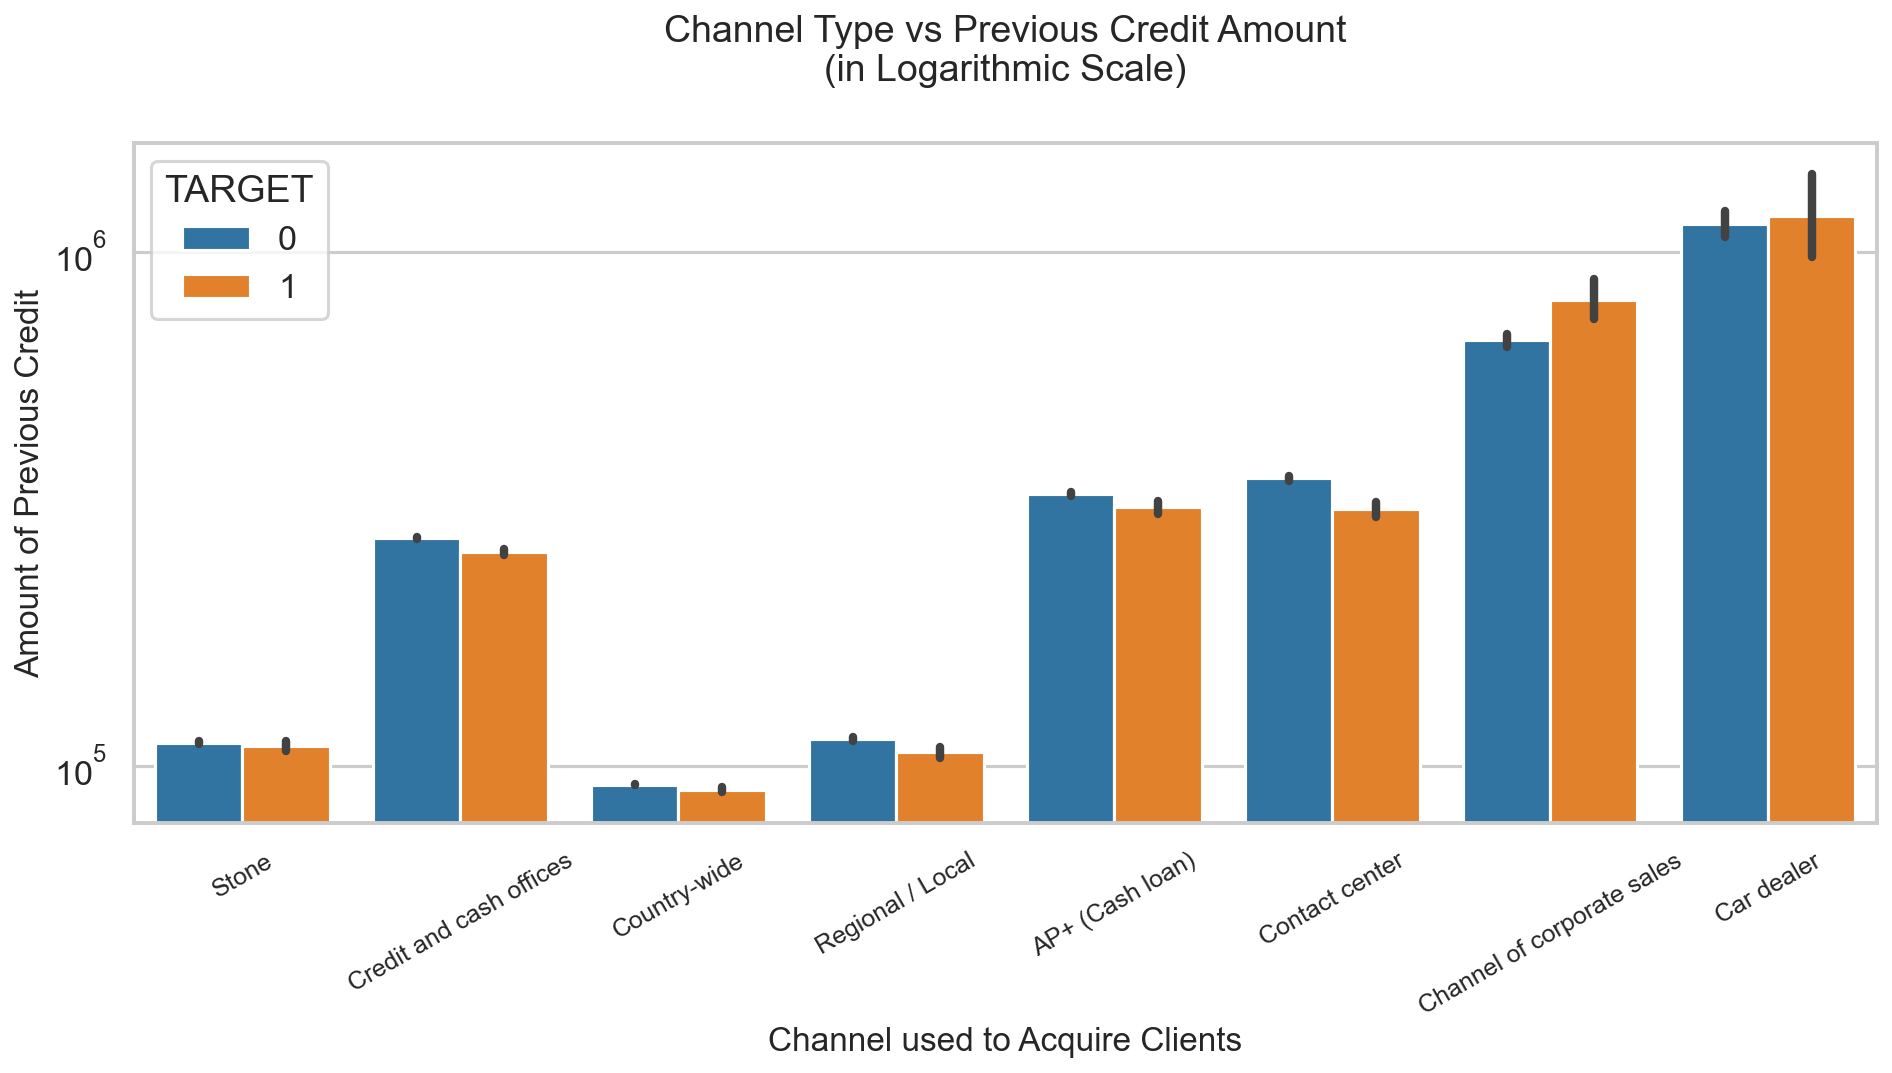

In [165]:
# Box plotting for previous credit amount vs channel type in logarithmic scale

plt.figure(figsize=(15,6),dpi = 150)
plt.xticks(rotation=30, fontsize=12)
sns.barplot(data =df_EDA, y='AMT_CREDIT_PREV',hue='TARGET',x='CHANNEL_TYPE')
plt.title('Channel Type vs Previous Credit Amount\n(in Logarithmic Scale)', fontsize=18)
plt.xlabel('Channel used to Acquire Clients', fontsize=16)
plt.ylabel('Amount of Previous Credit', fontsize=16)
plt.yscale('log')
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Channel Type vs Previous Credit.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

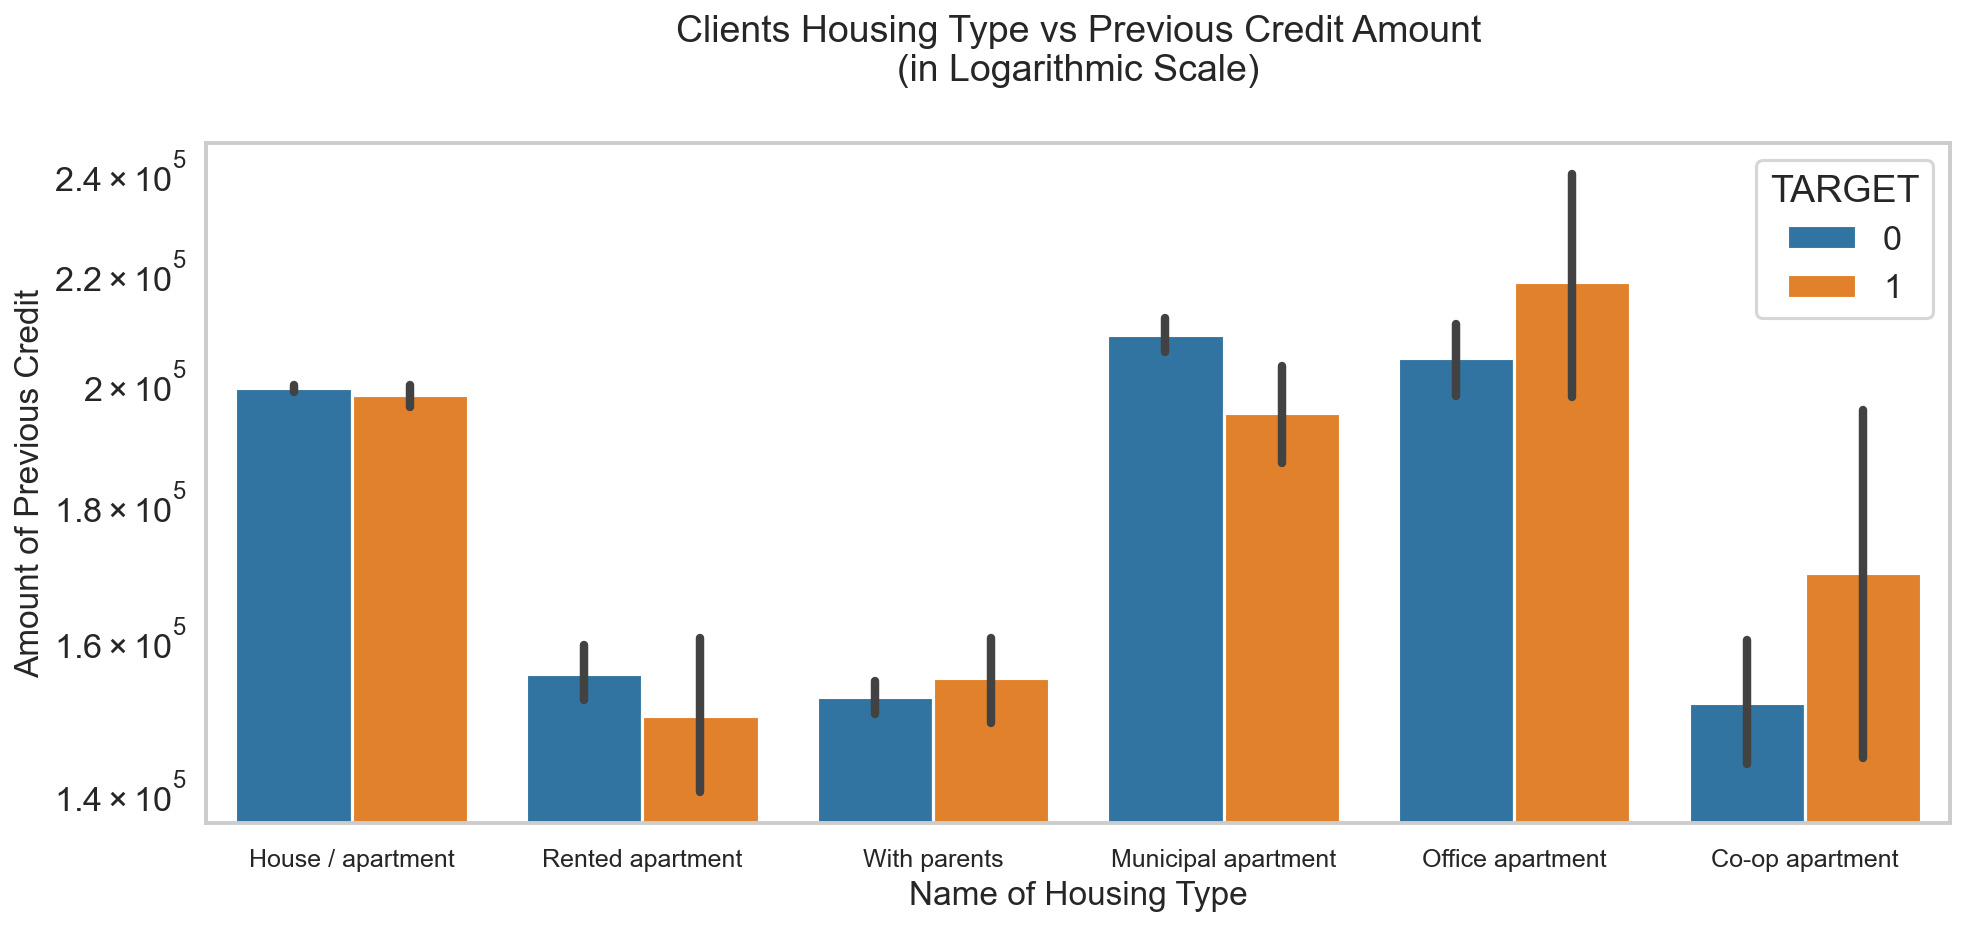

In [168]:
# Box plotting for Credit amount prev vs channel type in logarithmic scale

plt.figure(figsize=(15,6),dpi = 150)
plt.xticks(rotation=0, fontsize=12)
sns.barplot(data =df_EDA, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Clients Housing Type vs Previous Credit Amount\n(in Logarithmic Scale)', fontsize=18)
plt.xlabel('Name of Housing Type', fontsize=16)
plt.ylabel('Amount of Previous Credit', fontsize=16)
plt.yscale('log')
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Housing Type vs Previous Credit Amount.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

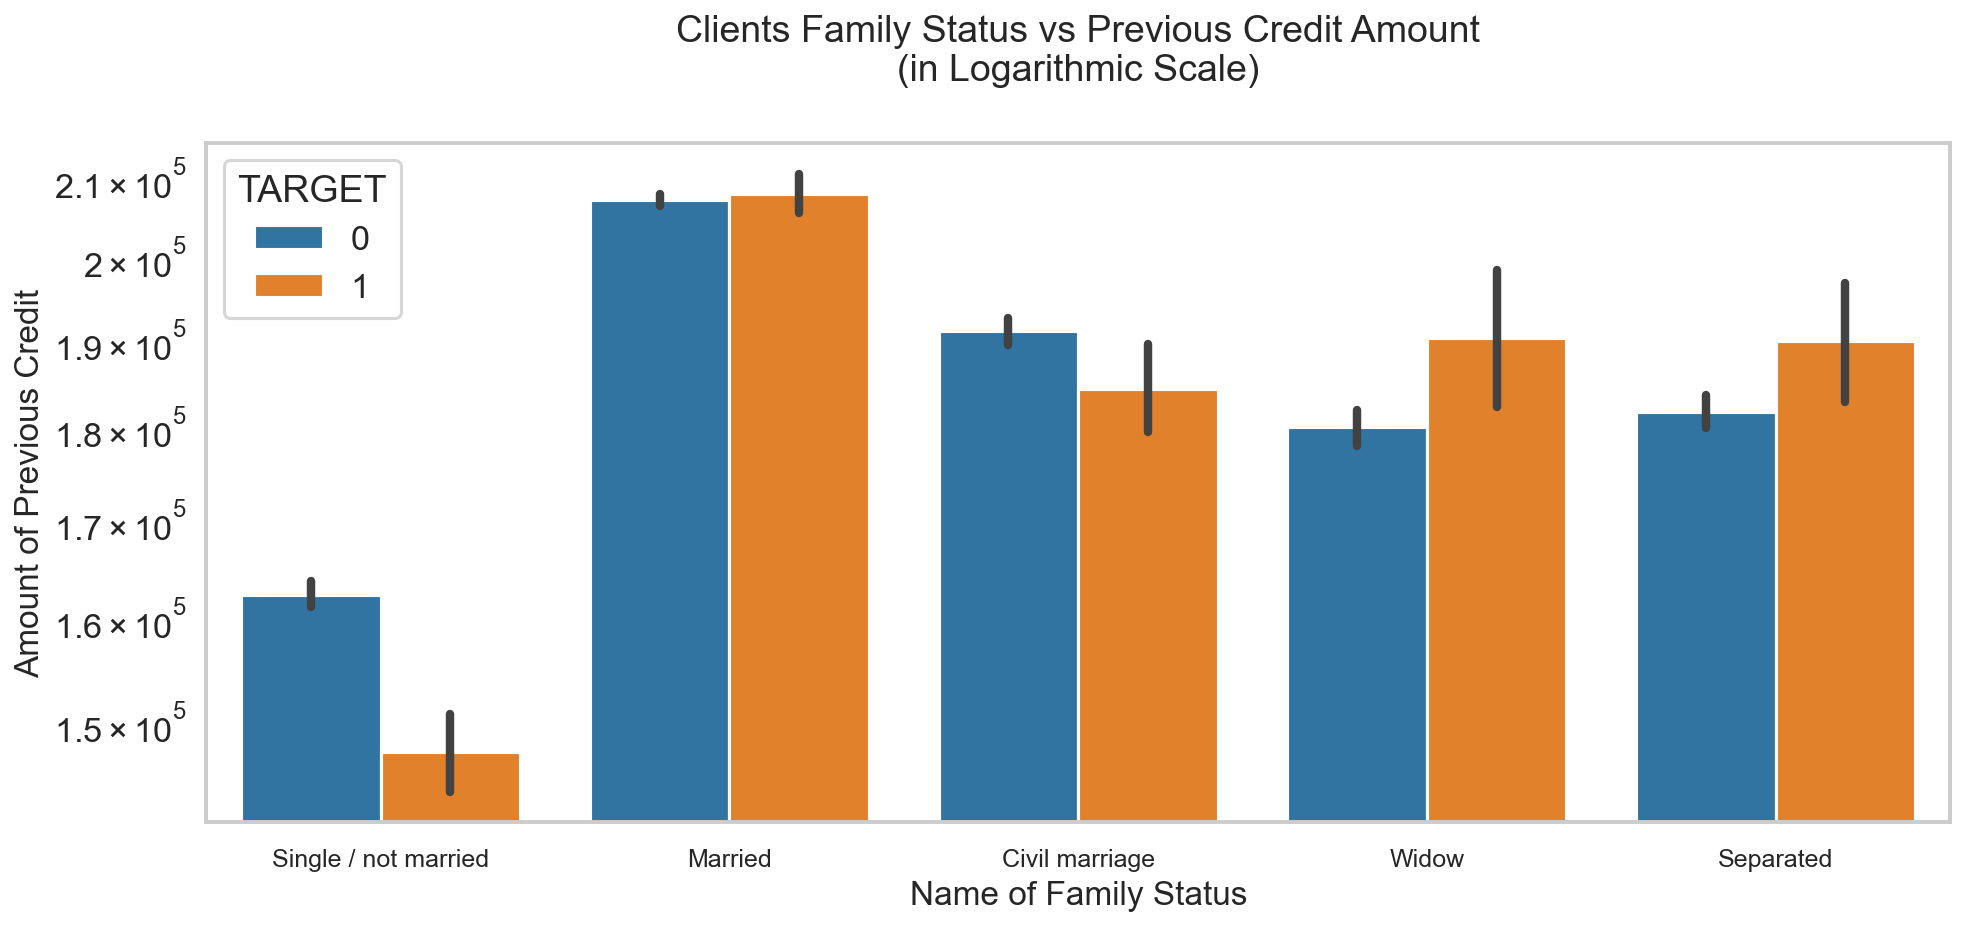

In [318]:
# Box plotting for Credit amount prev vs channel type in logarithmic scale

plt.figure(figsize=(15,6),dpi = 150)
plt.xticks(rotation=0, fontsize=12)
sns.barplot(data =df_EDA, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_FAMILY_STATUS')
plt.title('Clients Family Status vs Previous Credit Amount\n(in Logarithmic Scale)', fontsize=18)
plt.xlabel('Name of Family Status', fontsize=16)
plt.ylabel('Amount of Previous Credit', fontsize=16)
plt.yscale('log')
plt.savefig("A:/BERKAS KERJA/RAKAMIN VIRTUAL INTERNSHIP - DATA SCIENTIST HOME CREDIT/WEEK 4/Clients Family Status vs Previous Credit.png", facecolor ='white', 
            dpi=300, bbox_inches='tight')
plt.show()

# Tahap Pengembangan Model Prediksi

## Rekayasa Feature

Pada tahap rekayasa feature (feature engineering) saya akan melakukan serangkaian aktivitas yang terdiri dari pembuatan feature baru dari feature yang sudah ada (bila diperlukan), menghapus feature yang tak akan saya pakain, dan mengubah data menjadi format yang dapat dibaca oleh model Machine Learning, serta melakukan rescaling.

### Menghapus fitur yang tidak diperlukan untuk permodelan

In [184]:
df_model = df_EDA.copy()

In [185]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413700 entries, 256513 to 1670212
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   SK_ID_CURR               1413700 non-null  int64  
 1   NAME_CONTRACT_TYPE       1413700 non-null  object 
 2   CODE_GENDER              1413700 non-null  object 
 3   FLAG_OWN_CAR             1413700 non-null  object 
 4   FLAG_OWN_REALTY          1413700 non-null  object 
 5   CNT_CHILDREN             1413700 non-null  int64  
 6   AMT_INCOME_TOTAL         1413700 non-null  float64
 7   AMT_CREDIT               1413700 non-null  float64
 8   NAME_INCOME_TYPE         1413700 non-null  object 
 9   NAME_EDUCATION_TYPE      1413700 non-null  object 
 10  NAME_FAMILY_STATUS       1413700 non-null  object 
 11  NAME_HOUSING_TYPE        1413700 non-null  object 
 12  DAYS_EMPLOYED            1413700 non-null  int64  
 13  DAYS_REGISTRATION        1413700 non-

Adapun kolom SK_ID_CURR dan SK_ID_PREV hanyalah berisi informasi identitas biasa yang tidak memiliki pengaruh apa pun. Oleh karena itu, saya menghapus kolom tersebut.

In [186]:
unused_cols = ['SK_ID_CURR', 'SK_ID_PREV']
df_model.drop(unused_cols, axis=1, inplace=True)

In [187]:
df_model.isnull().sum()

NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_EMPLOYED              0
DAYS_REGISTRATION          0
DAYS_ID_PUBLISH            0
OCCUPATION_TYPE            0
REGION_RATING_CLIENT       0
TARGET                     0
AGE                        0
AGE_SEGMENT                0
AMT_INCOME_RANGE           0
AMT_CREDIT_RANGE           0
NAME_CONTRACT_TYPE_PREV    0
AMT_CREDIT_PREV            0
NAME_CASH_LOAN_PURPOSE     0
NAME_CONTRACT_STATUS       0
CHANNEL_TYPE               0
AMT_CREDIT_RANGE_PREV      0
dtype: int64

### Membuat feature baru berdasarkan feature yang sudah ada

Saya menganggap bahwa masih ada satu feature lagi yang bisa dibuat, yakni rasio antara total pendapatan klien dengan total kredit yang aktif.

In [188]:
df_model['CRED_INC_RATIO'] = df_model['AMT_CREDIT']/df_model['AMT_INCOME_TOTAL']

In [190]:
df_model.head(3)

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
256513         Cash loans           M            N               Y   
256514         Cash loans           F            N               N   
256515         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT NAME_INCOME_TYPE  \
256513             0       202500.0000  406597.5000          Working   
256514             0       270000.0000 1293502.5000    State servant   
256515             0       270000.0000 1293502.5000    State servant   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
256513  Secondary / secondary special  Single / not married   
256514               Higher education               Married   
256515               Higher education               Married   

        NAME_HOUSING_TYPE  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
256513  House / apartment            637               3648             2120   
256514  House / apartment           1188               1186              291   
256515  House / apartment           1188               1186              291   

       OCCUPATION_TYPE  REGION_RATING_CLIENT  TARGET  AGE AGE_SEGMENT  \
256513        Laborers                     2       1   25      Twenty   
256514      Core staff                     1       0   45      Fourty   
256515      Core staff                     1       0   45      Fourty   

       AMT_INCOME_RANGE  AMT_CREDIT_RANGE NAME_CONTRACT_TYPE_PREV  \
256513    200000-300000     400000-500000          Consumer loans   
256514    200000-300000  900000 and above              Cash loans   
256515    200000-300000  900000 and above          Consumer loans   

        AMT_CREDIT_PREV NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
256513      179055.0000                    XAP             Approved   
256514     1035882.0000                    XNA             Approved   
256515      348637.5000                    XAP             Approved   

                   CHANNEL_TYPE AMT_CREDIT_RANGE_PREV  CRED_INC_RATIO  
256513                    Stone         100000-200000          2.0079  
256514  Credit and cash offices      900000 and above          4.7908  
256515                    Stone         300000-400000          4.7908

### Encoding data

In [216]:
df_model_cleaned = df_model.copy()

for column in df_model_cleaned.columns:
    if df_model_cleaned[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    df_model_cleaned[column] = LabelEncoder().fit_transform(df_model_cleaned[column])
print(df_model_cleaned.describe())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11944\3649577733.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_model_cleaned[column].dtype == np.number: continue


       NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count        1413700.0000 1413700.0000  1413700.0000     1413700.0000   
mean               0.0754       0.3243        0.3371           0.7244   
std                0.2640       0.4681        0.4727           0.4468   
min                0.0000       0.0000        0.0000           0.0000   
25%                0.0000       0.0000        0.0000           0.0000   
50%                0.0000       0.0000        0.0000           1.0000   
75%                0.0000       1.0000        1.0000           1.0000   
max                1.0000       1.0000        1.0000           1.0000   

       CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  NAME_INCOME_TYPE  \
count  1413700.0000      1413700.0000 1413700.0000      1413700.0000   
mean         0.4049       173316.1027  587553.7085            3.6610   
std          0.7166       198573.4299  384917.4652            2.5325   
min          0.0000        25650.0000   45000.0000    

In [217]:
df_model_cleaned.head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
256513                   0            1             0                1   
256514                   0            0             0                0   
256515                   0            0             0                0   
256516                   0            0             0                0   
256517                   1            1             1                1   

        CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  NAME_INCOME_TYPE  \
256513             0       202500.0000  406597.5000                 6   
256514             0       270000.0000 1293502.5000                 3   
256515             0       270000.0000 1293502.5000                 3   
256516             0       270000.0000 1293502.5000                 3   
256517             0        67500.0000  135000.0000                 6   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
256513                    4                   3                  1   
256514                    1                   1                  1   
256515                    1                   1                  1   
256516                    1                   1                  1   
256517                    4                   3                  1   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  \
256513            637               3648             2120                8   
256514           1188               1186              291                3   
256515           1188               1186              291                3   
256516           1188               1186              291                3   
256517            225               4260             2531                8   

        REGION_RATING_CLIENT  TARGET  AGE  AGE_SEGMENT  AMT_INCOME_RANGE  \
256513                     1       1    5            4                 1   
256514                     0       0   25            2                 1   
256515                     0       0   25            2                 1   
256516                     0       0   25            2                 1   
256517                     1       0   32            1                 5   

        AMT_CREDIT_RANGE  NAME_CONTRACT_TYPE_PREV  AMT_CREDIT_PREV  \
256513                 3                        1      179055.0000   
256514                 8                        0     1035882.0000   
256515                 8                        1      348637.5000   
256516                 8                        1       68053.5000   
256517                 0                        1       20106.0000   

        NAME_CASH_LOAN_PURPOSE  NAME_CONTRACT_STATUS  CHANNEL_TYPE  \
256513                      23                     0             7   
256514                      24                     0             5   
256515                      23                     0             7   
256516                      23                     0             4   
256517                      23                     0             6   

        AMT_CREDIT_RANGE_PREV  CRED_INC_RATIO  
256513                      0          2.0079  
256514                      8          4.7908  
256515                      2          4.7908  
256516                      9          4.7908  
256517                      9          2.0000

### Scaling feature

Sebelum melakukan scaling, saya akan memisahkan kolom feature dari TARGET.

In [218]:
# Separate features and targets
X = df_model_cleaned.drop(['TARGET'], axis=1)
y = df_model_cleaned['TARGET']

Berdasarkan analisis data eksploratoris sebelumnya, saya menemukan bahwa mayoritas feature numerikal memiliki banyak pencilan (outliers). Oleh sebab itu, saya akan melakukan scaling dengan metode RobustScaling.

In [219]:
# Scaling features
transformed = RobustScaler().fit_transform(X)

# Create a scaled dataframe
df_scaled = pd.DataFrame(transformed, columns=X.columns)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413700 entries, 0 to 1413699
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   NAME_CONTRACT_TYPE       1413700 non-null  float64
 1   CODE_GENDER              1413700 non-null  float64
 2   FLAG_OWN_CAR             1413700 non-null  float64
 3   FLAG_OWN_REALTY          1413700 non-null  float64
 4   CNT_CHILDREN             1413700 non-null  float64
 5   AMT_INCOME_TOTAL         1413700 non-null  float64
 6   AMT_CREDIT               1413700 non-null  float64
 7   NAME_INCOME_TYPE         1413700 non-null  float64
 8   NAME_EDUCATION_TYPE      1413700 non-null  float64
 9   NAME_FAMILY_STATUS       1413700 non-null  float64
 10  NAME_HOUSING_TYPE        1413700 non-null  float64
 11  DAYS_EMPLOYED            1413700 non-null  float64
 12  DAYS_REGISTRATION        1413700 non-null  float64
 13  DAYS_ID_PUBLISH          1413700 non-null 

Menggabungkan TARGET ke scaled dataframe. Untuk menghindari adanya eror, maka saya mencoba mengubah TARGET ke dataframe terlebih dahulu kemudian menggabungkannya dengan scaled dataframe via metode 'concat'.

In [220]:
# Mengubah y (series TARGET) menjadi dataframe

df_y = pd.DataFrame(y)
df_y.head()

TARGET
256513       1
256514       0
256515       0
256516       0
256517       0

In [221]:
# Menggabungkan scaled dataframe dengan y dataframe

final_scaled = pd.concat([df_scaled, df_y], axis=1, join="inner")
final_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157187 entries, 256513 to 1413699
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   NAME_CONTRACT_TYPE       1157187 non-null  float64
 1   CODE_GENDER              1157187 non-null  float64
 2   FLAG_OWN_CAR             1157187 non-null  float64
 3   FLAG_OWN_REALTY          1157187 non-null  float64
 4   CNT_CHILDREN             1157187 non-null  float64
 5   AMT_INCOME_TOTAL         1157187 non-null  float64
 6   AMT_CREDIT               1157187 non-null  float64
 7   NAME_INCOME_TYPE         1157187 non-null  float64
 8   NAME_EDUCATION_TYPE      1157187 non-null  float64
 9   NAME_FAMILY_STATUS       1157187 non-null  float64
 10  NAME_HOUSING_TYPE        1157187 non-null  float64
 11  DAYS_EMPLOYED            1157187 non-null  float64
 12  DAYS_REGISTRATION        1157187 non-null  float64
 13  DAYS_ID_PUBLISH          1157187 non-

### Membuat dataset sampel

#### Membagi data untuk training dan testing 

Pada tahap ini saya akan memisalkan data latih dan data uji untuk nantinya digunakan pada model yang akan saya latih.

In [292]:
# Separate features and target

X = final_scaled.drop('TARGET', axis=1)
y = final_scaled['TARGET']

In [293]:
# Separate train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [300]:
# Dimension train and test set
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase TARGET di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase TARGET di data Testing adalah:')
print(y_test.value_counts(normalize=True))


Jumlah baris dan kolom dari x_train adalah: (810030, 27) , sedangkan Jumlah baris dan kolom dari y_train adalah: (810030,)
Persentase TARGET di data Training adalah:
0   0.9131
1   0.0869
Name: TARGET, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (347157, 27) , sedangkan Jumlah baris dan kolom dari y_test adalah: (347157,)
Persentase TARGET di data Testing adalah:
0   0.9135
1   0.0865
Name: TARGET, dtype: float64


#### Imbalanced Class

Karena target yang kita punya class nya tidak terdistribusi normal, maka kita akan lakukan over sampling dengan menggunakan metode SMOTE. 

In [305]:
# Check target distribution 
pd.Series(y_train).value_counts()

0    739604
1     70426
Name: TARGET, dtype: int64

#### Over Sampling Using SMOTE

In [306]:
# Applying SMOTE
X_over, y_over = SMOTE().fit_resample(X_train, y_train)

# Make sure classes are evenly distributed
pd.Series(y_over).value_counts()

0    739604
1    739604
Name: TARGET, dtype: int64

### Membuat Model

#### Logistic Regression

In [307]:
log_model = LogisticRegression().fit(X_over, y_over)

In [308]:
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


Performansi Model Training

In [309]:
y_pred = log_model.predict(X_test)

In [310]:
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_test, y_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.91      0.48      0.63    317113
           1       0.09      0.52      0.15     30044

    accuracy                           0.49    347157
   macro avg       0.50      0.50      0.39    347157
weighted avg       0.84      0.49      0.59    347157



In [314]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('Non-default', 'Default'), ('Non-default', 'Default'))

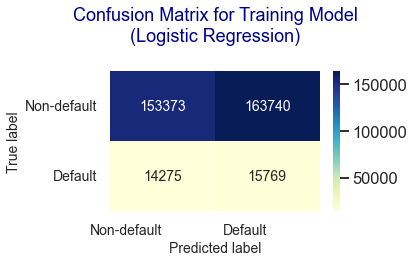

In [315]:
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

#### Random Forest Classifier

In [317]:
rdf_model = RandomForestClassifier().fit(X_over, y_over)
print(rdf_model)

KeyboardInterrupt: 

In [ ]:
y_pred = log_model.predict(X_test)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))